In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import date, timedelta
import calendar
from datetime import datetime

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc

In [ ]:
#set ticker
appl=yf.Ticker("AAPL")

In [ ]:
# get stock info
appl.info

# get historical market data
hist = appl.history(period="max")

### Get AAPL stock for 10 years now. Also start from Monday.
##### Note- Holiday will NOT trading on that day. So later the week candle will have less candle for the week as holiday day there is no trading

In [ ]:
#download data
data = yf.download("AAPL",
                   start="2011-07-04", 
                   end="2021-07-09",
                   period = "1d"
                  )

data_test = yf.download("AAPL",
                   start="2021-07-12", 
                   end="2021-07-30",
                   period = "1d"
                  )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(12)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-05,12.250000,12.493929,12.232143,12.479643,10.731277,355054000
2011-07-06,12.462500,12.646429,12.382500,12.562857,10.802836,444626000
2011-07-07,12.666786,12.785714,12.642857,12.757143,10.969903,399663600
2011-07-08,12.619286,12.857143,12.578571,12.846786,11.046986,489633200
2011-07-11,12.726429,12.848929,12.600714,12.642857,10.871630,442674400
2011-07-12,12.626071,12.774286,12.450714,12.633929,10.863953,451609200
2011-07-13,12.797500,12.857143,12.727857,12.786429,10.995090,391638800
2011-07-14,12.893214,12.914643,12.726429,12.777500,10.987410,430533600
2011-07-15,12.898929,13.035714,12.827500,13.032857,11.206989,484467200


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,142.020004,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,144.570007,104911600
2021-07-08,141.580002,144.059998,140.669998,143.240005,143.240005,105575500


In [ ]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700
2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100827100
2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800
2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2011-07-05 to 2021-07-08
Data columns (total 6 columns):
Open         2520 non-null float64
High         2520 non-null float64
Low          2520 non-null float64
Close        2520 non-null float64
Adj Close    2520 non-null float64
Volume       2520 non-null int64
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


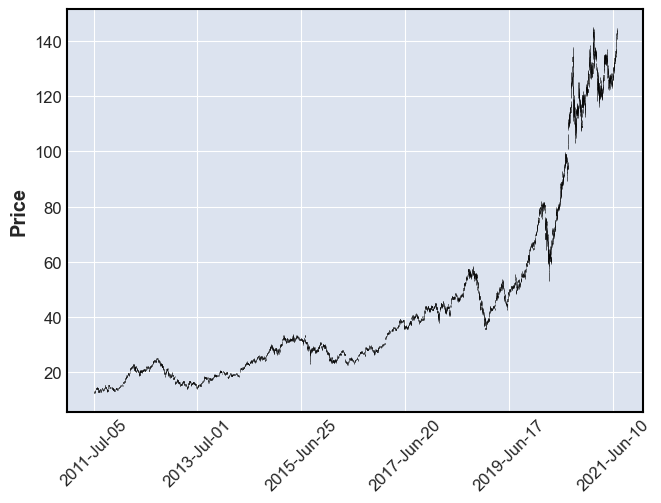

In [ ]:
#mpl finance to read the dataframe
mpf.plot(data,type='candle')

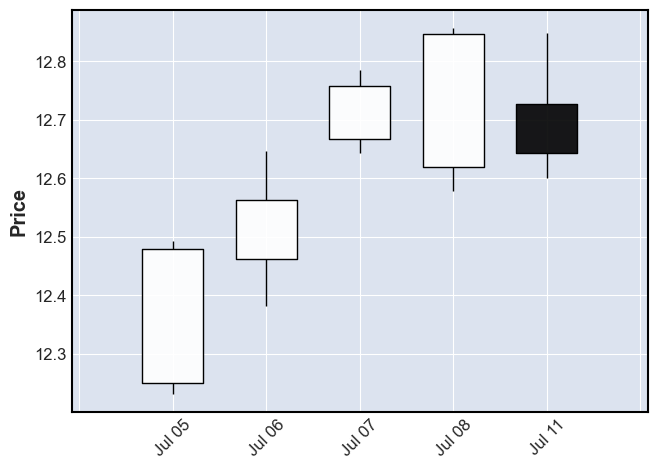

In [ ]:
#plot slices
mpf.plot(data.iloc[0:5],type='candle')

In [ ]:
data.iloc[0:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-05,12.250000,12.493929,12.232143,12.479643,10.731277,355054000
2011-07-06,12.462500,12.646429,12.382500,12.562857,10.802836,444626000
2011-07-07,12.666786,12.785714,12.642857,12.757143,10.969903,399663600
2011-07-08,12.619286,12.857143,12.578571,12.846786,11.046986,489633200
2011-07-11,12.726429,12.848929,12.600714,12.642857,10.871630,442674400
2011-07-12,12.626071,12.774286,12.450714,12.633929,10.863953,451609200
2011-07-13,12.797500,12.857143,12.727857,12.786429,10.995090,391638800
2011-07-14,12.893214,12.914643,12.726429,12.777500,10.987410,430533600
2011-07-15,12.898929,13.035714,12.827500,13.032857,11.206989,484467200


In [ ]:
type(data.iloc[0:5])

pandas.core.frame.DataFrame

#### Test printing 1 week candle.
#### Also we need to print the week candles w/o the price and dates. we dont want machine to read that

In [ ]:
#mpf.plot(data.loc[0:5, ['Date', 'Open', 'High', 'Low', 'Close']],type='candle')
ohlc = data.iloc[0:5]

In [ ]:
ohlc.reset_index(inplace=True)

In [ ]:
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

#### Also test Showing the plot and saving the 5 day Candle stick pattern

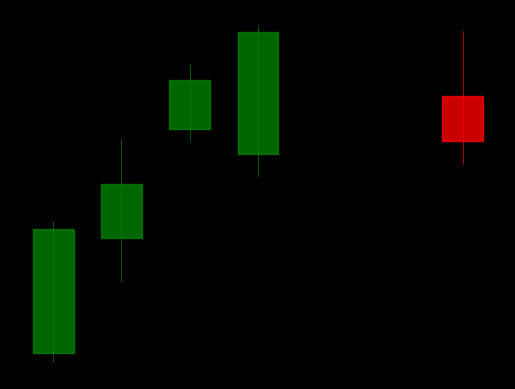

In [ ]:
# Creating Subplots
fig, ax = plt.subplots()
plt.axis('off')
fig.patch.set_facecolor('black')

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.savefig('red_green.png')
plt.show()


#### We need to use common index across different elements of input fro Deep learnign/ML. So since we are using 1 week data we will just use the Sunday of the ending week as INDEX. So this way other New sentiment, trading indicators like Volume, RSI or SMA20/SMA50 etc can also bring in data for the week and we have it indexed by the Sunday so we can easily concatenate them

#### From the Stock data read - build the Sunday List
##### Also validate holiday weeks that list is built correctly

In [ ]:
#s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
#s.dt.dayofweek
# EndDate = date.today() + timedelta(days=10)
cnt=1
sunday_list= []
week_started = 0
for index, row in data.iterrows():
#    if index.dt.dayofweek == 1:
#        week_started=1
        #print(index, ' Monday')
    if calendar.day_name[index.weekday()] == 'Monday':
        #print(calendar.day_name[index.weekday()], index)
        week_started=1
        # calculate the Sunday
        sunday = index + timedelta(days=6)
        sunday_list.append(sunday)
        #print('Sunday - ', sunday)
    elif calendar.day_name[index.weekday()] == 'Tuesday':
        if week_started==1:
            week_started=0
        else:
            week_start=1
            #print(calendar.day_name[index.weekday()], index)
            sunday = index + timedelta(days=5)
            sunday_list.append(sunday)
            #print('Sunday - ', sunday)
#    else:
#        if week_started == 1:
#            week_started=0
#        sunday_list.append(index+2)
    

In [ ]:
#s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
#s.dt.dayofweek
# EndDate = date.today() + timedelta(days=10)
cnt=1
sunday_test_list= []
week_started = 0
for index, row in data_test.iterrows():
#    if index.dt.dayofweek == 1:
#        week_started=1
        #print(index, ' Monday')
    if calendar.day_name[index.weekday()] == 'Monday':
        #print(calendar.day_name[index.weekday()], index)
        week_started=1
        # calculate the Sunday
        sunday = index + timedelta(days=6)
        sunday_test_list.append(sunday)
        #print('Sunday - ', sunday)
    elif calendar.day_name[index.weekday()] == 'Tuesday':
        if week_started==1:
            week_started=0
        else:
            week_start=1
            #print(calendar.day_name[index.weekday()], index)
            sunday = index + timedelta(days=5)
            sunday_test_list.append(sunday)
            #print('Sunday - ', sunday)

##### Print the Sunday list to validate

In [ ]:
len(sunday_list)

522

In [ ]:
sunday_test_list

[Timestamp('2021-07-18 00:00:00'),
 Timestamp('2021-07-25 00:00:00'),
 Timestamp('2021-08-01 00:00:00')]

##### Slice the data - part of breaking down code and testing individual parts before building the whole thing together

In [ ]:
data['2021-06-28':'2021-07-04']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,133.410004,135.250000,133.350006,134.779999,134.779999,62111300
2021-06-29,134.800003,136.490005,134.350006,136.330002,136.330002,64556100
2021-06-30,136.169998,137.410004,135.869995,136.960007,136.960007,63261400
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600


In [ ]:
type(data['2021-06-28':'2021-07-04'])

pandas.core.frame.DataFrame

In [ ]:
len(sunday_list)

522

#### Loop throught all Sunday in the Stock data and take the weeks slice and create the candlestick pattern for the week w/o any Time (X) and price (Y) values. Also save the plot images with Sunday date as filename. So later can be retrieved.

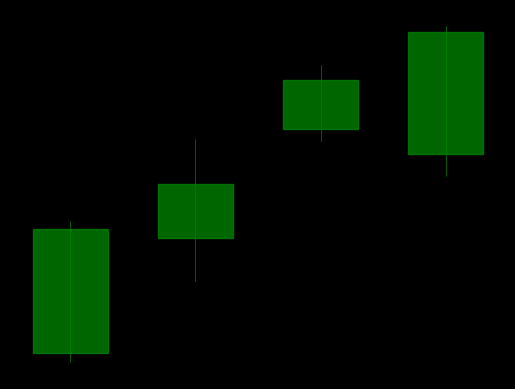

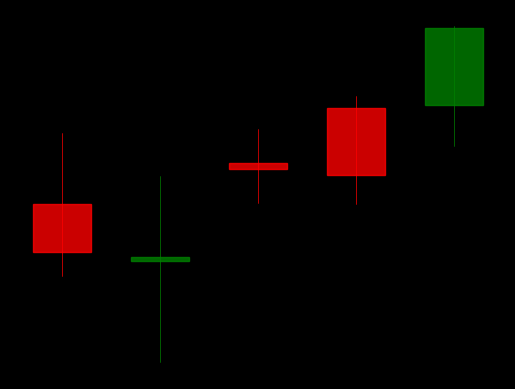

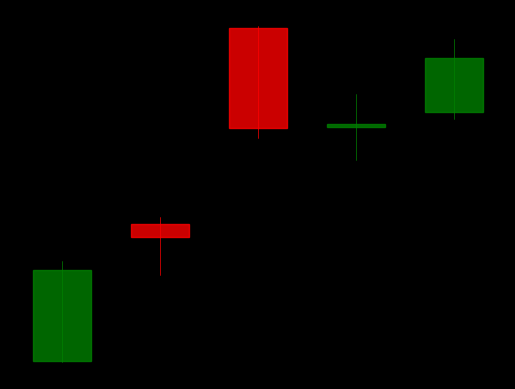

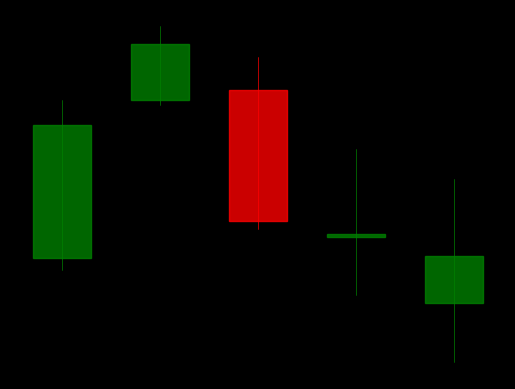

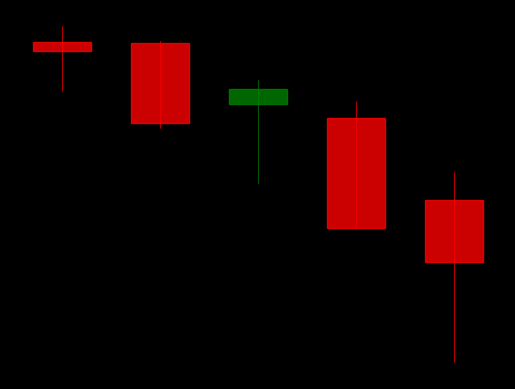

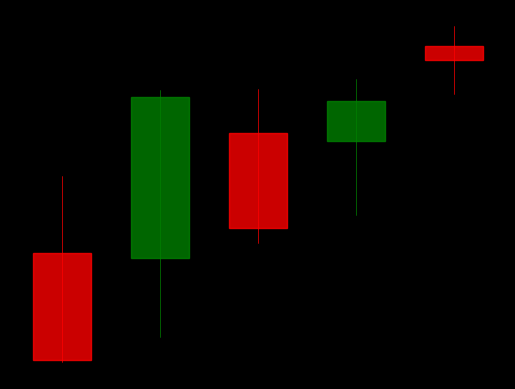

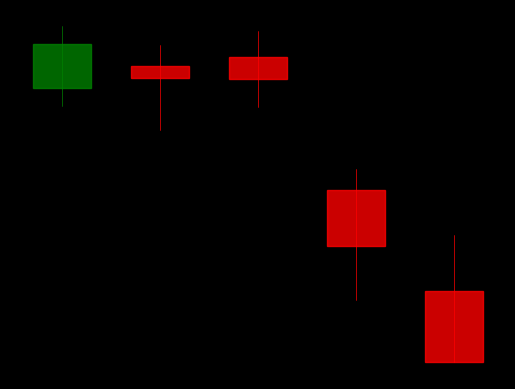

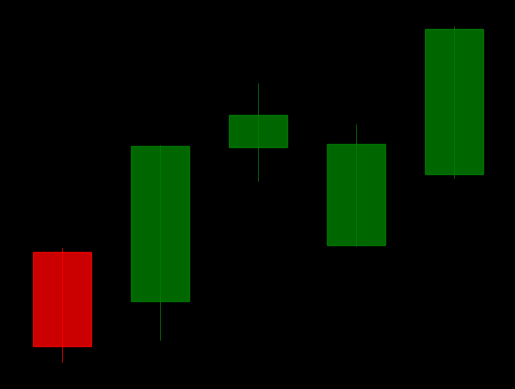

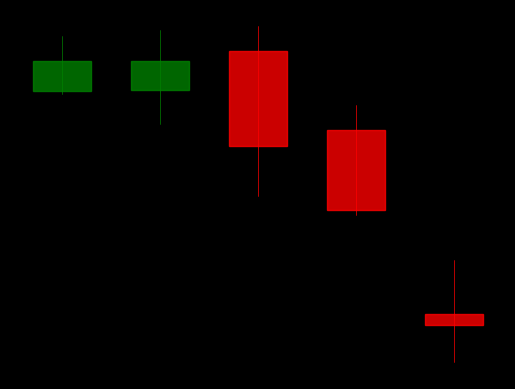

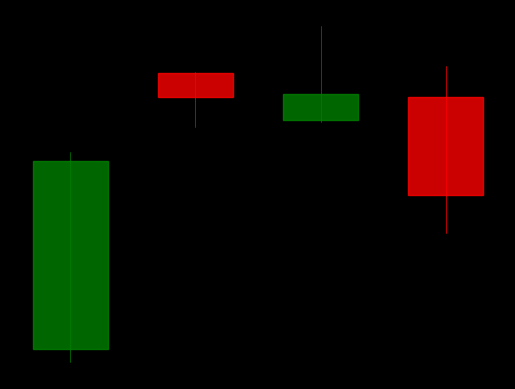

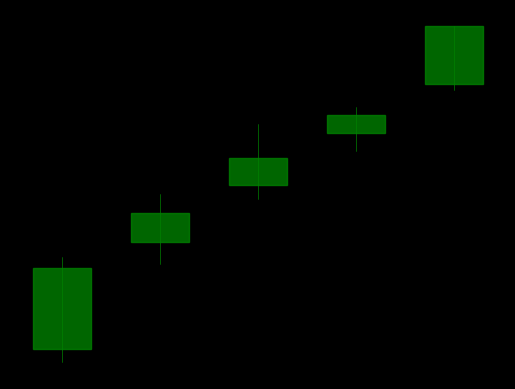

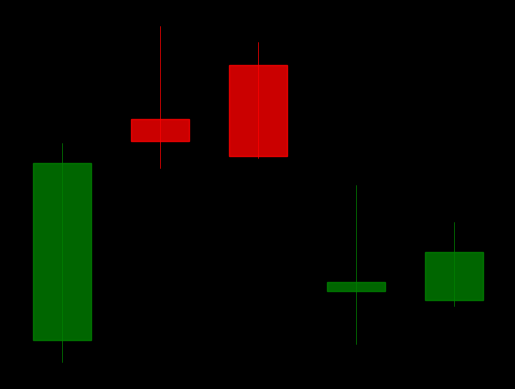

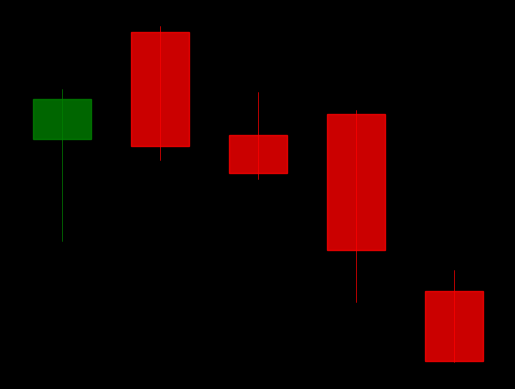

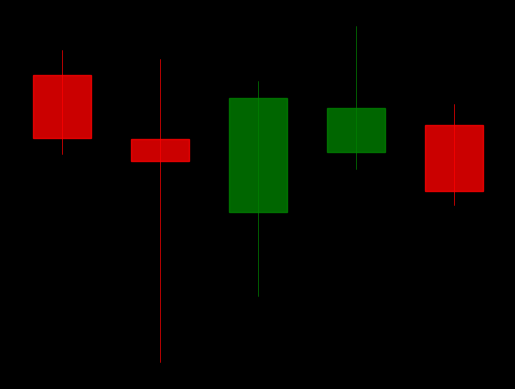

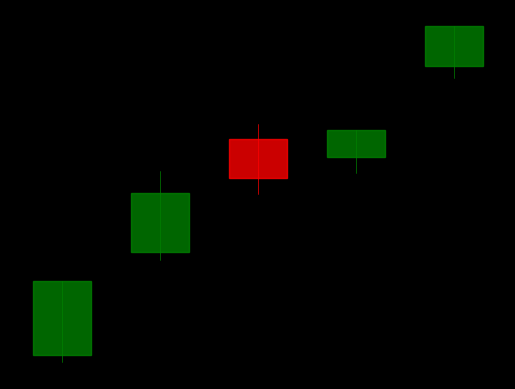

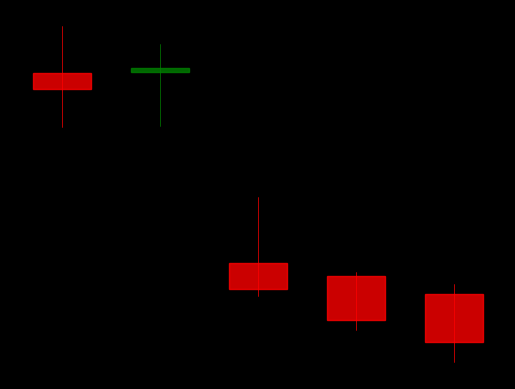

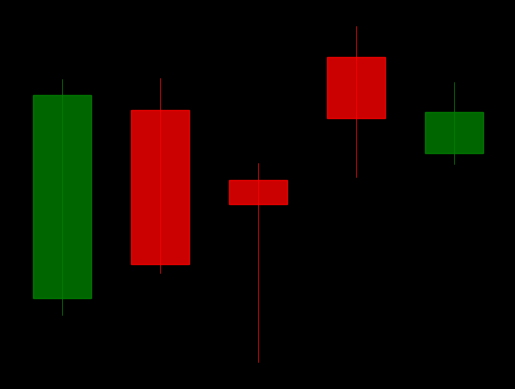

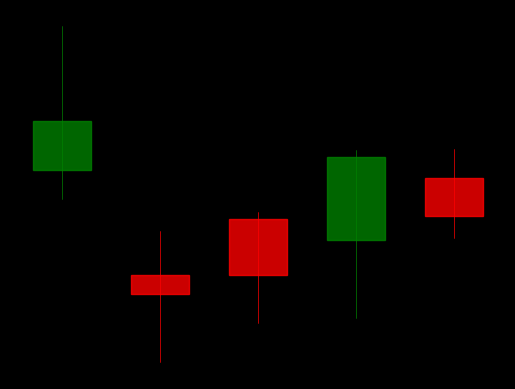

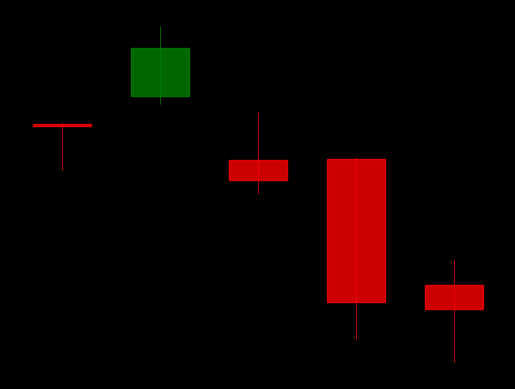

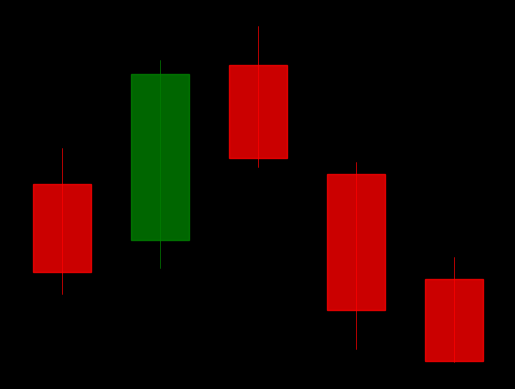

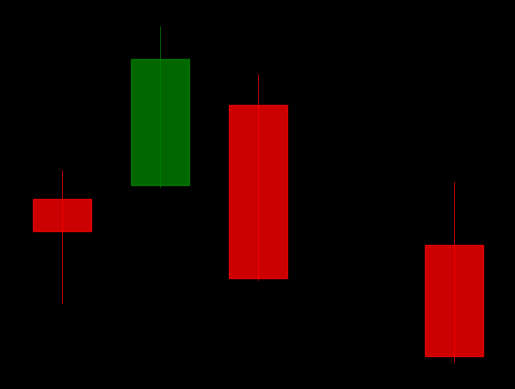

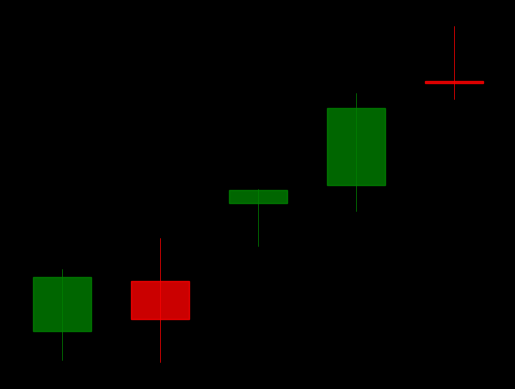

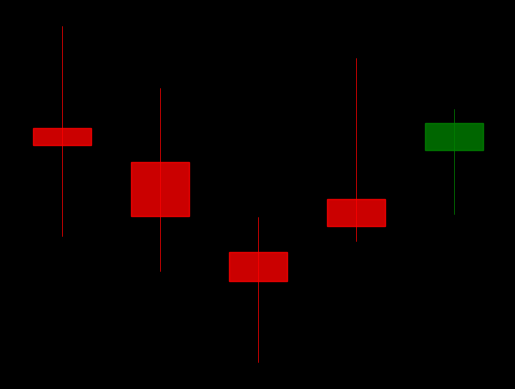

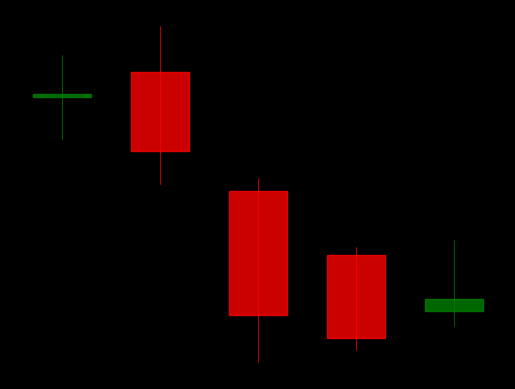

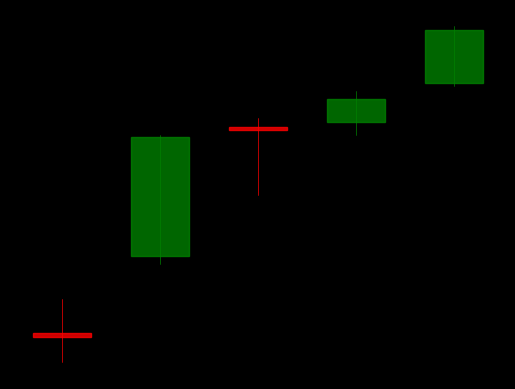

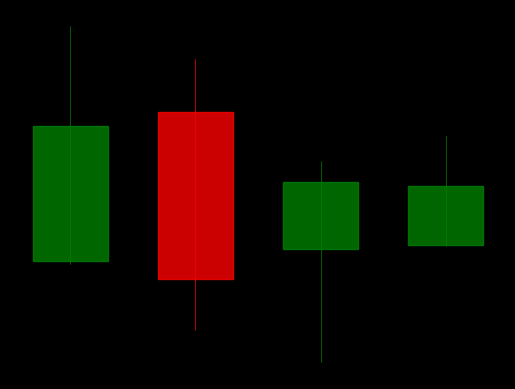

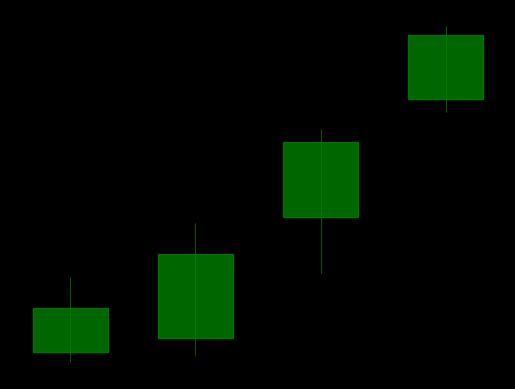

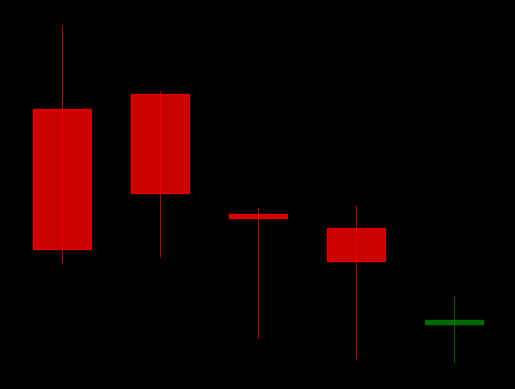

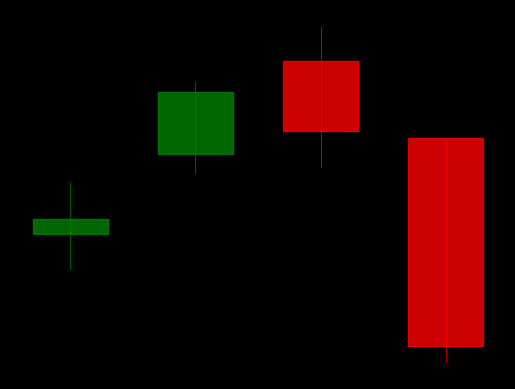

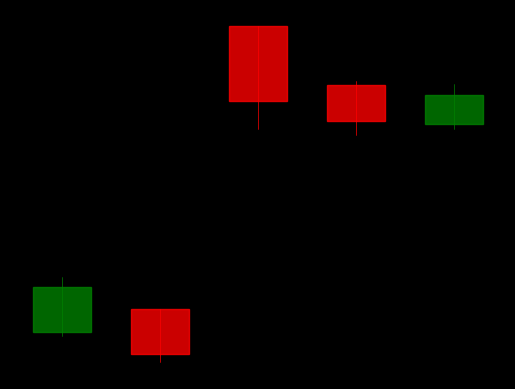

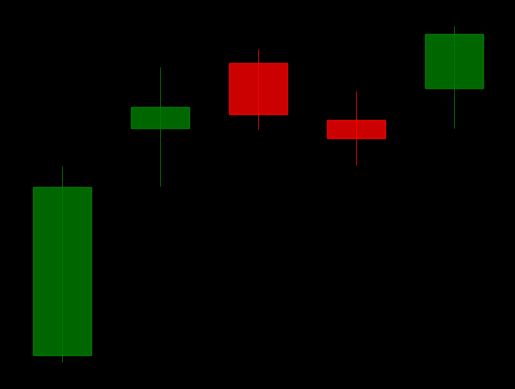

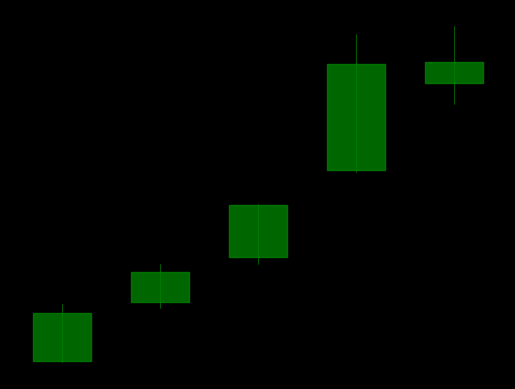

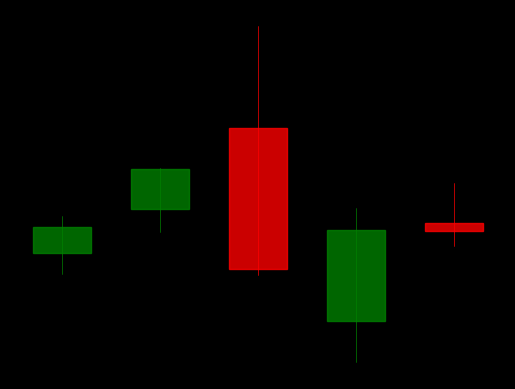

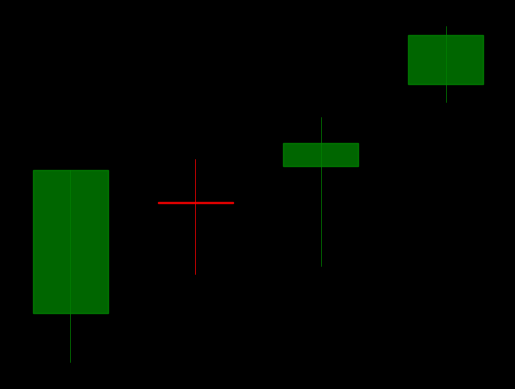

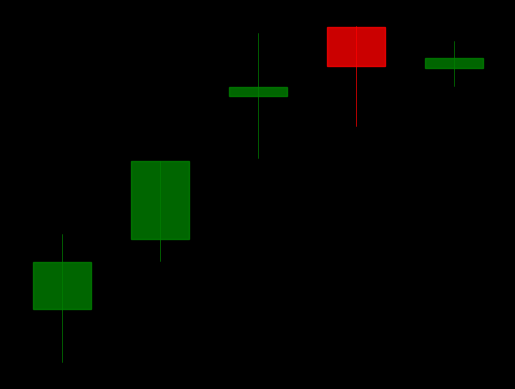

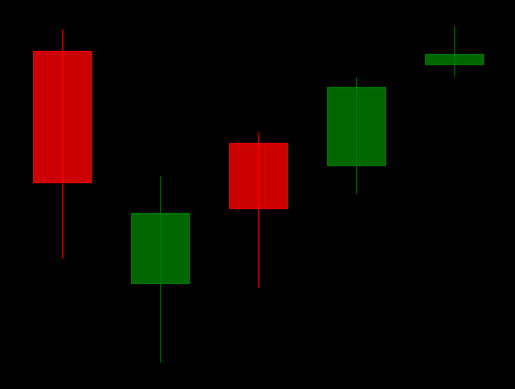

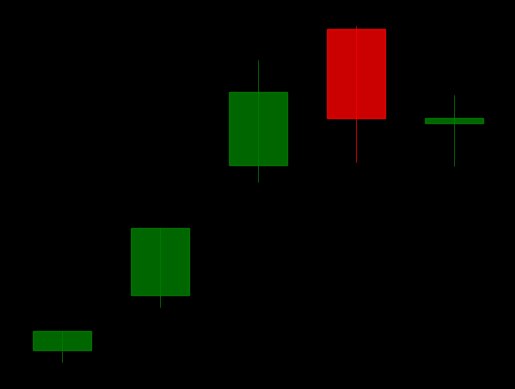

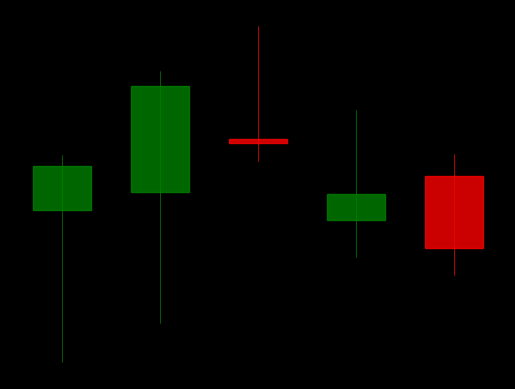

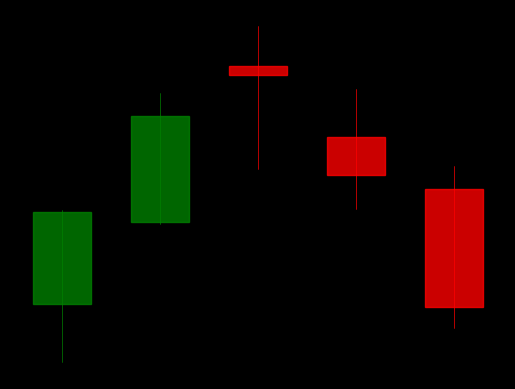

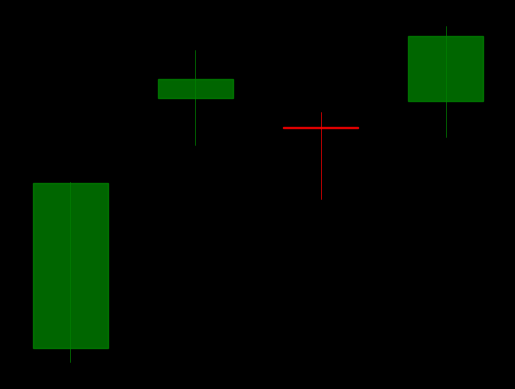

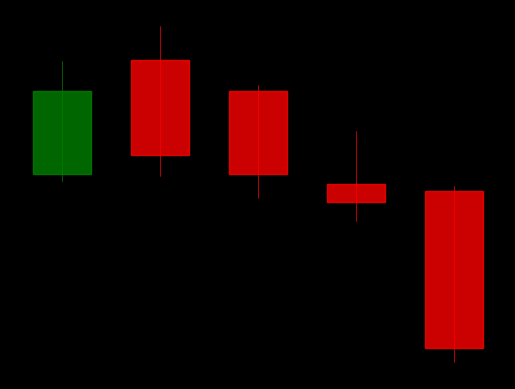

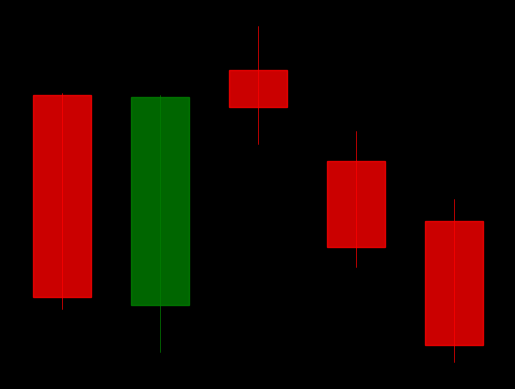

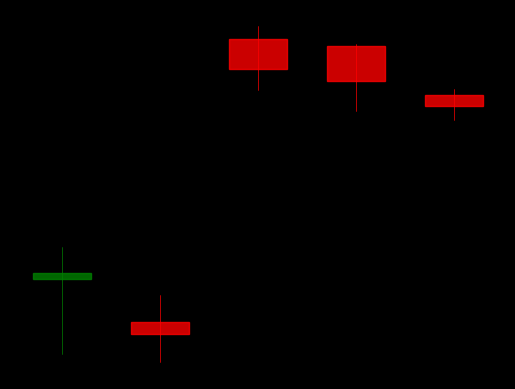

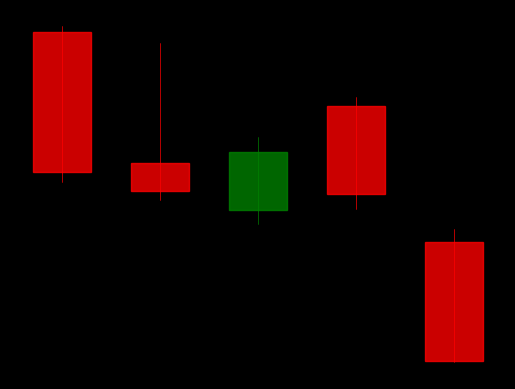

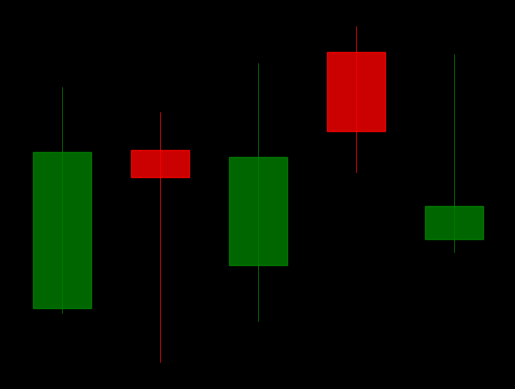

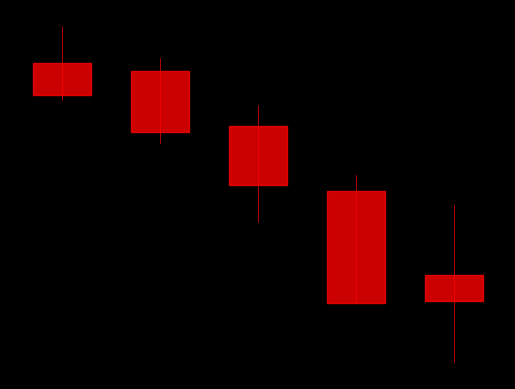

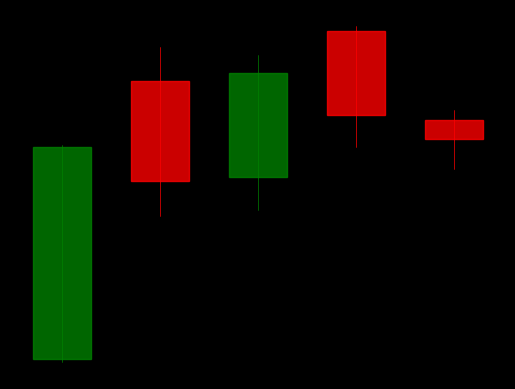

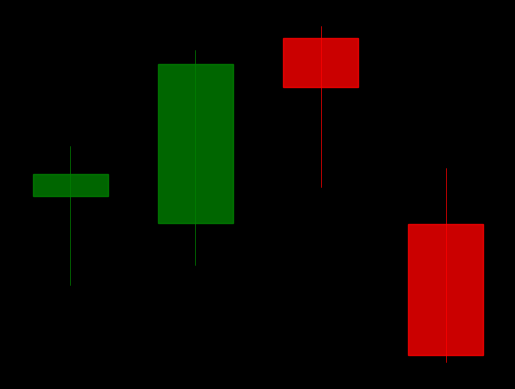

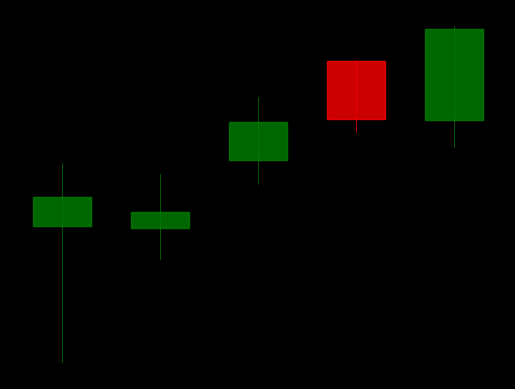

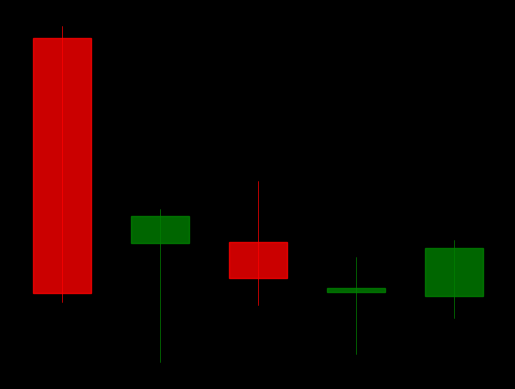

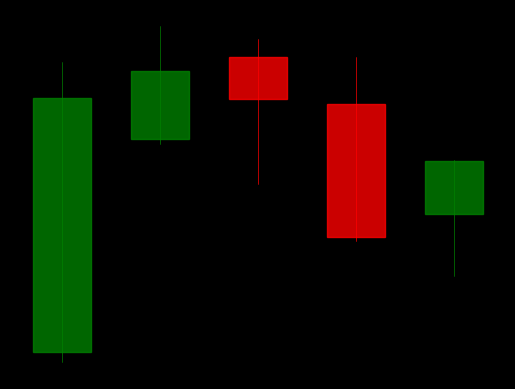

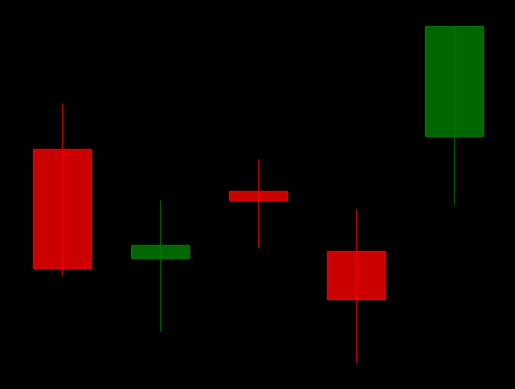

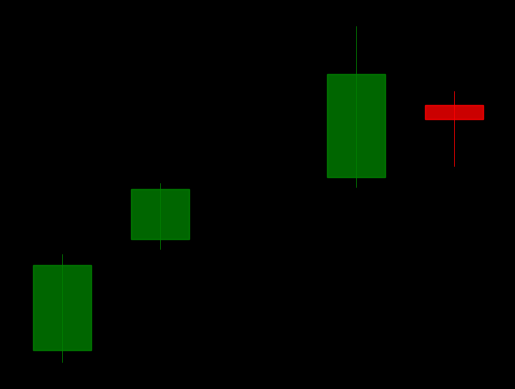

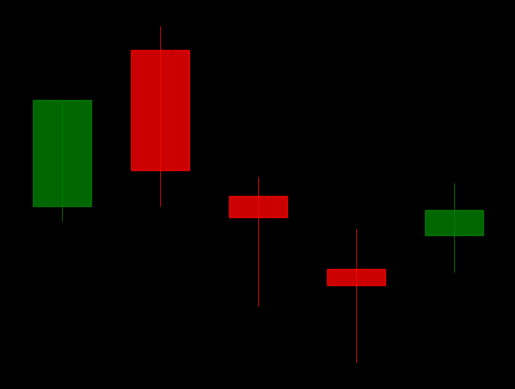

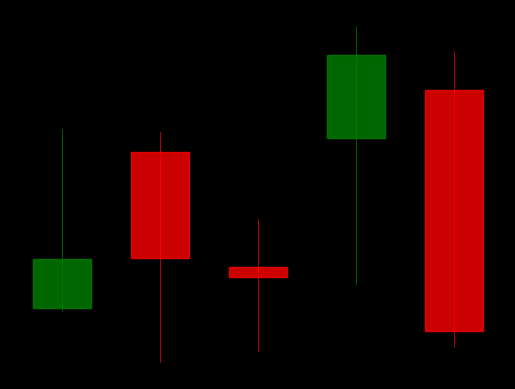

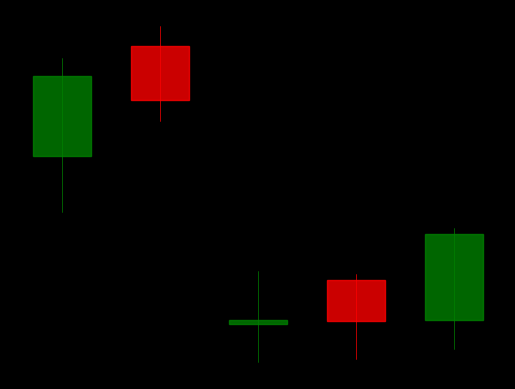

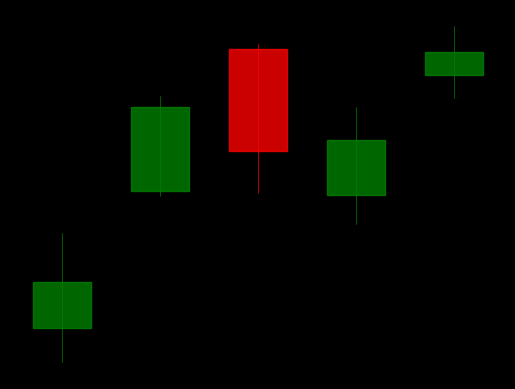

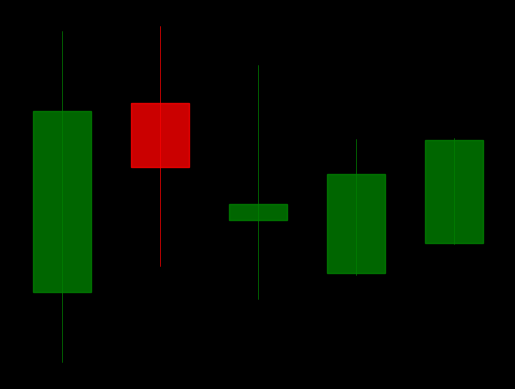

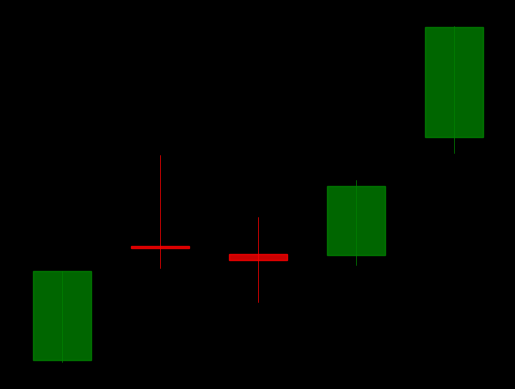

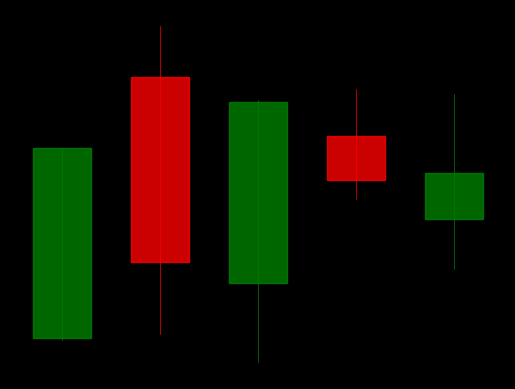

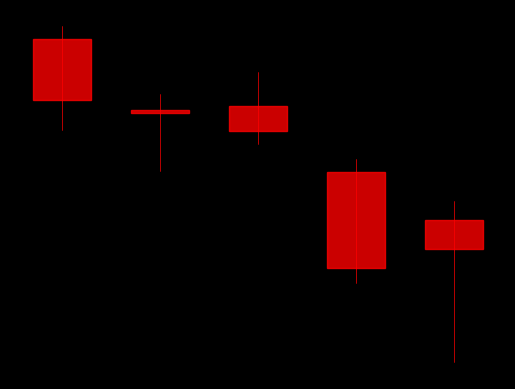

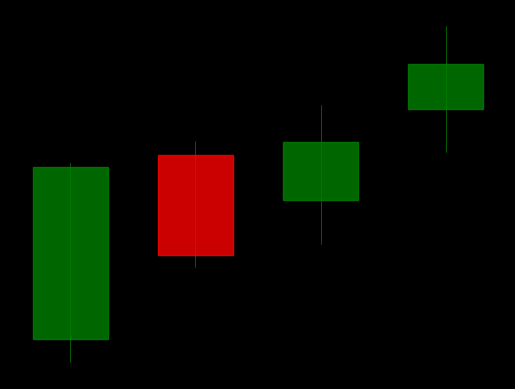

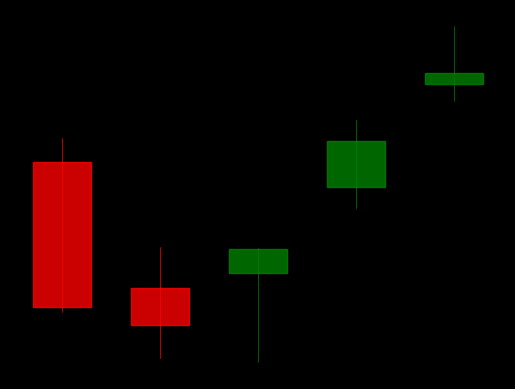

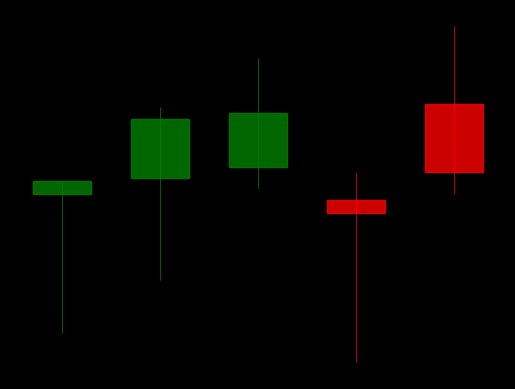

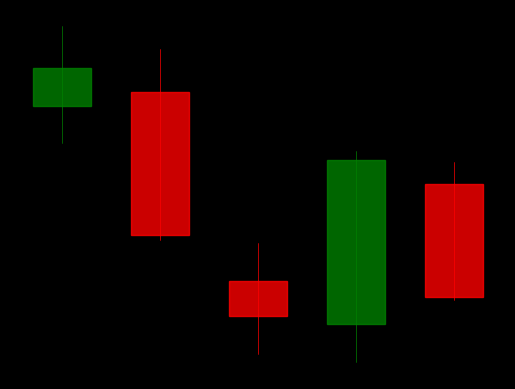

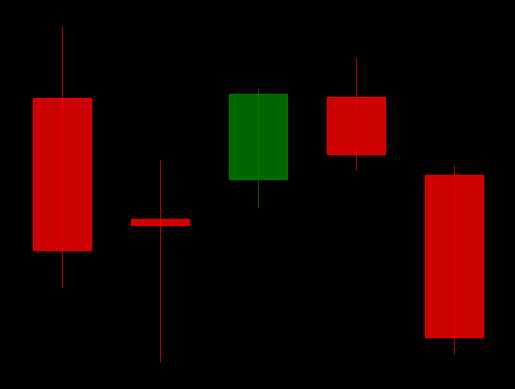

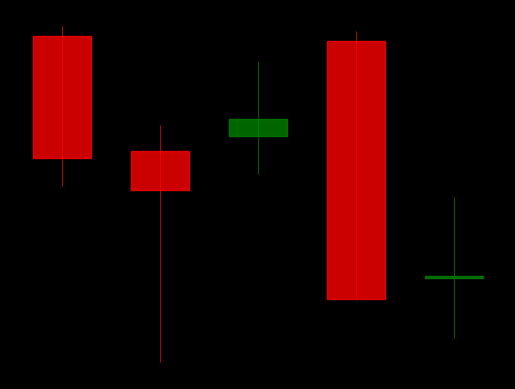

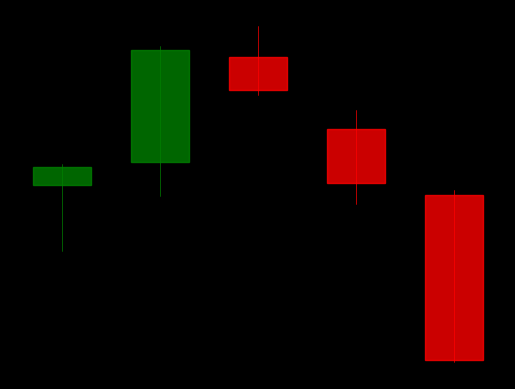

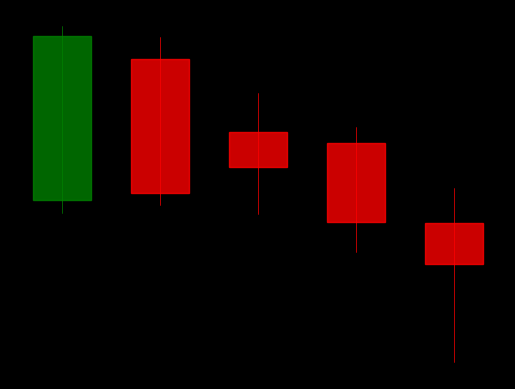

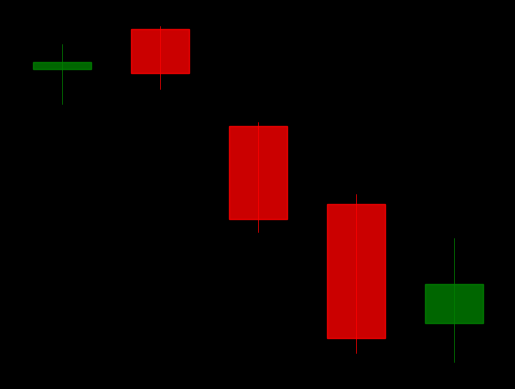

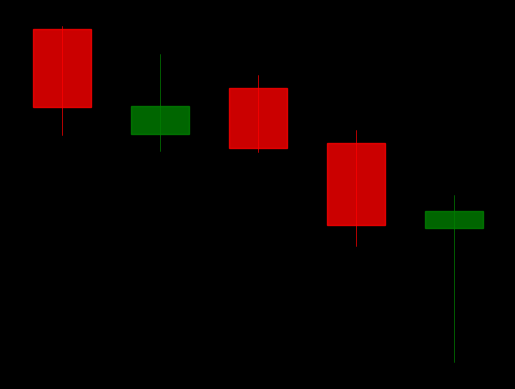

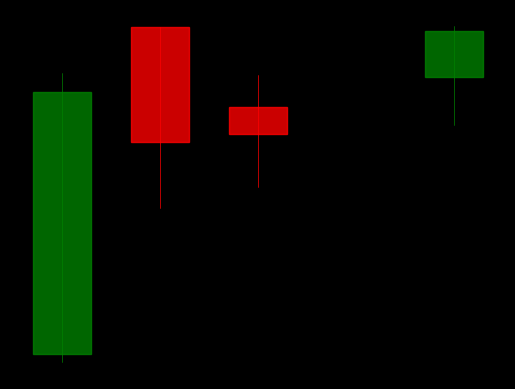

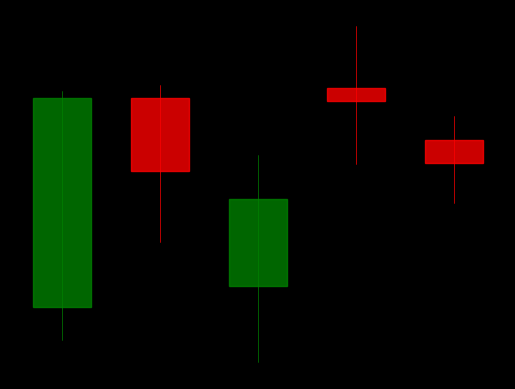

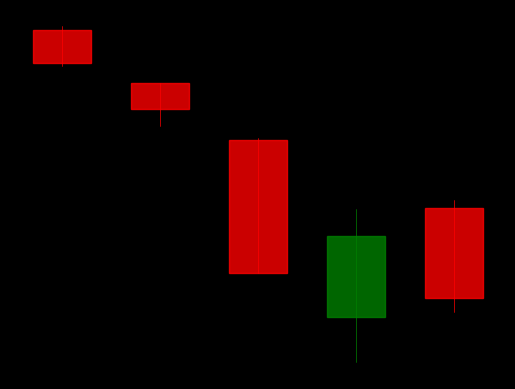

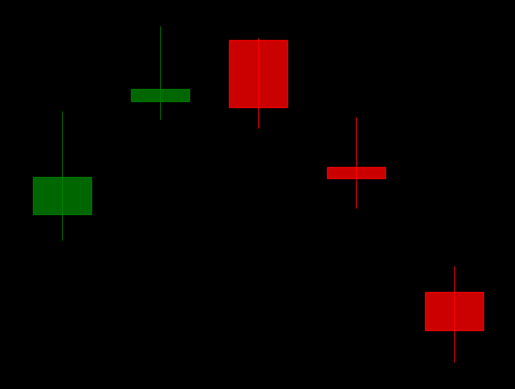

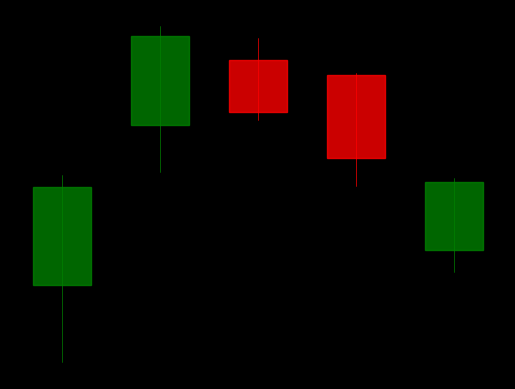

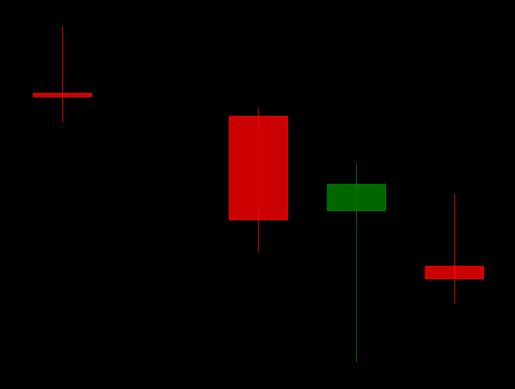

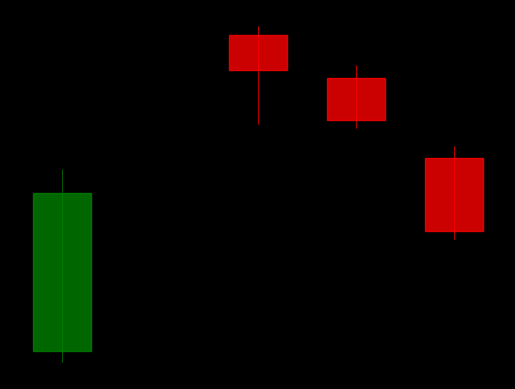

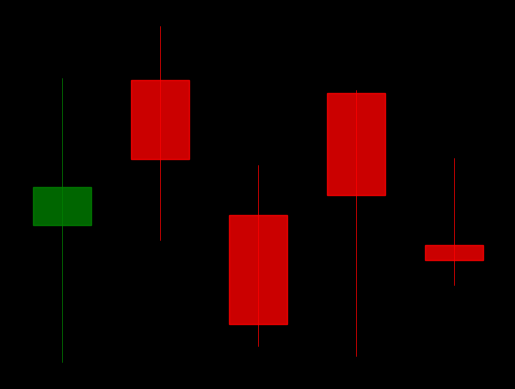

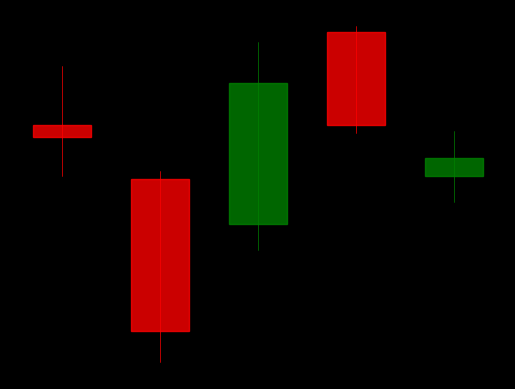

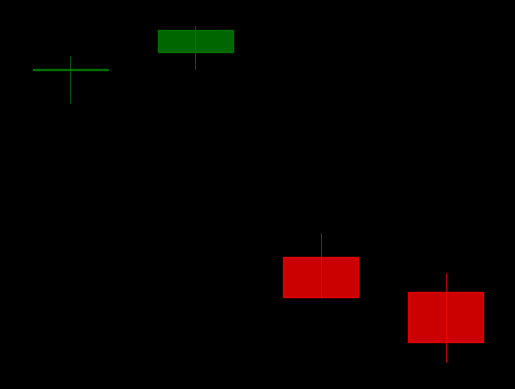

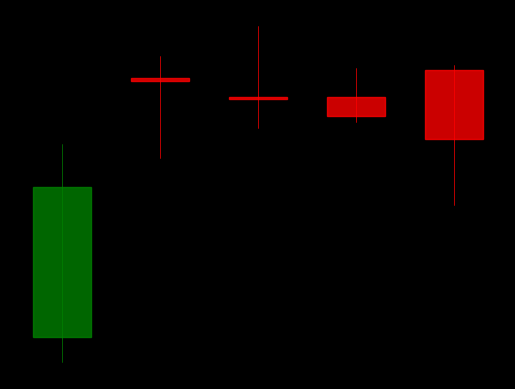

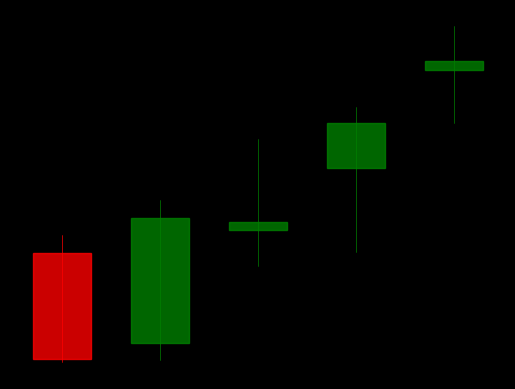

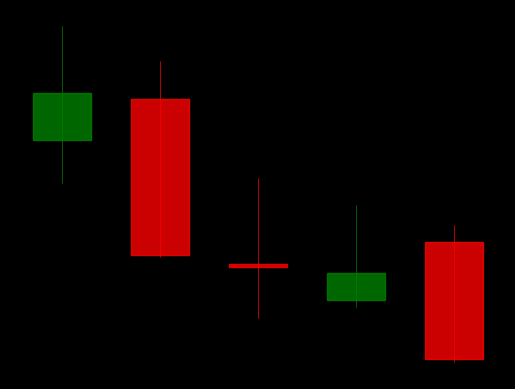

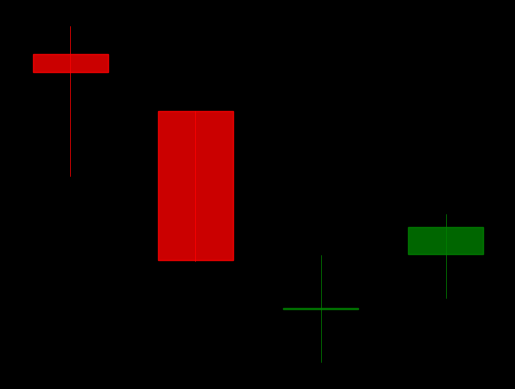

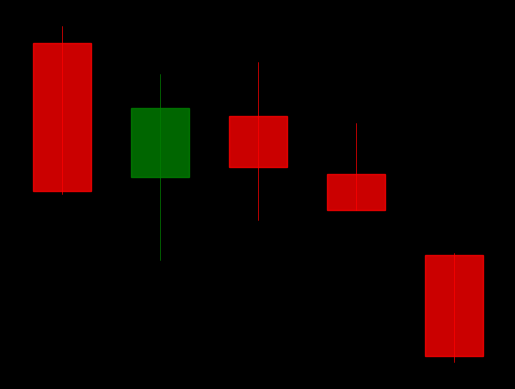

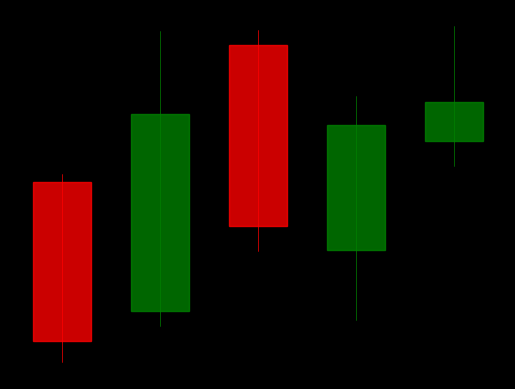

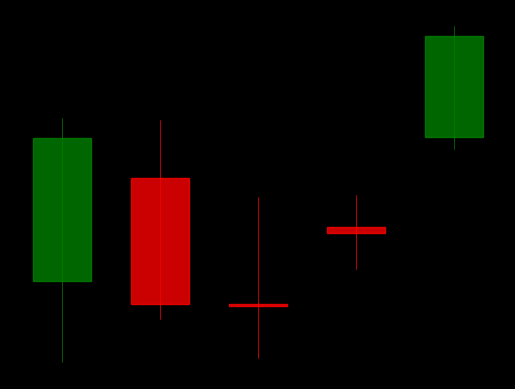

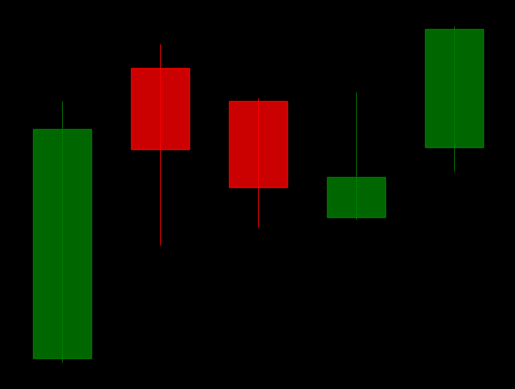

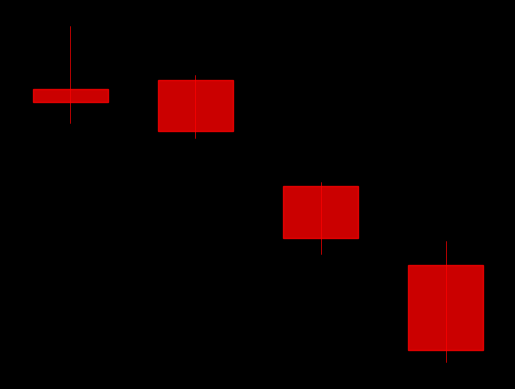

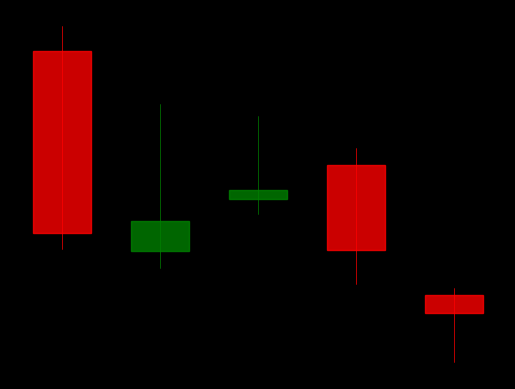

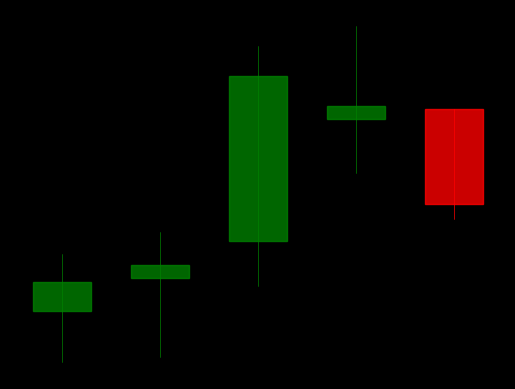

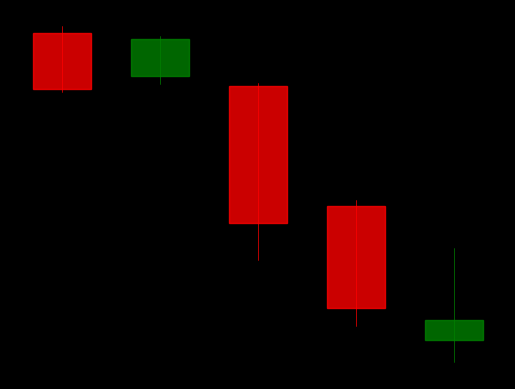

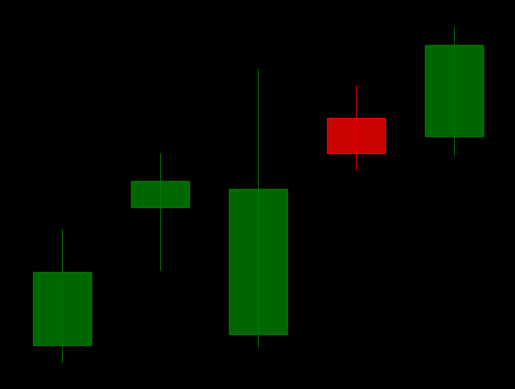

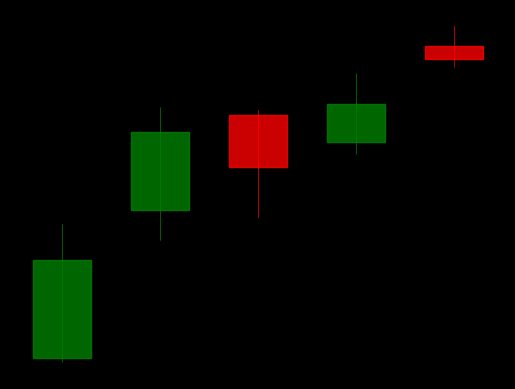

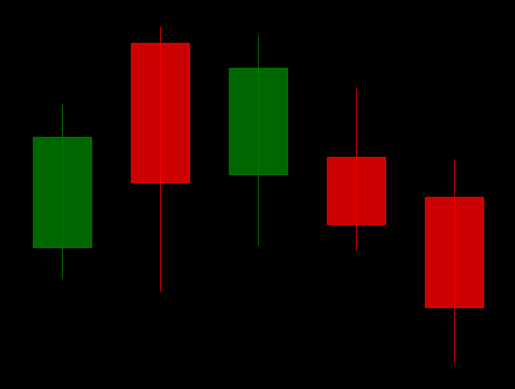

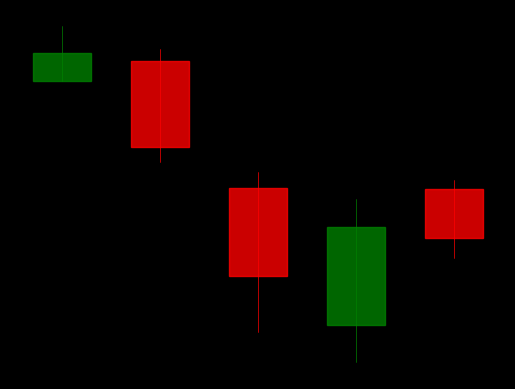

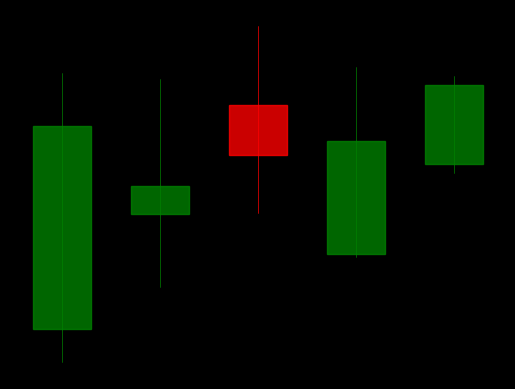

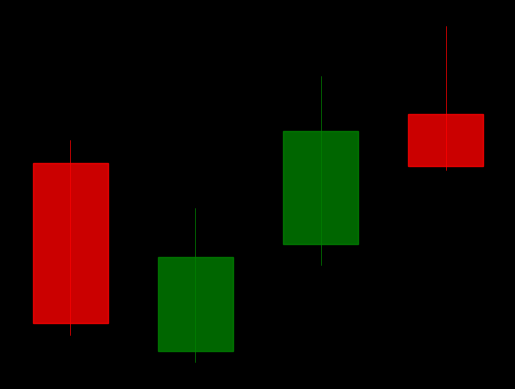

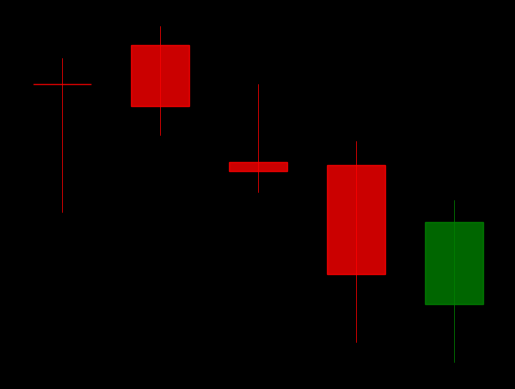

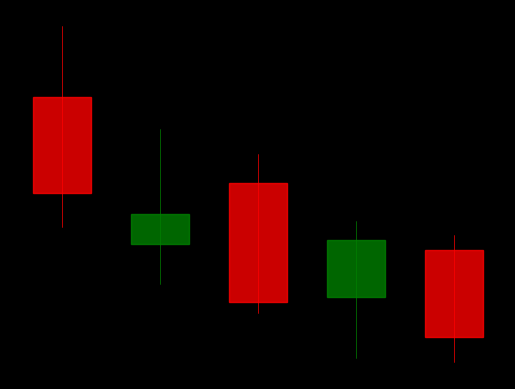

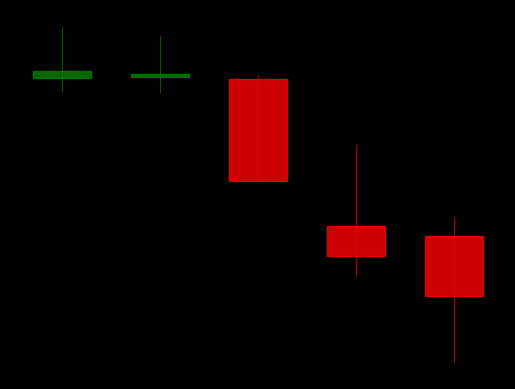

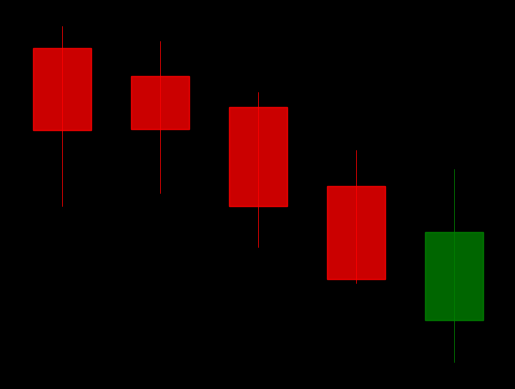

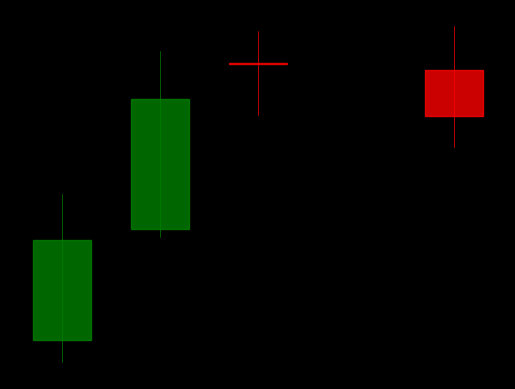

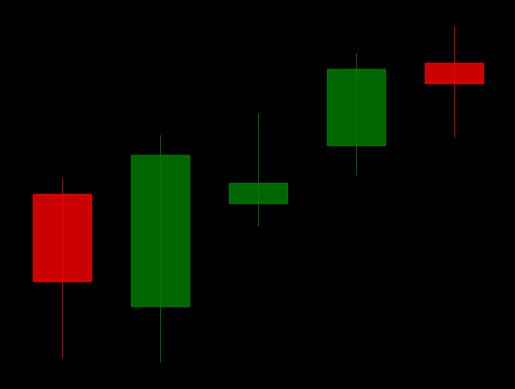

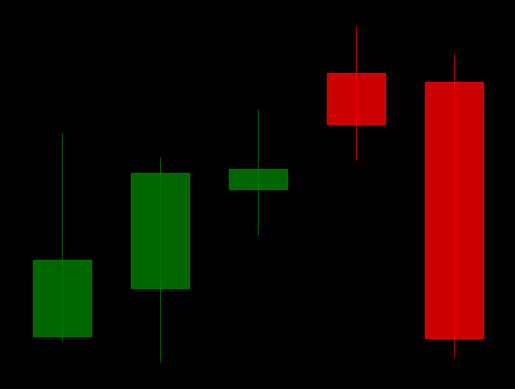

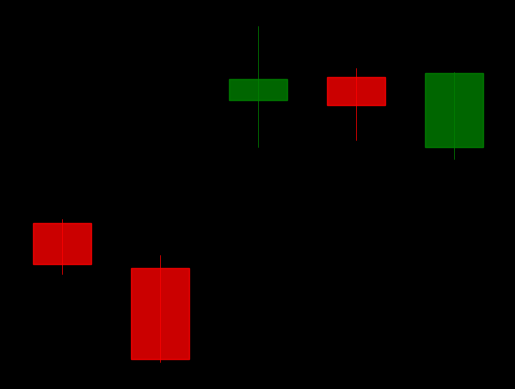

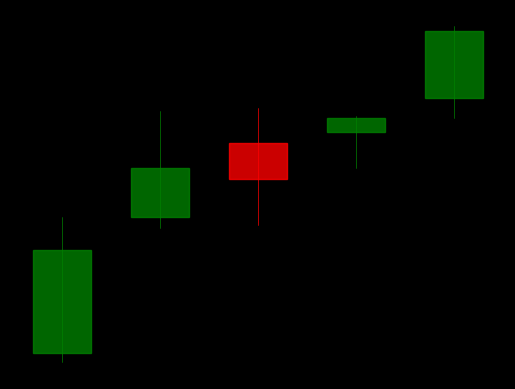

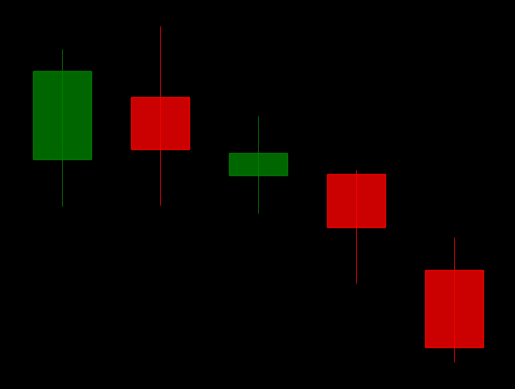

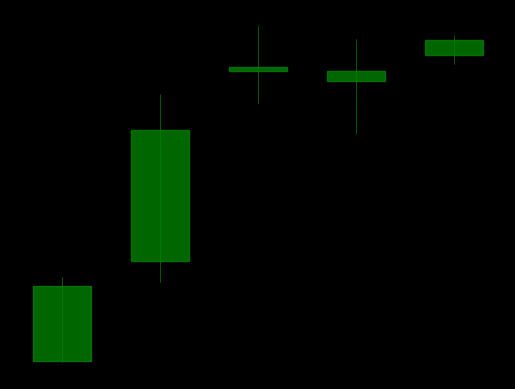

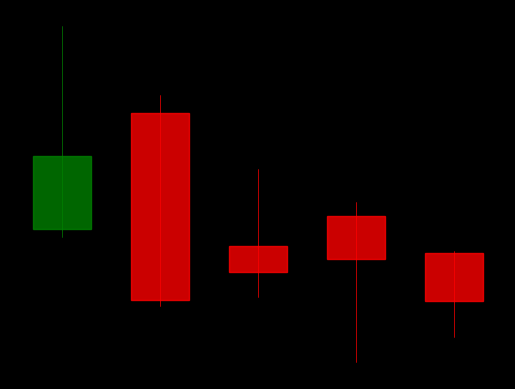

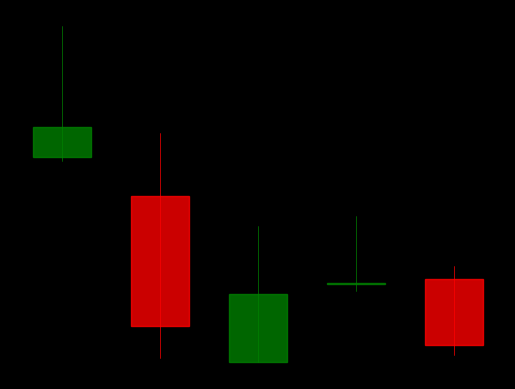

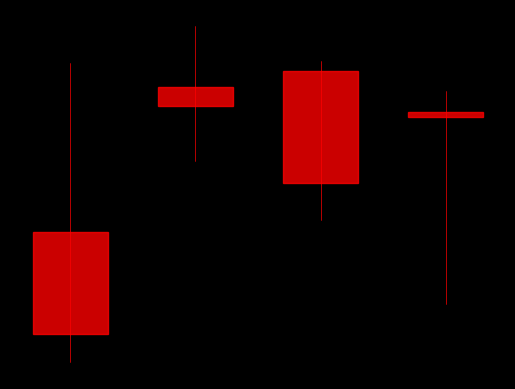

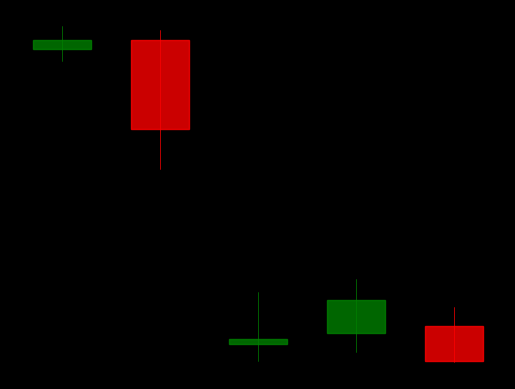

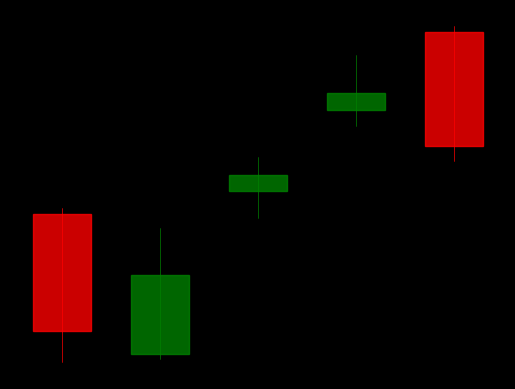

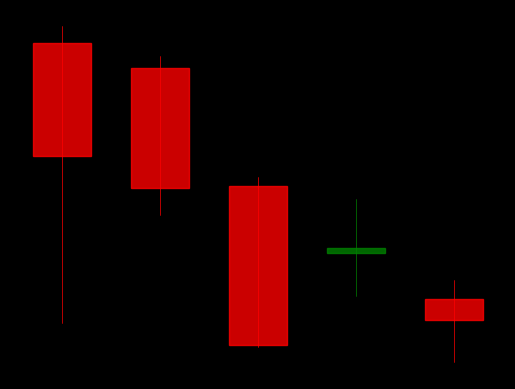

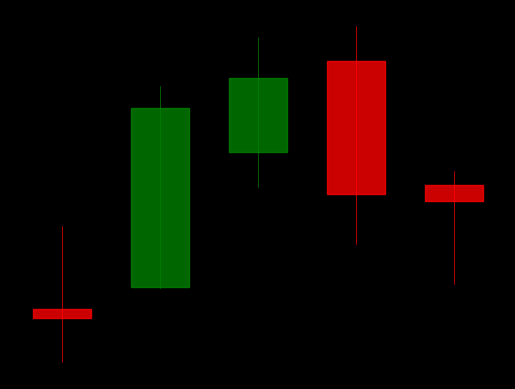

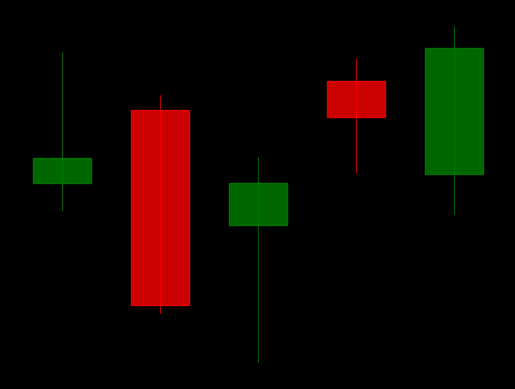

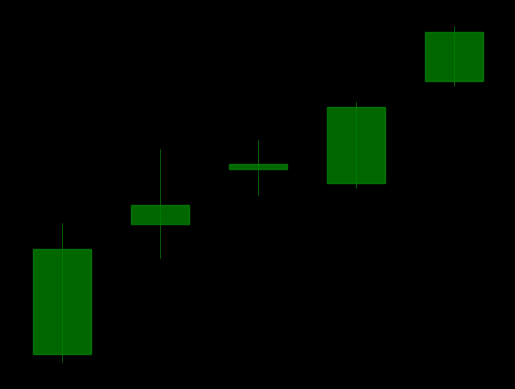

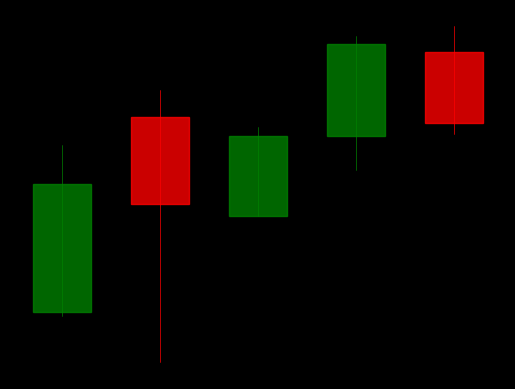

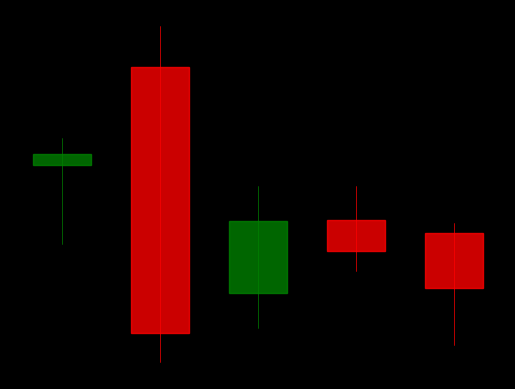

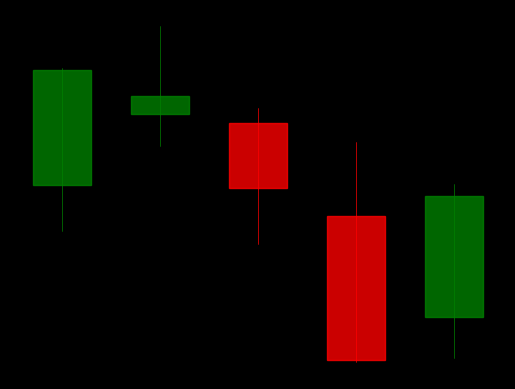

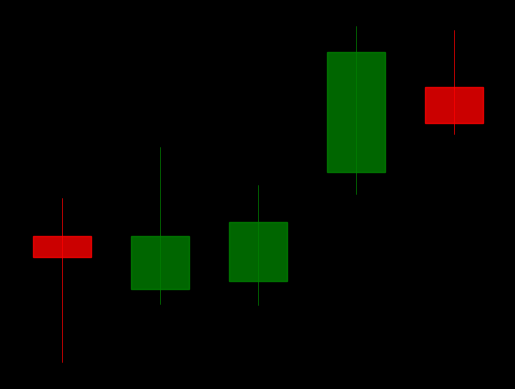

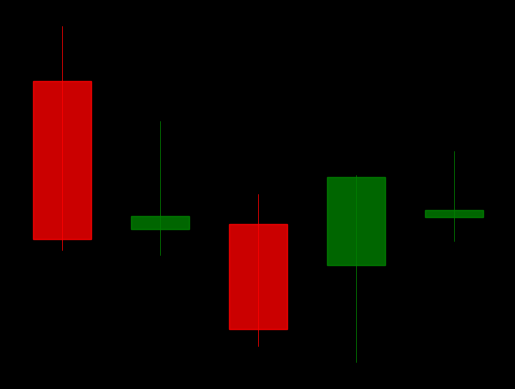

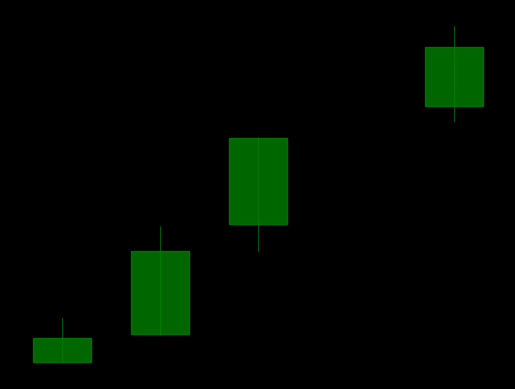

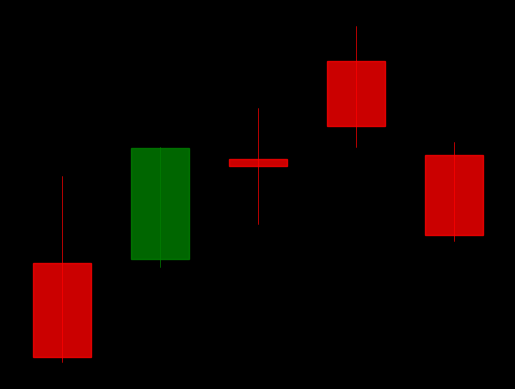

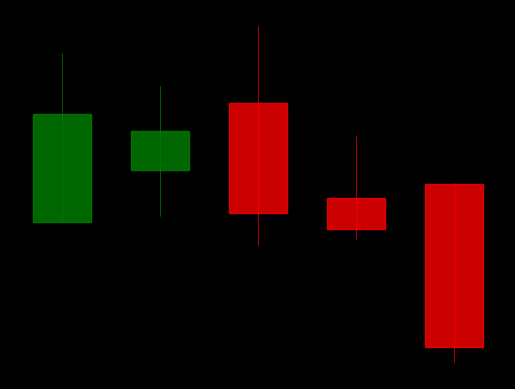

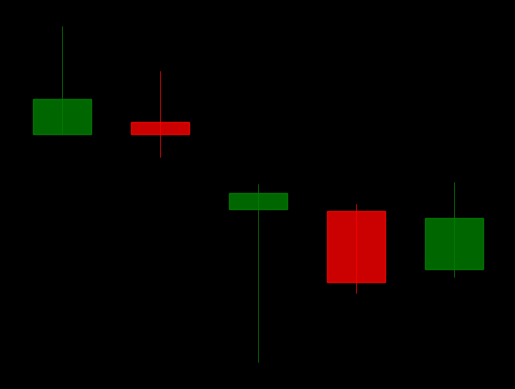

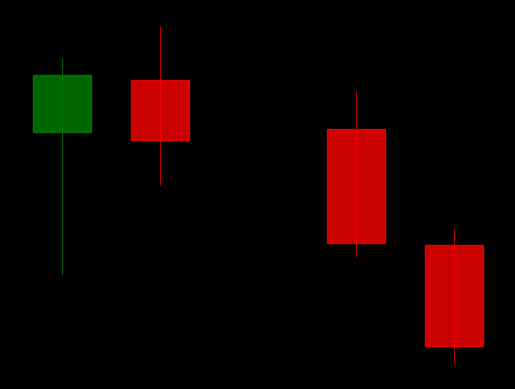

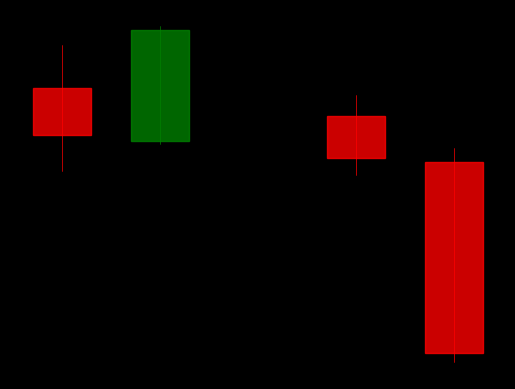

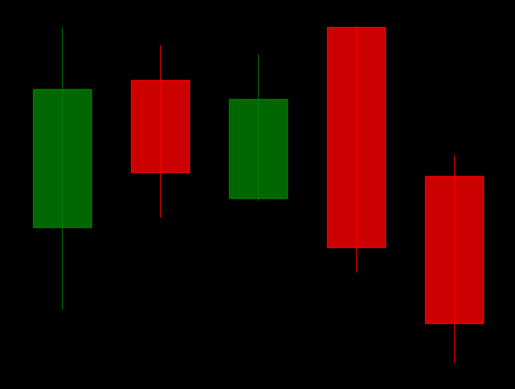

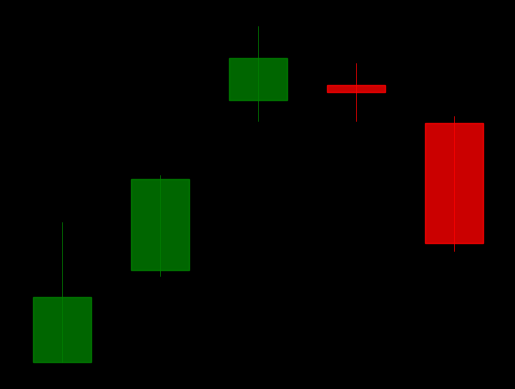

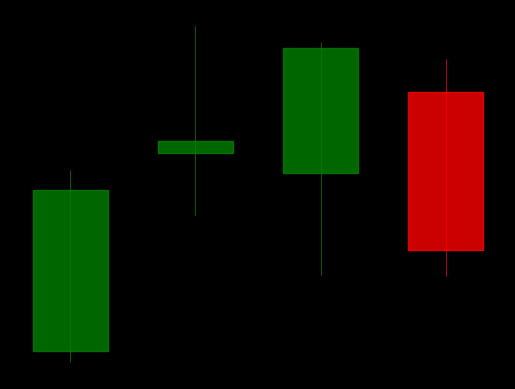

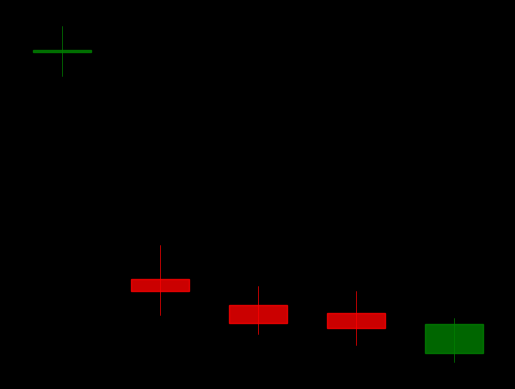

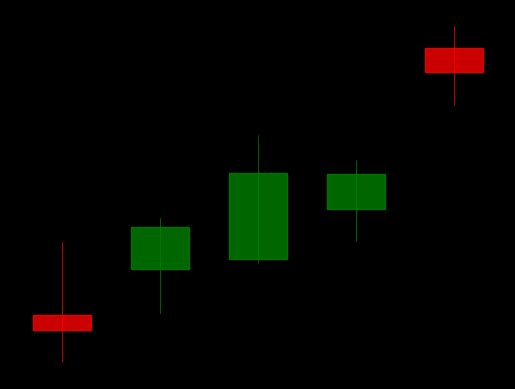

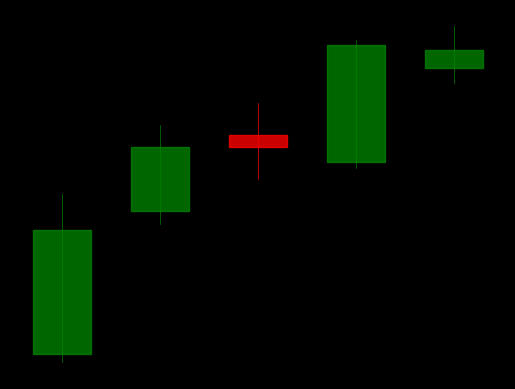

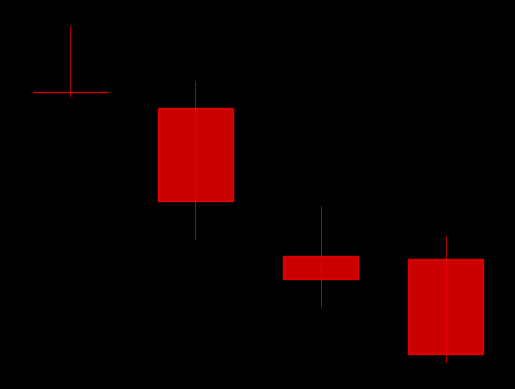

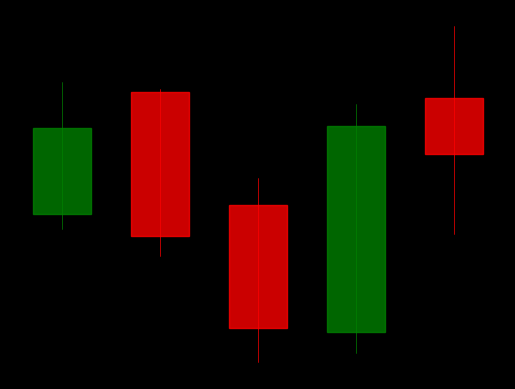

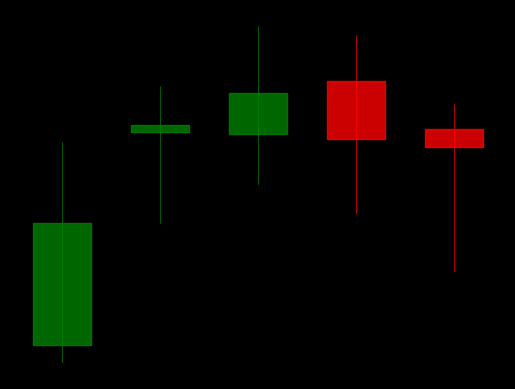

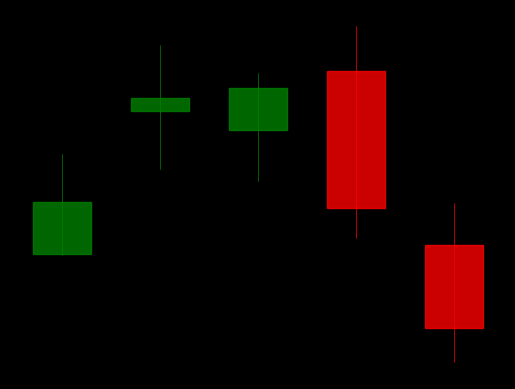

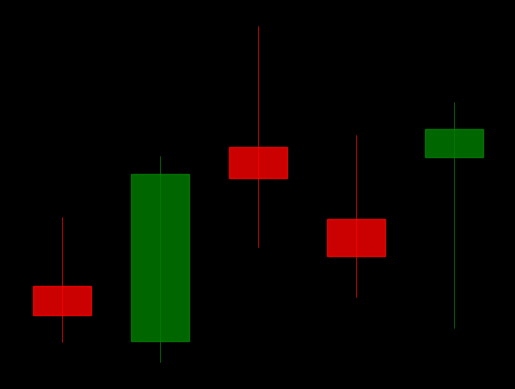

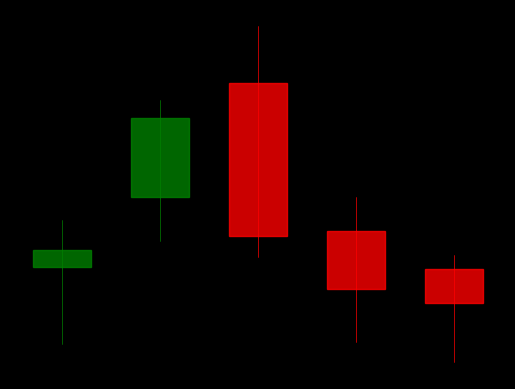

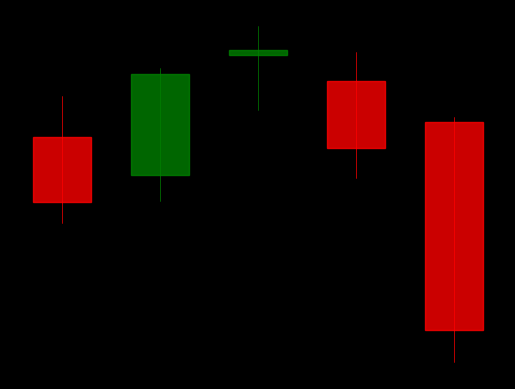

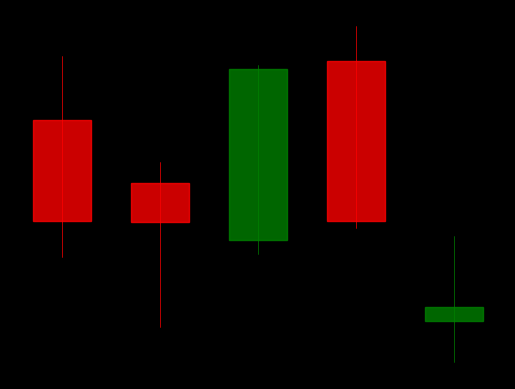

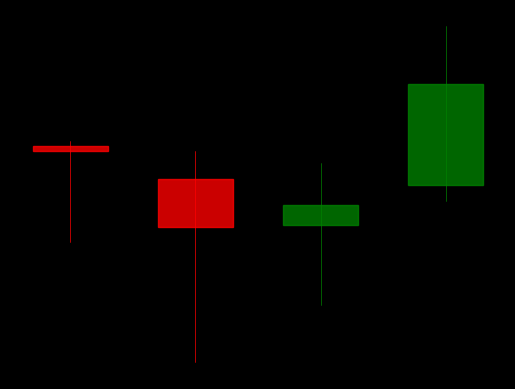

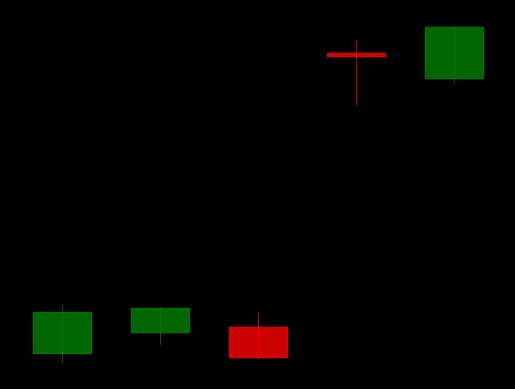

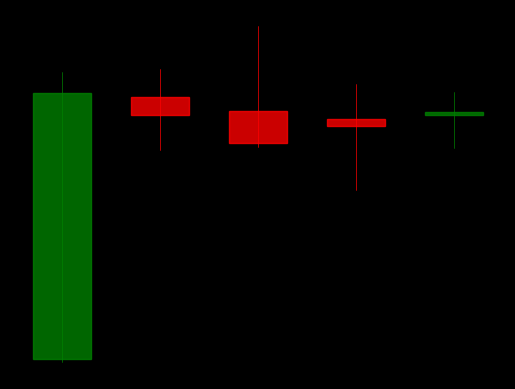

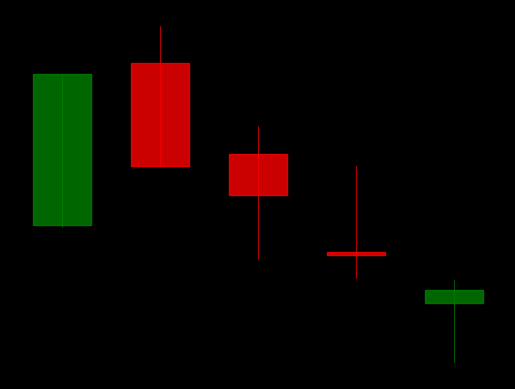

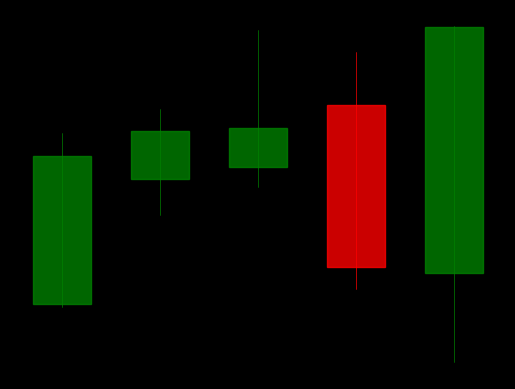

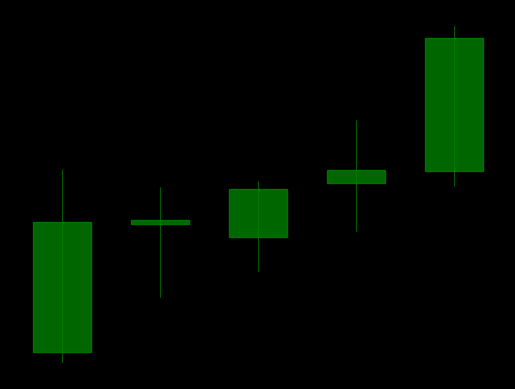

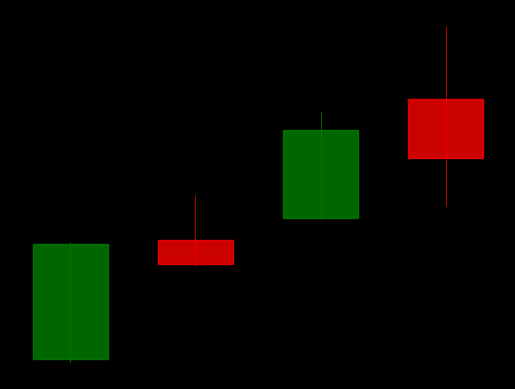

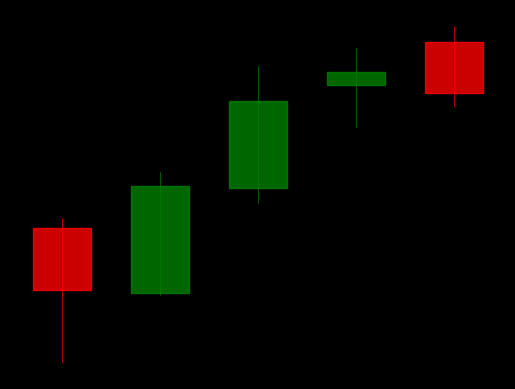

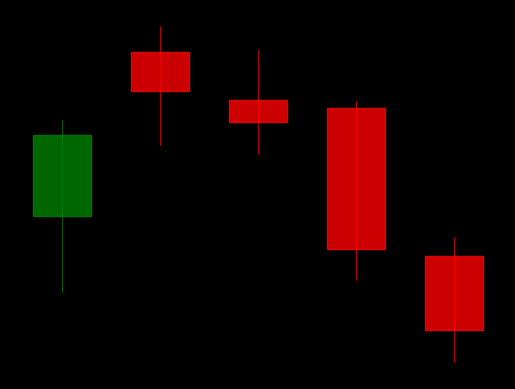

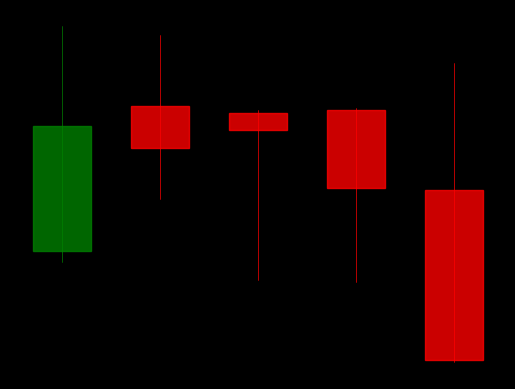

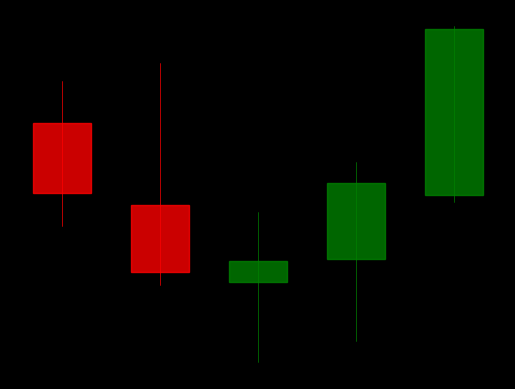

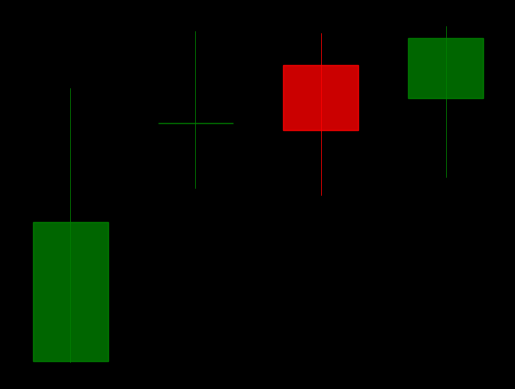

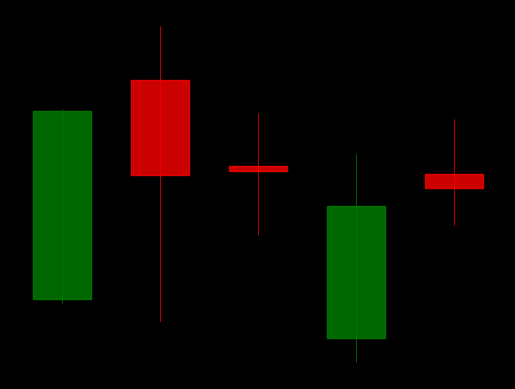

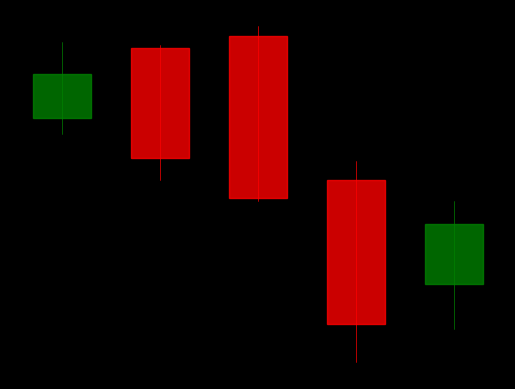

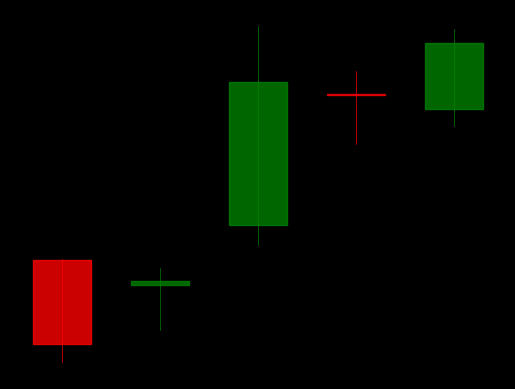

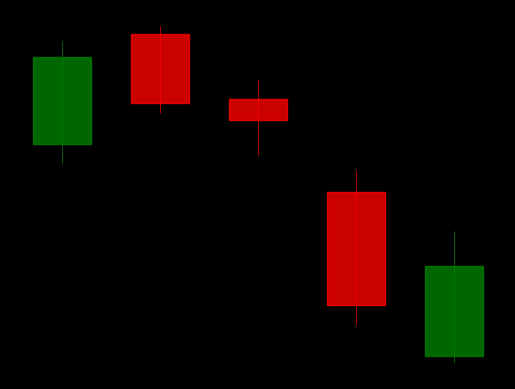

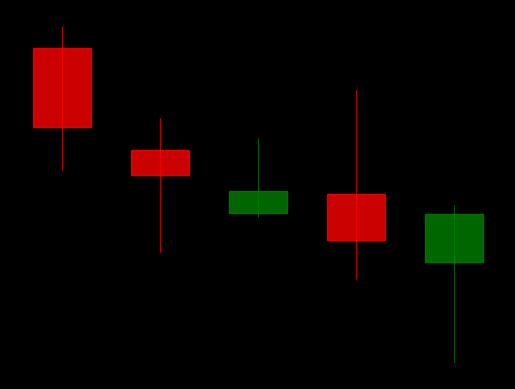

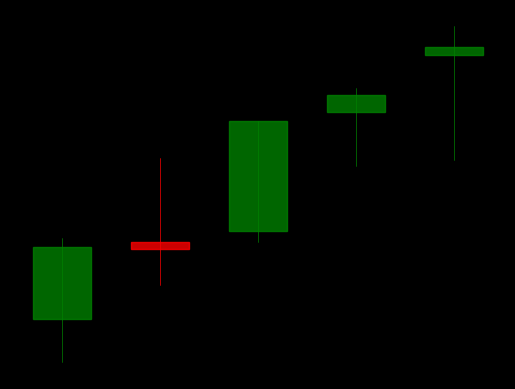

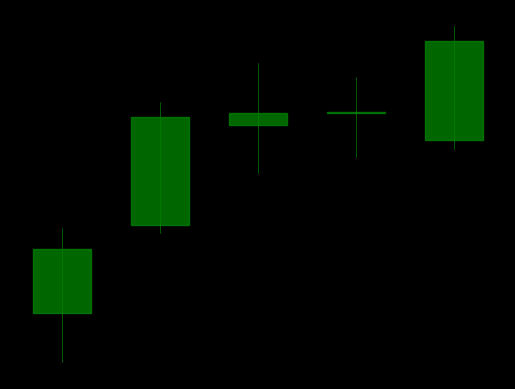

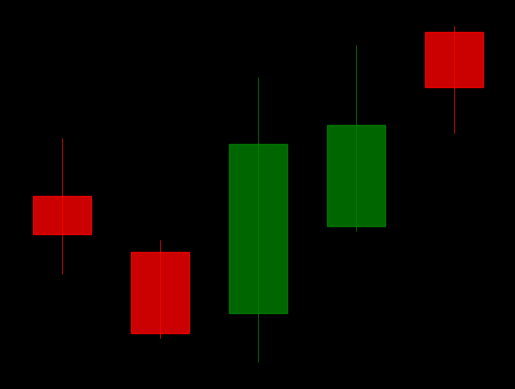

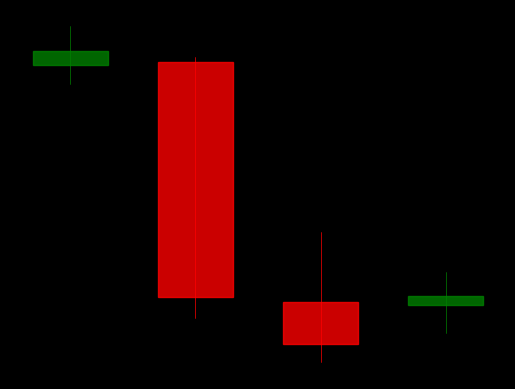

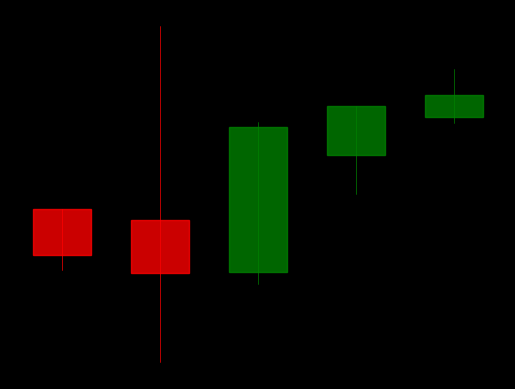

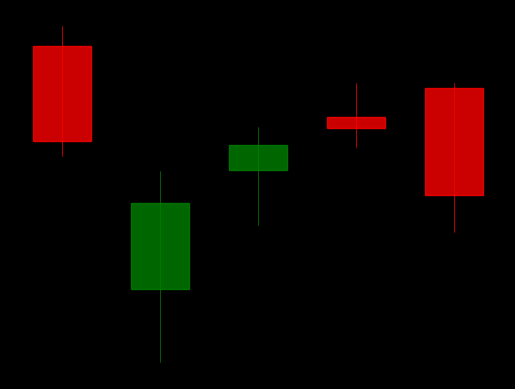

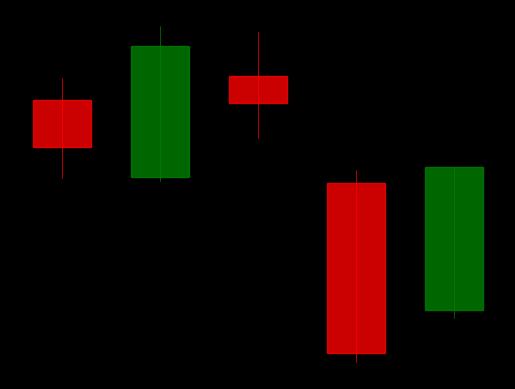

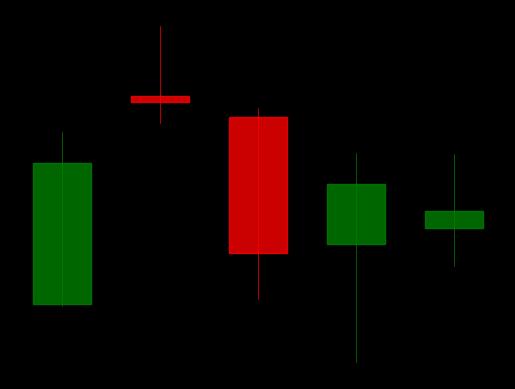

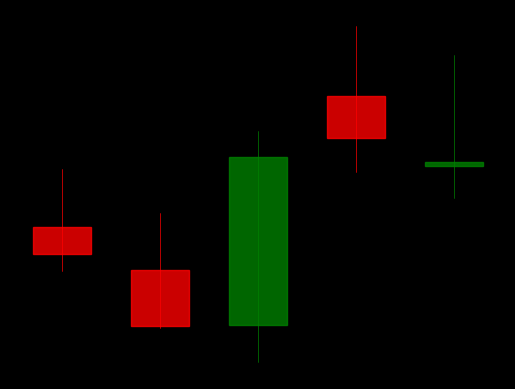

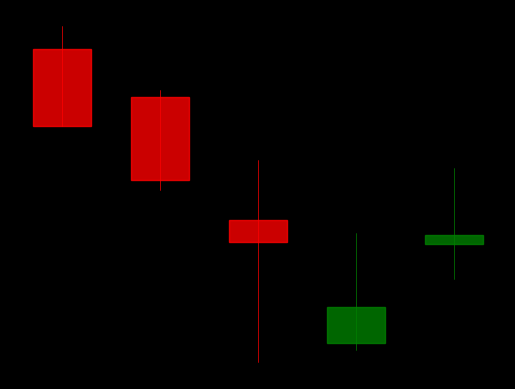

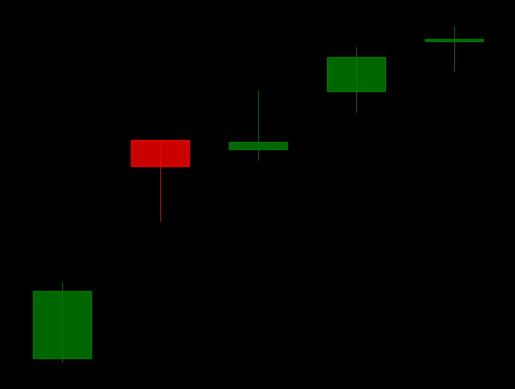

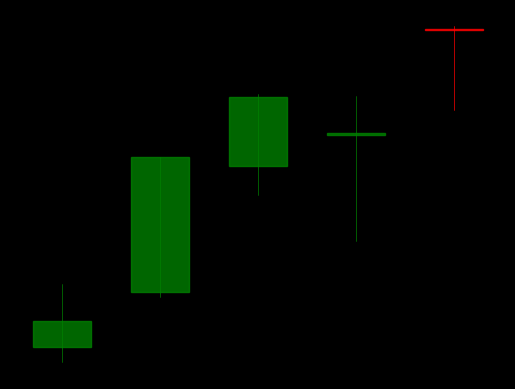

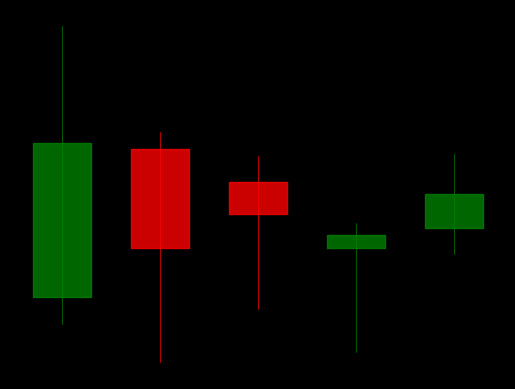

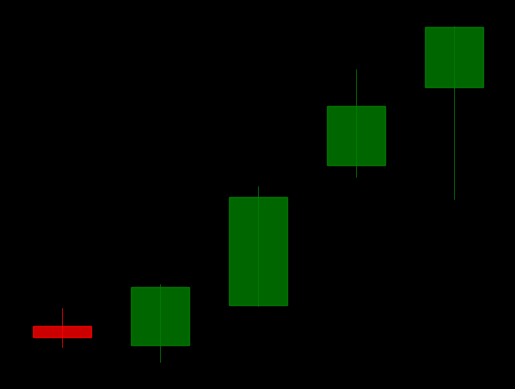

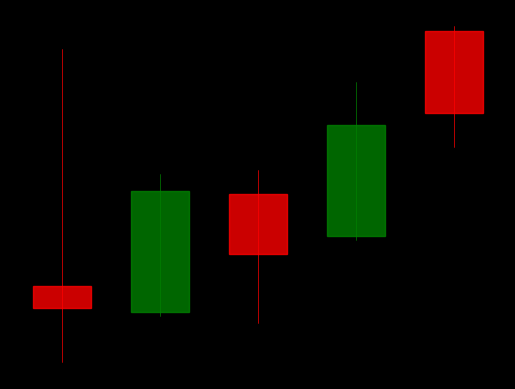

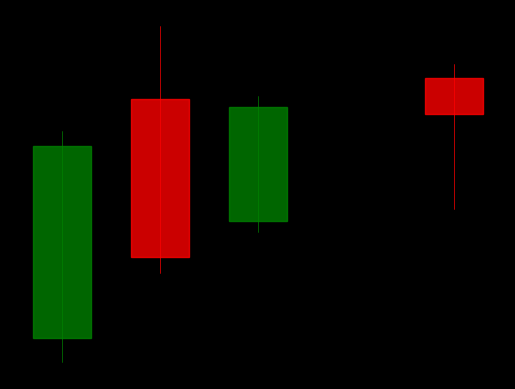

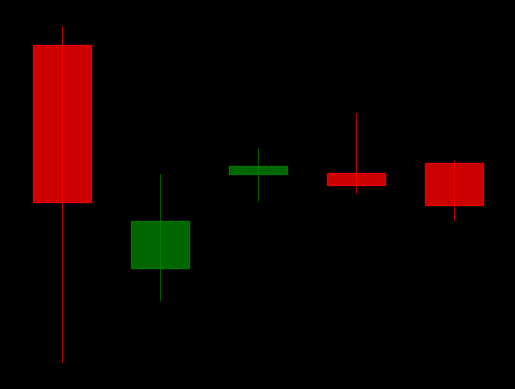

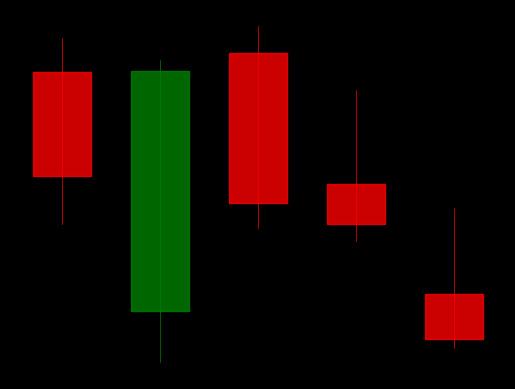

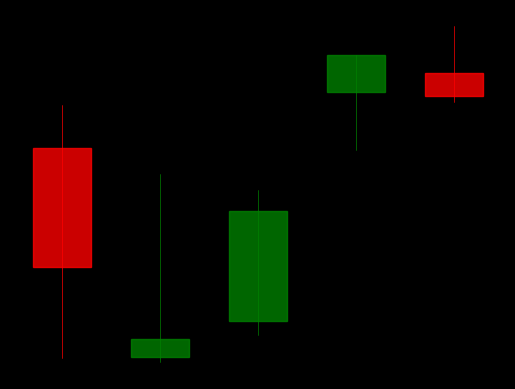

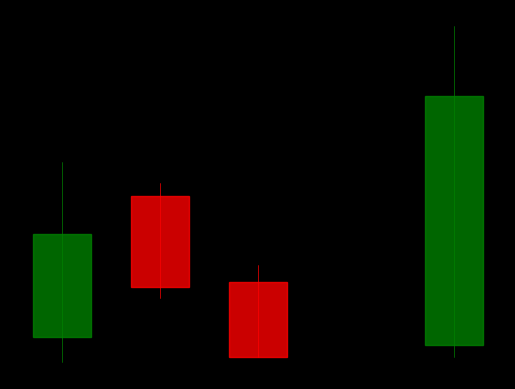

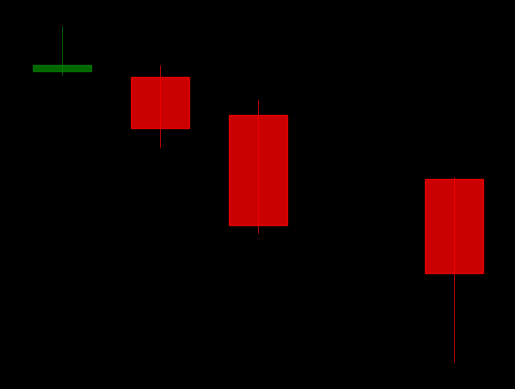

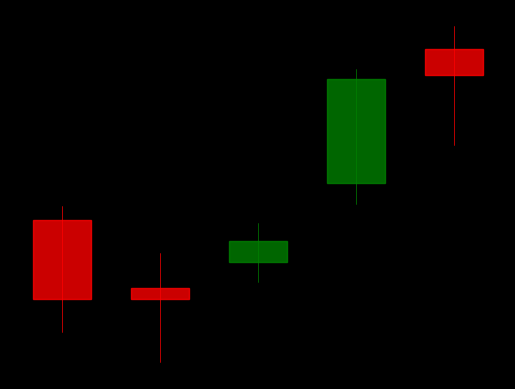

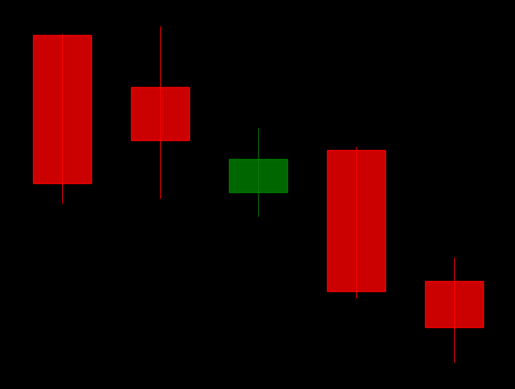

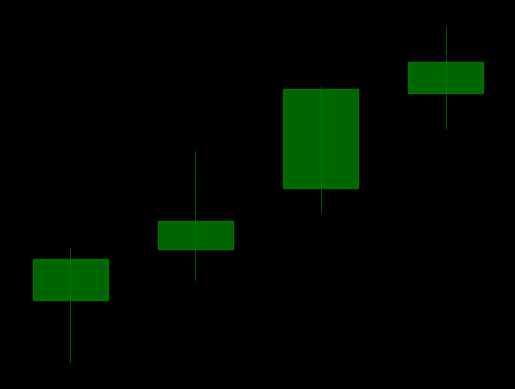

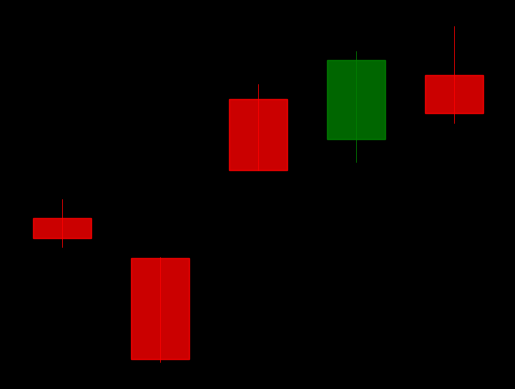

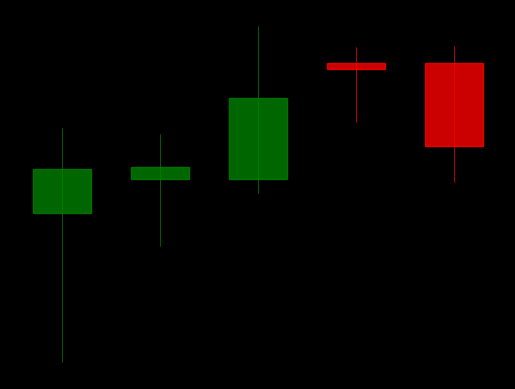

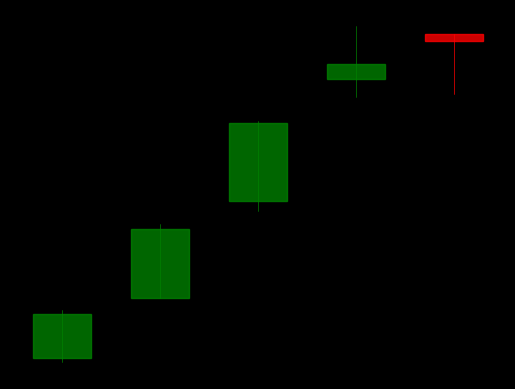

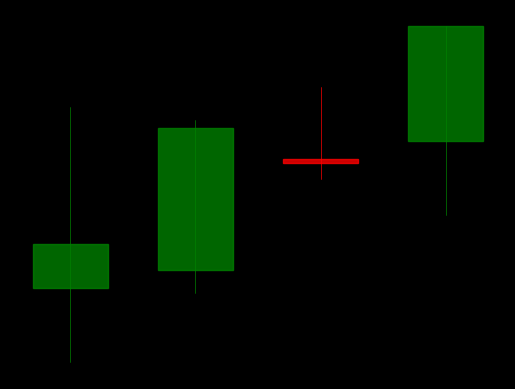

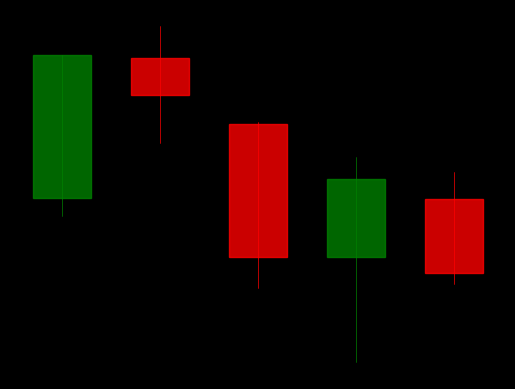

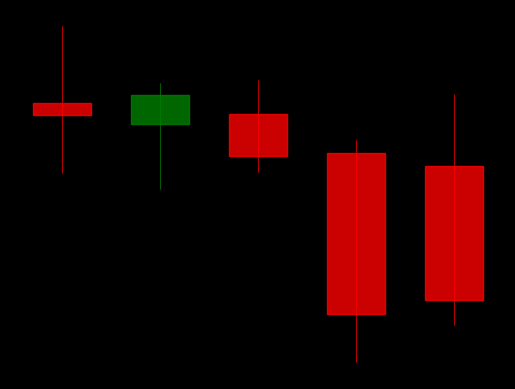

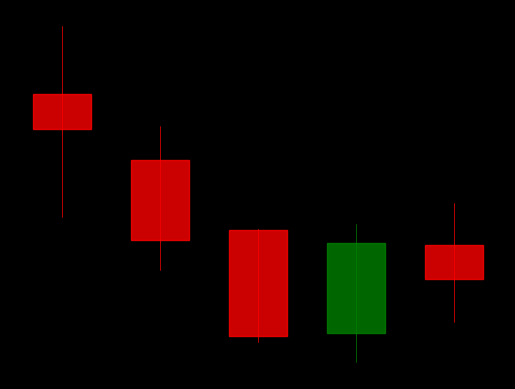

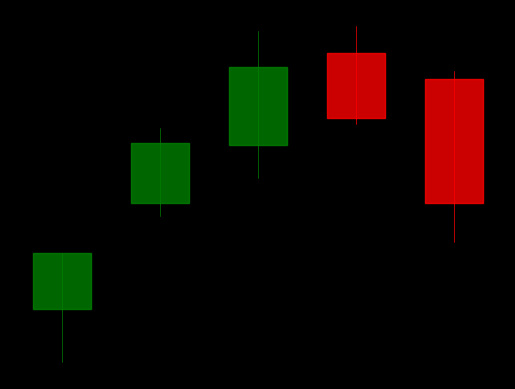

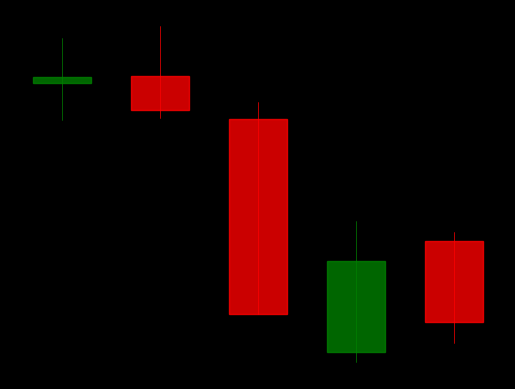

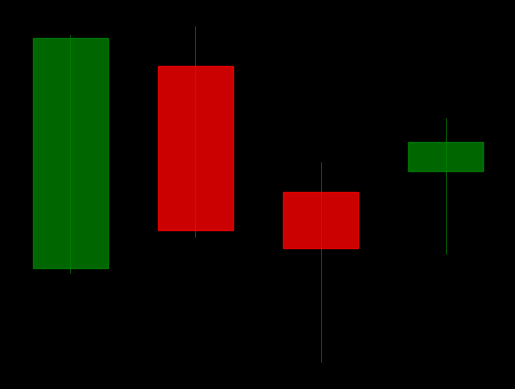

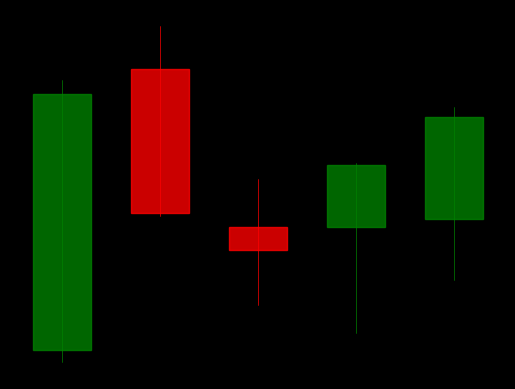

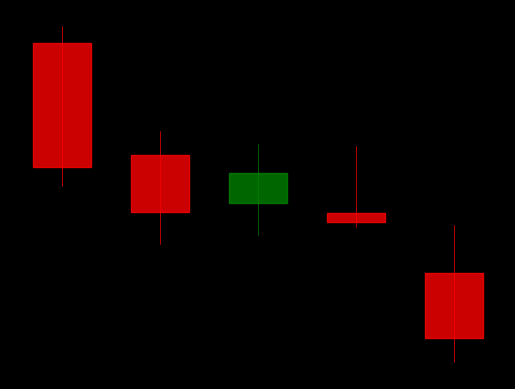

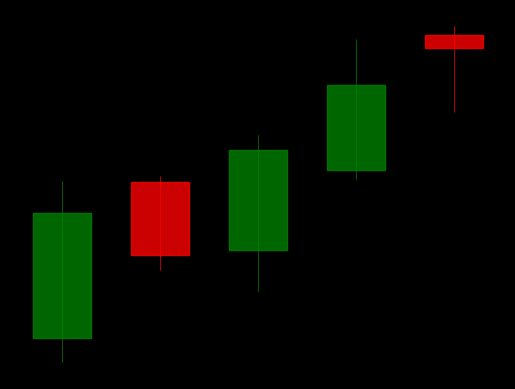

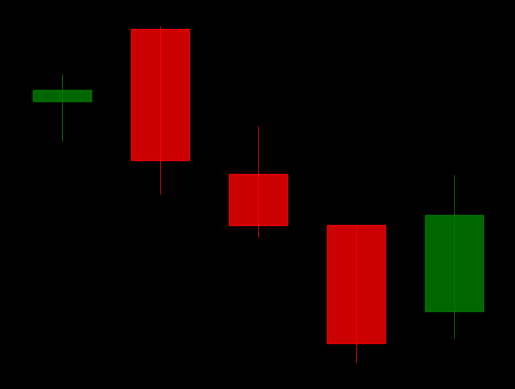

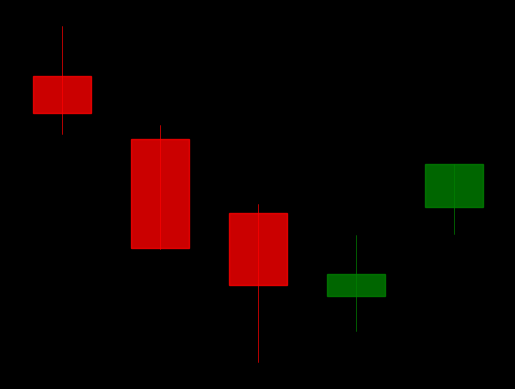

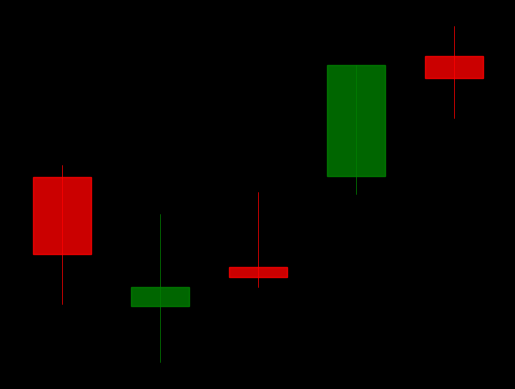

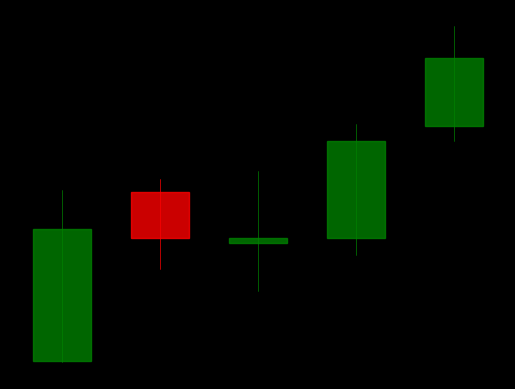

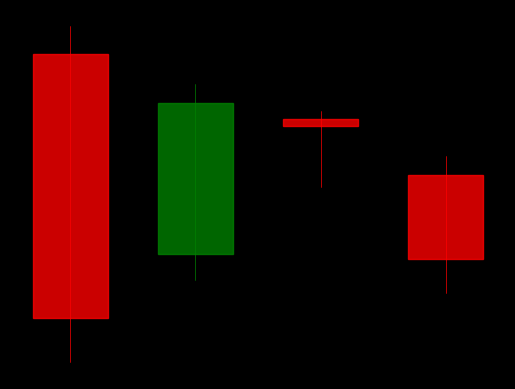

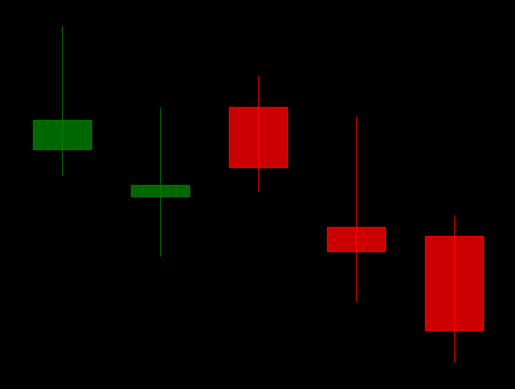

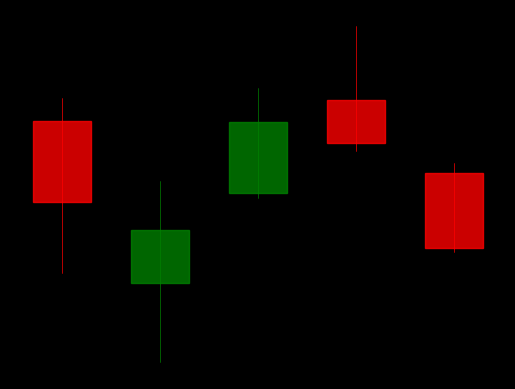

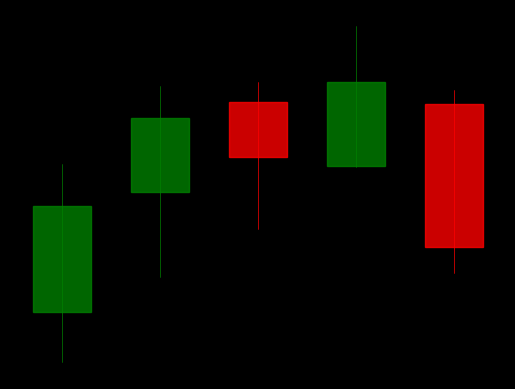

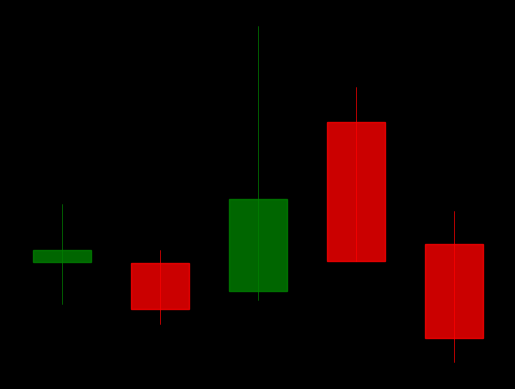

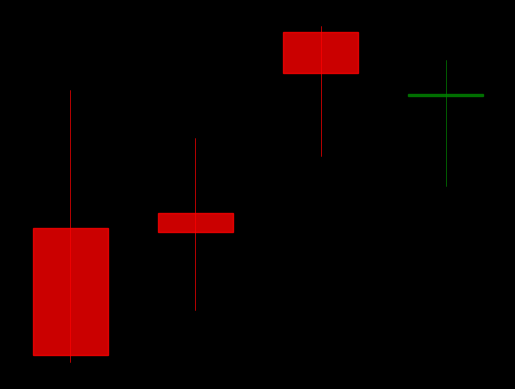

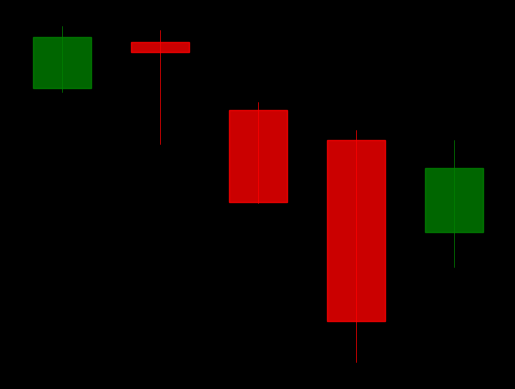

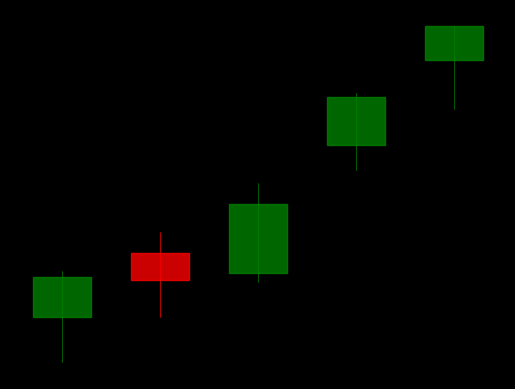

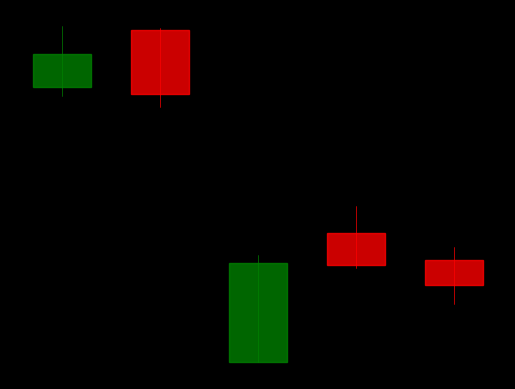

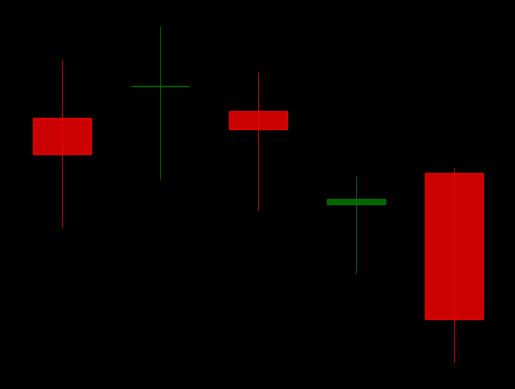

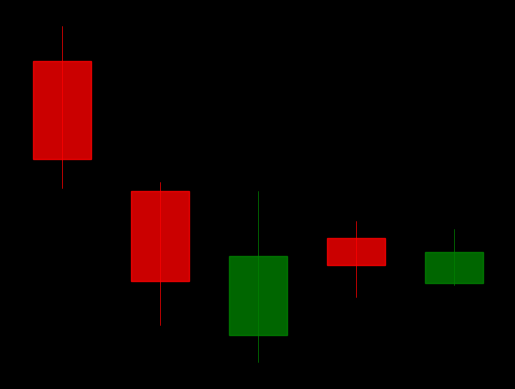

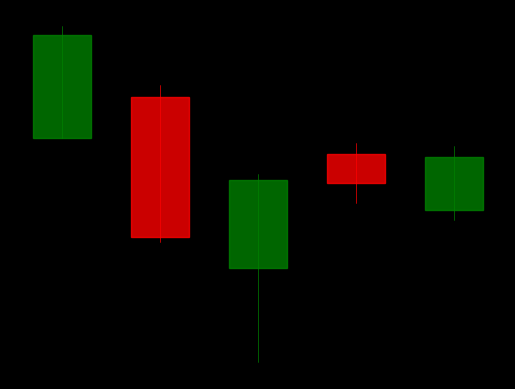

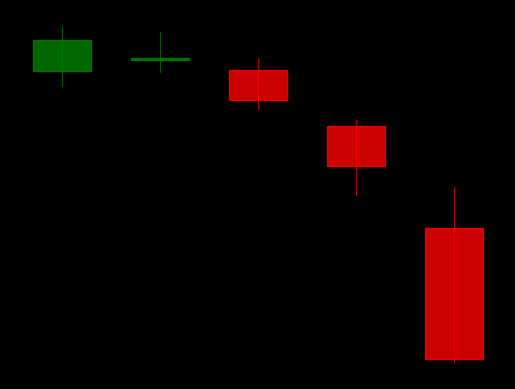

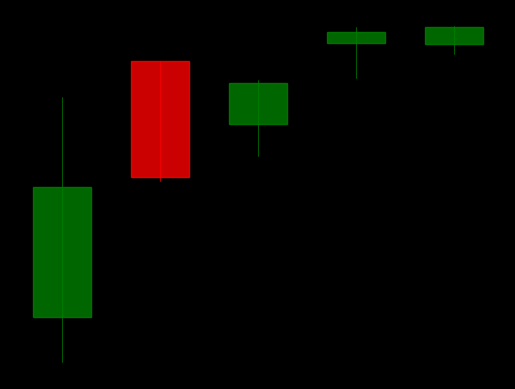

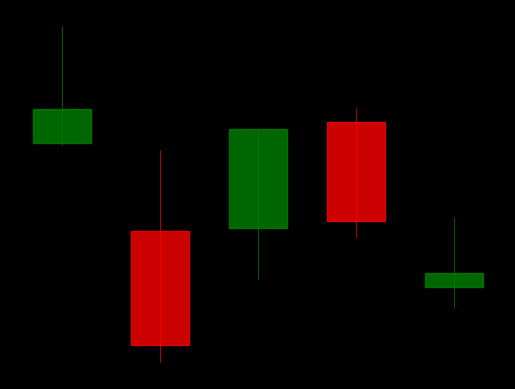

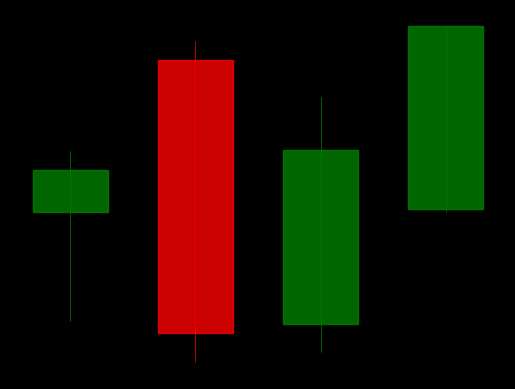

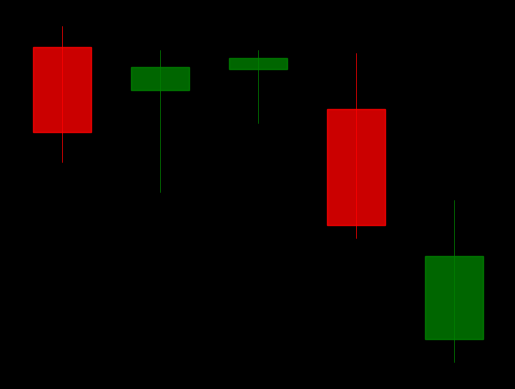

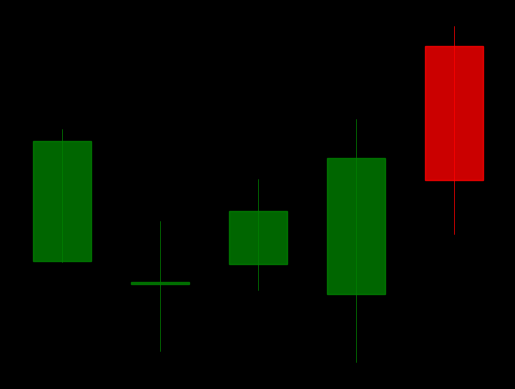

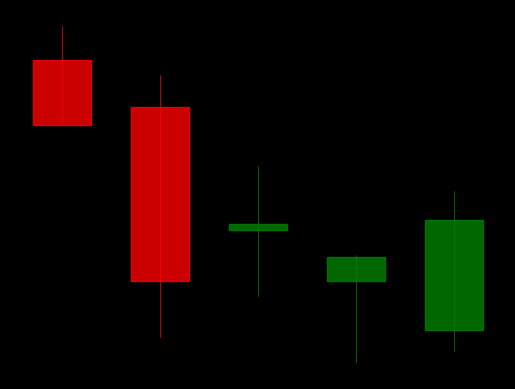

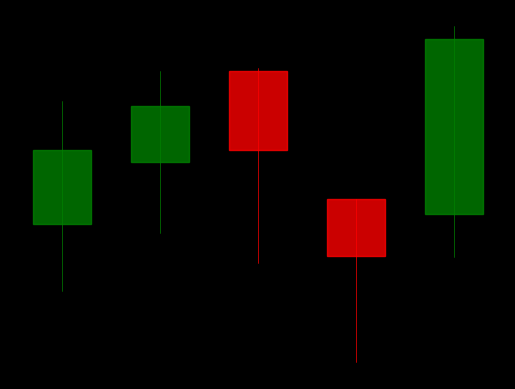

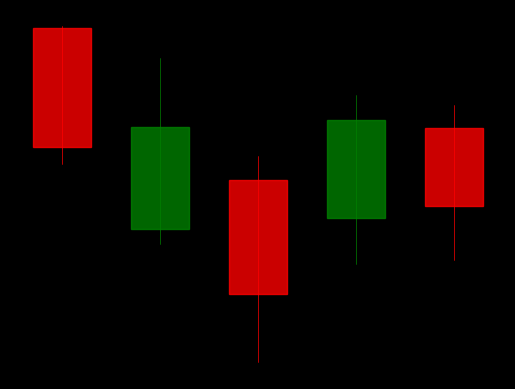

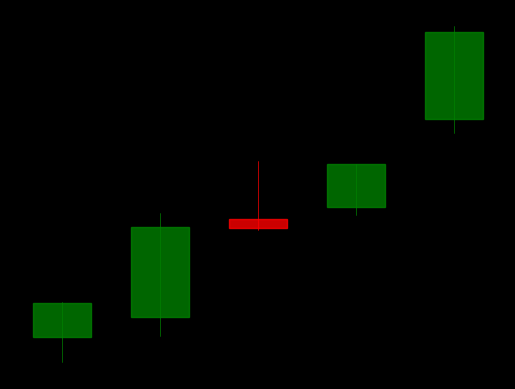

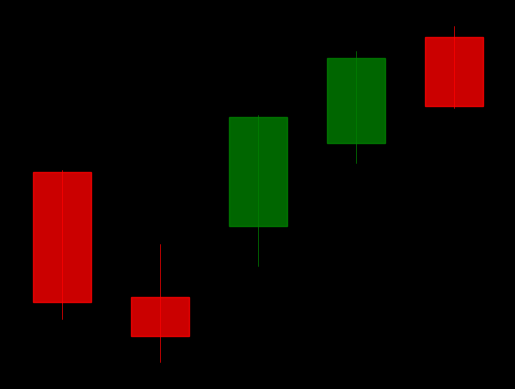

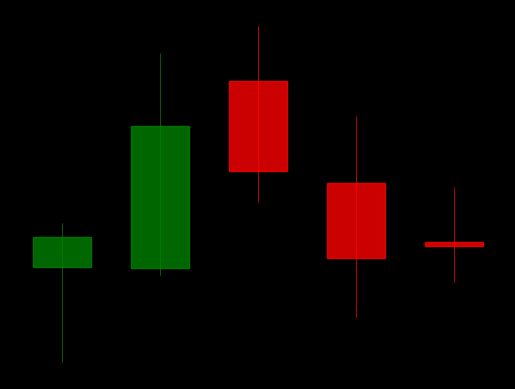

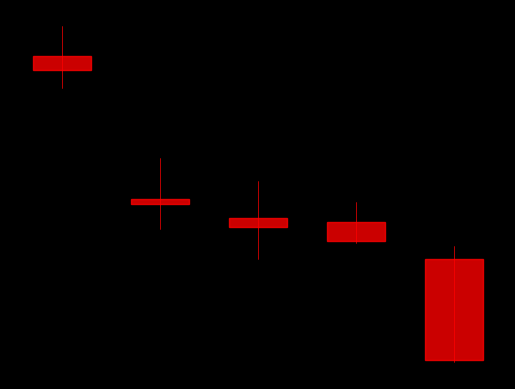

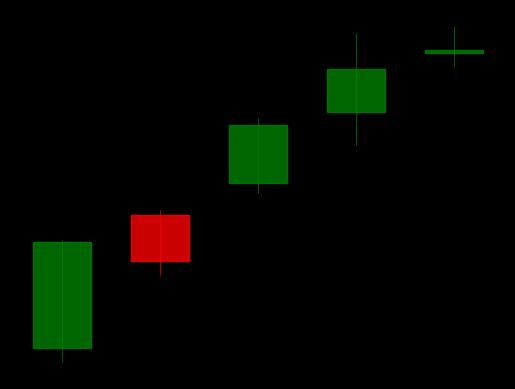

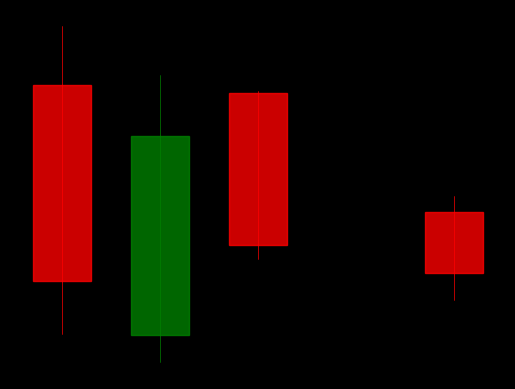

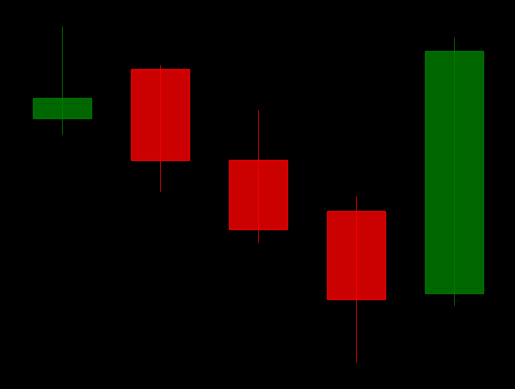

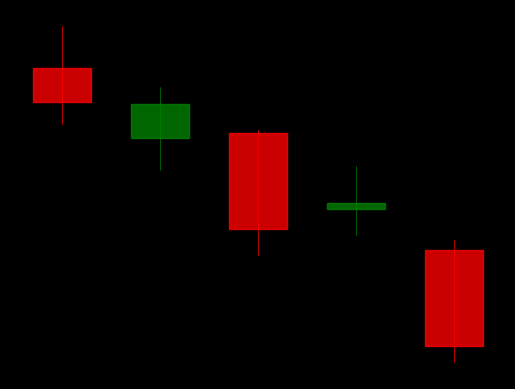

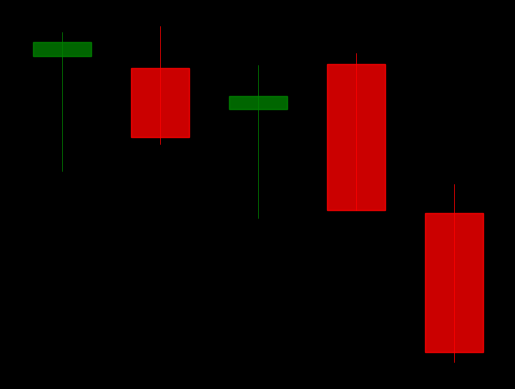

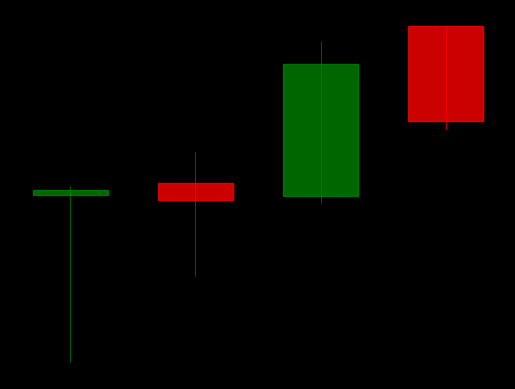

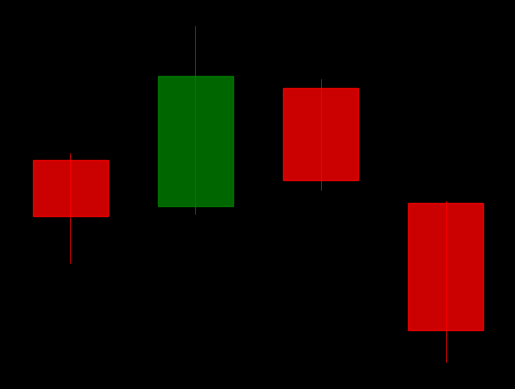

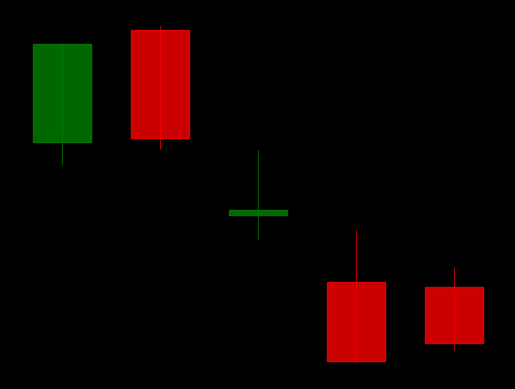

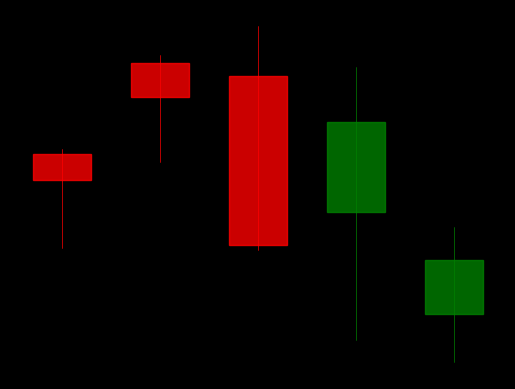

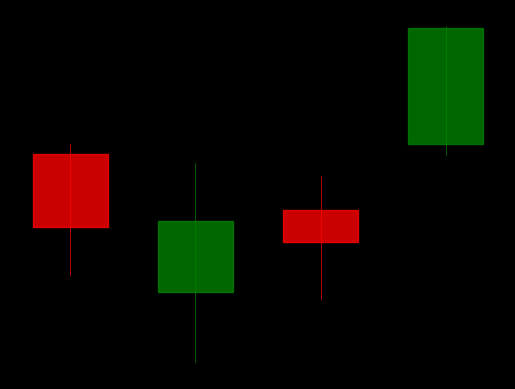

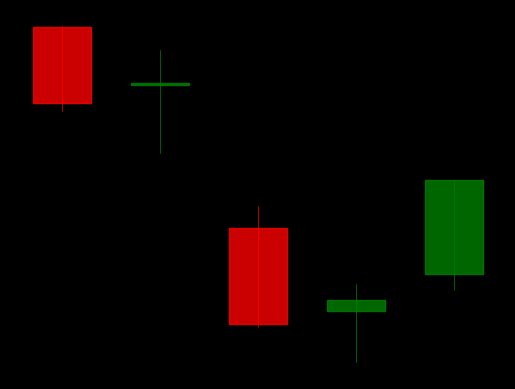

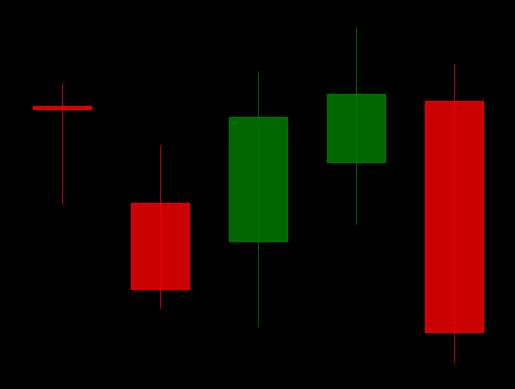

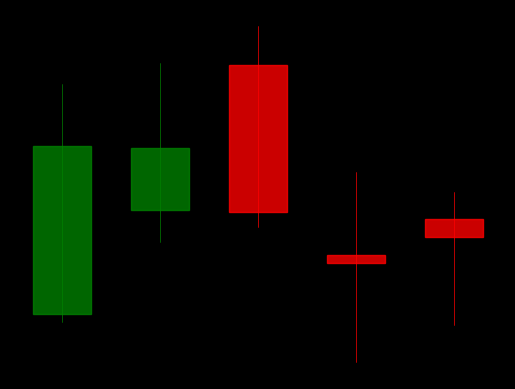

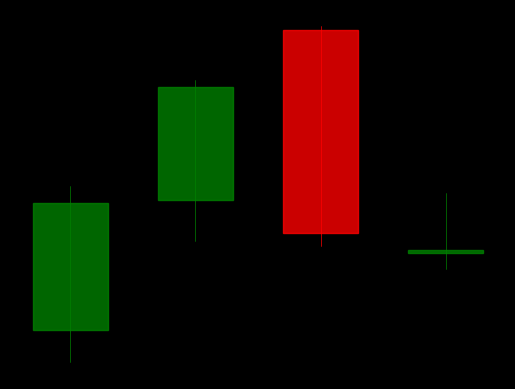

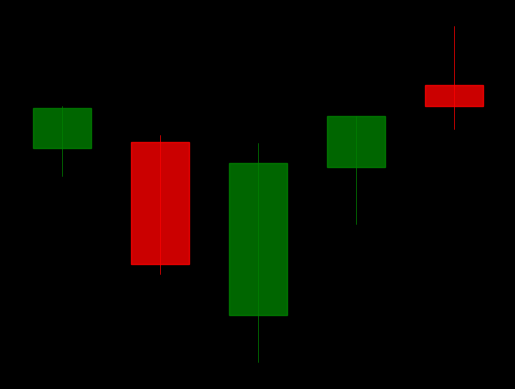

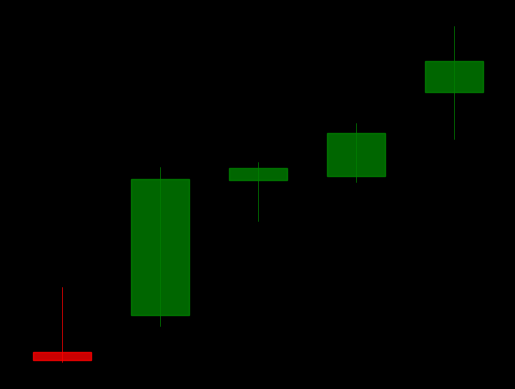

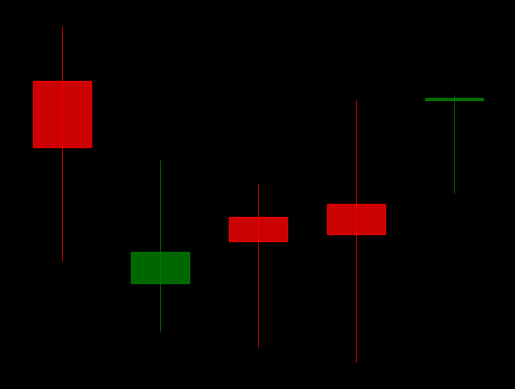

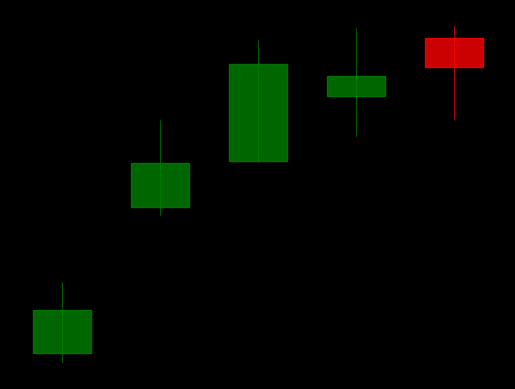

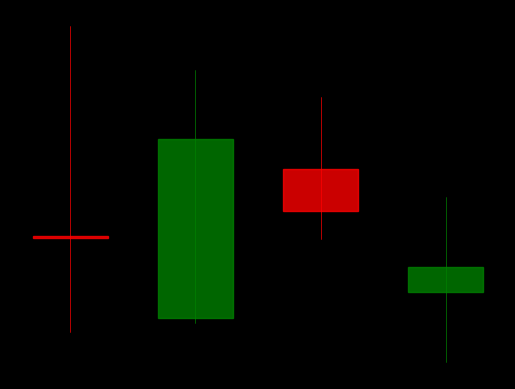

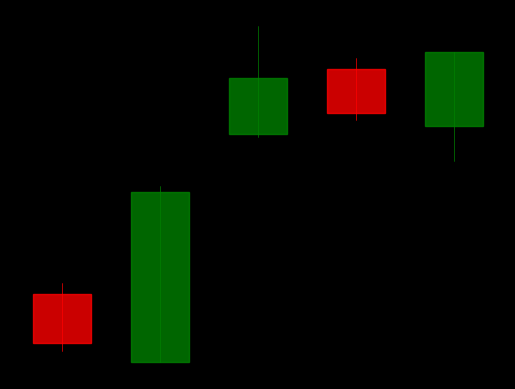

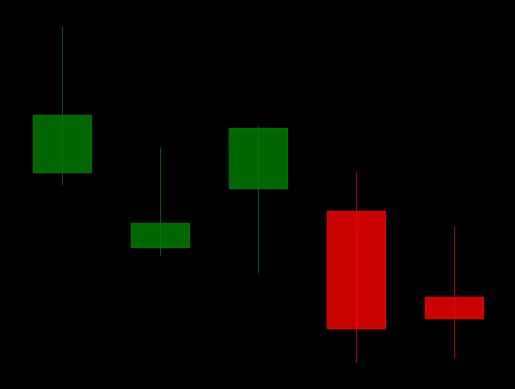

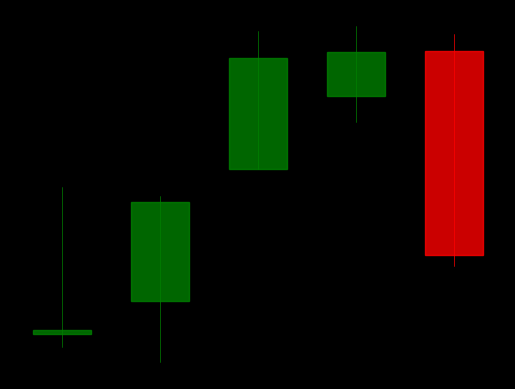

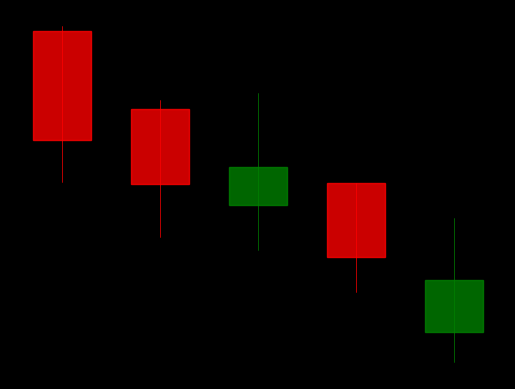

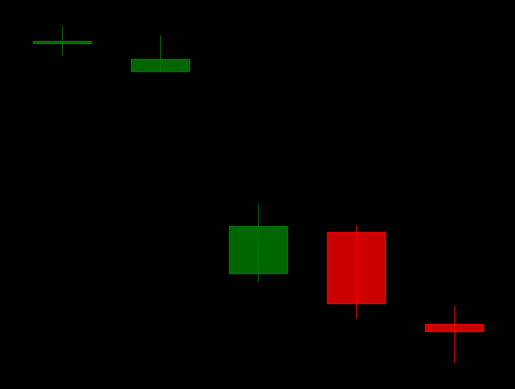

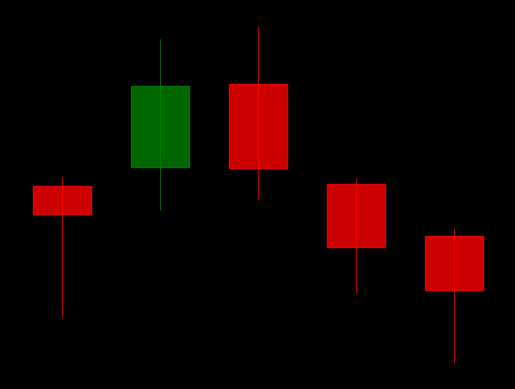

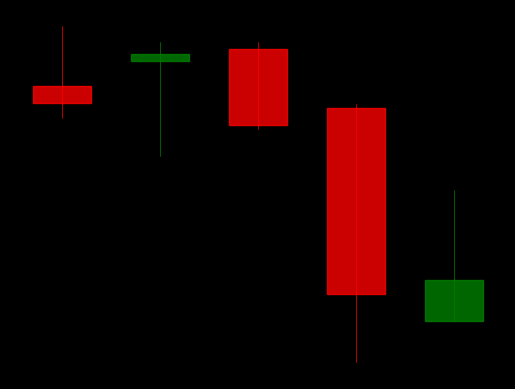

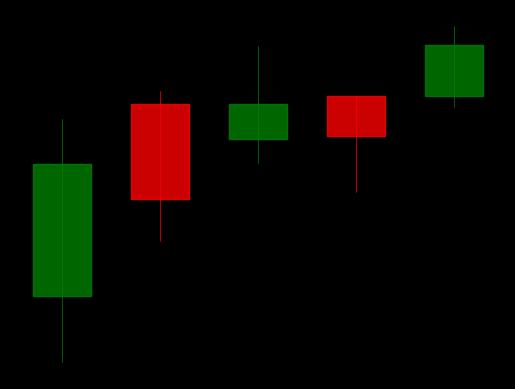

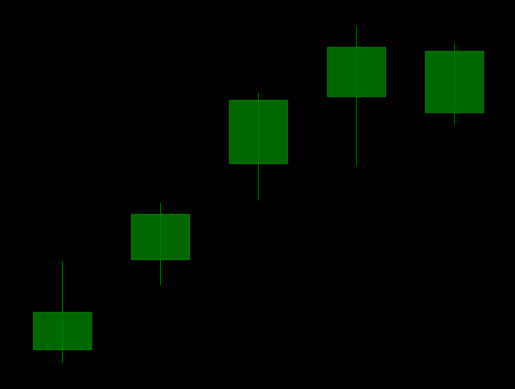

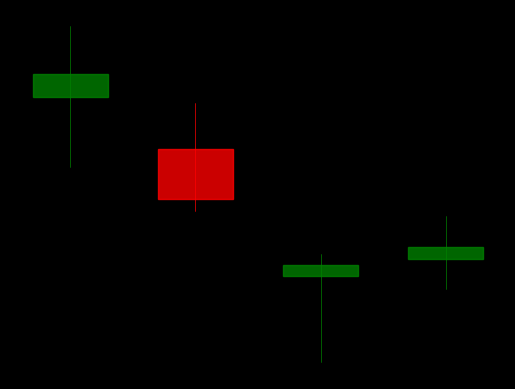

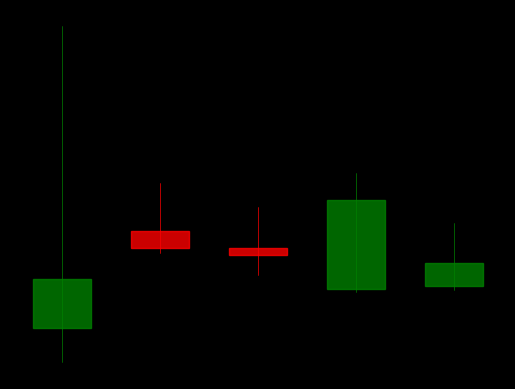

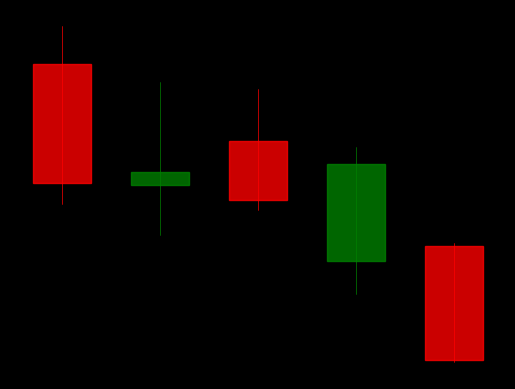

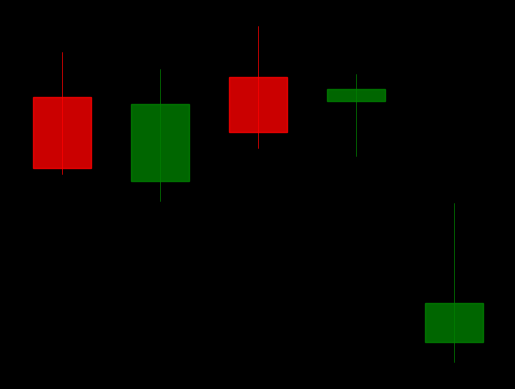

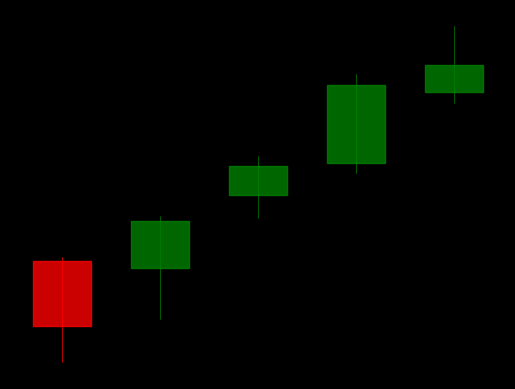

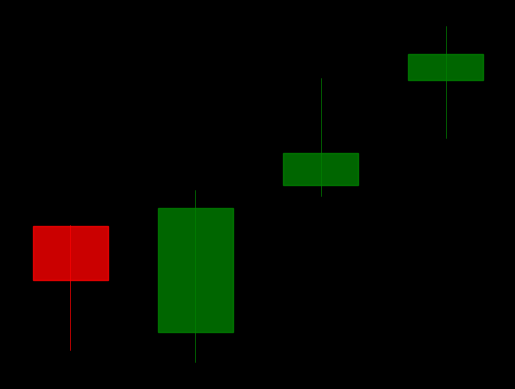

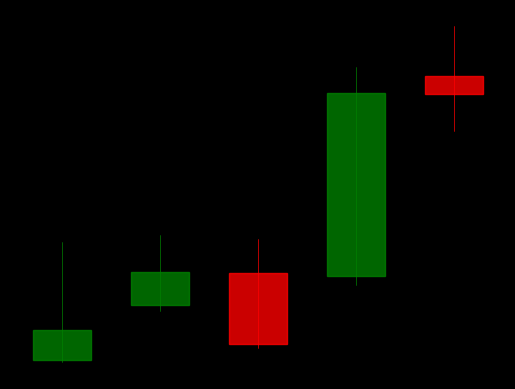

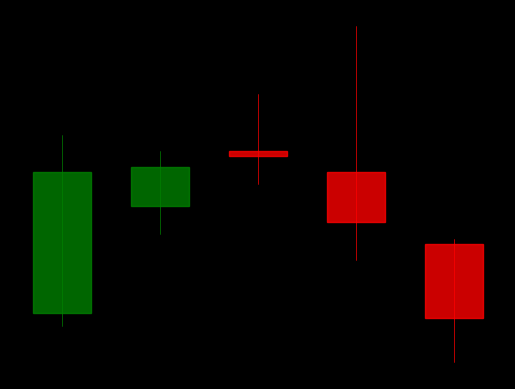

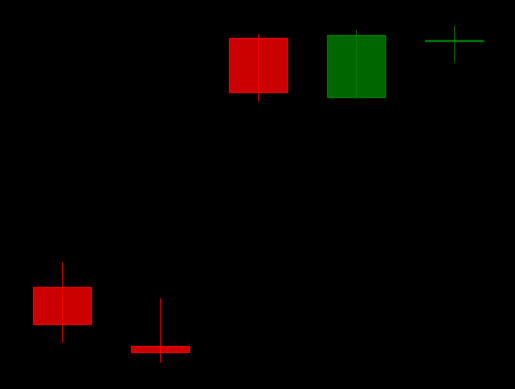

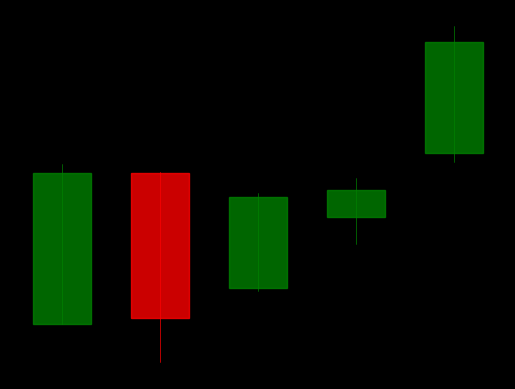

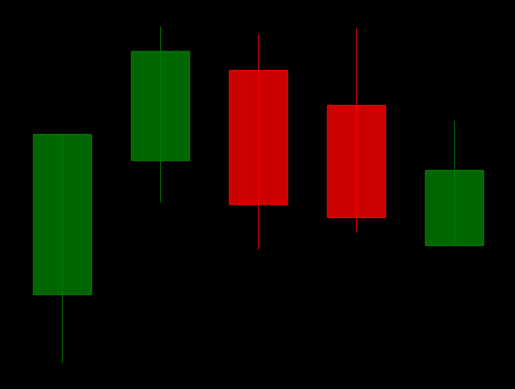

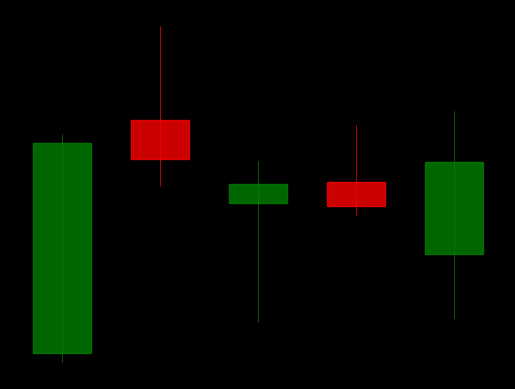

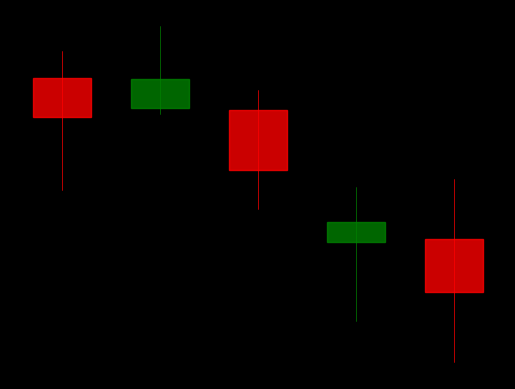

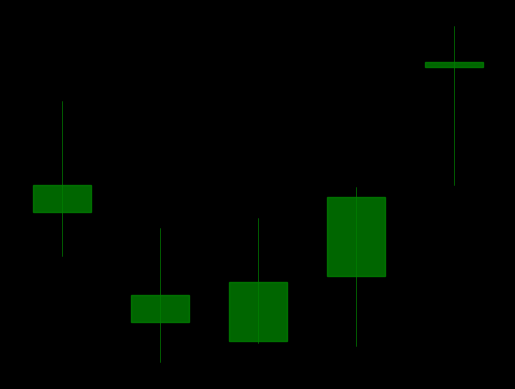

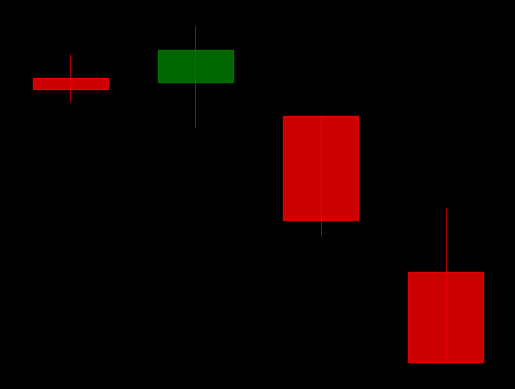

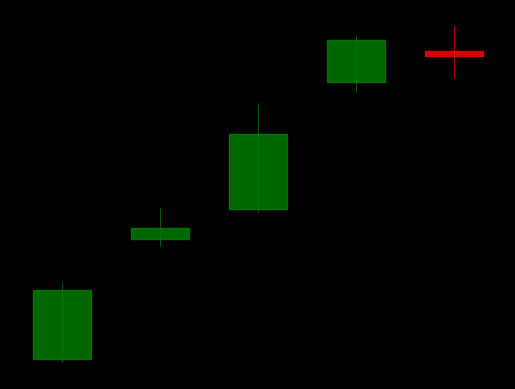

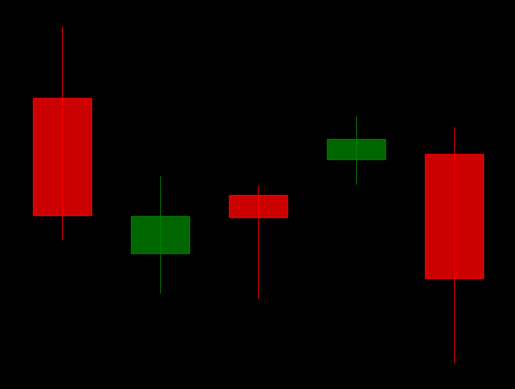

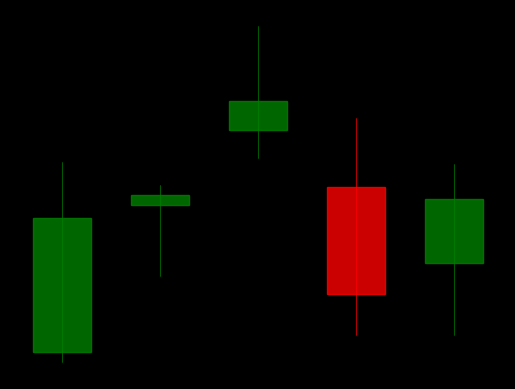

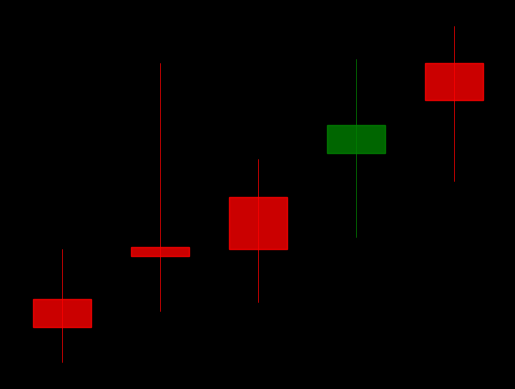

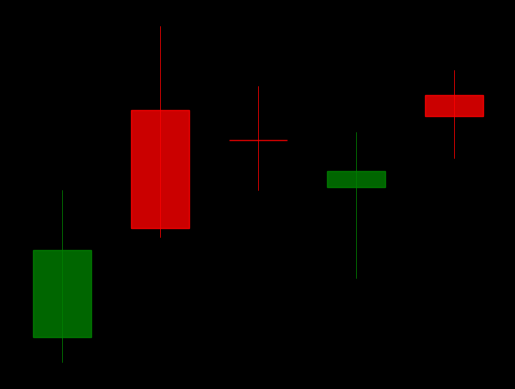

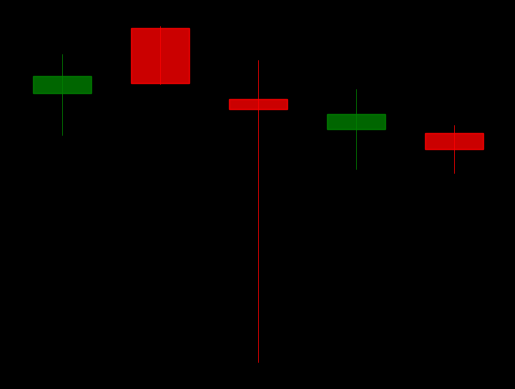

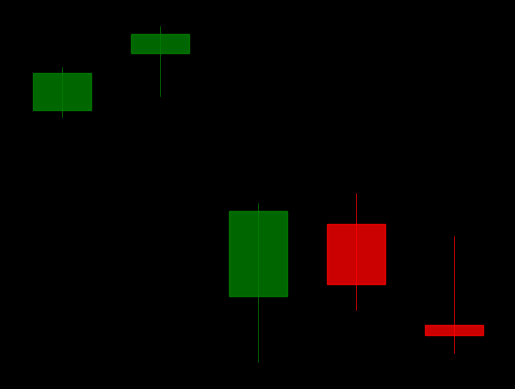

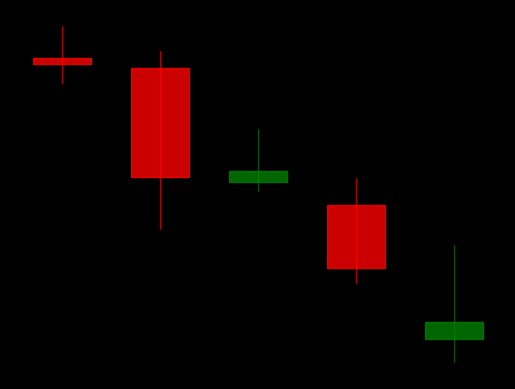

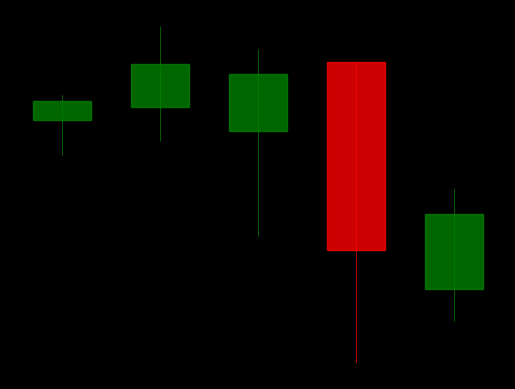

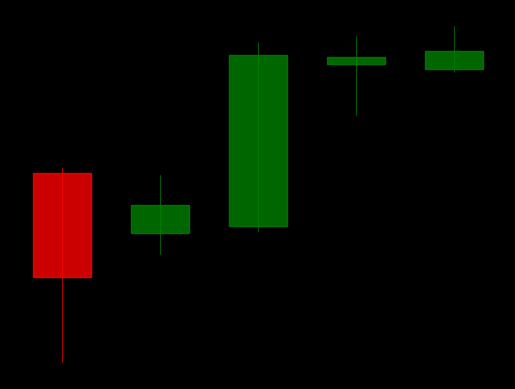

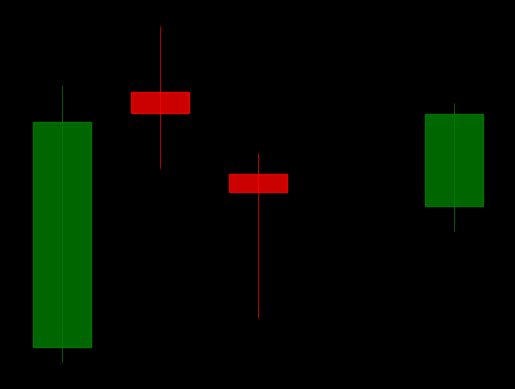

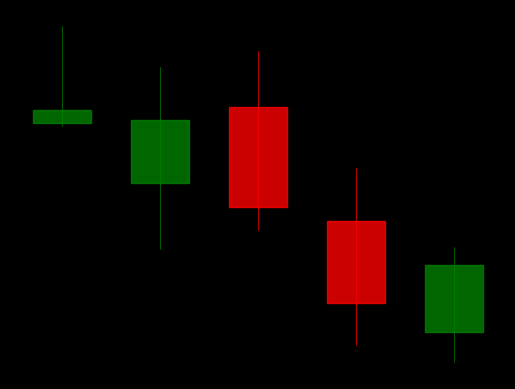

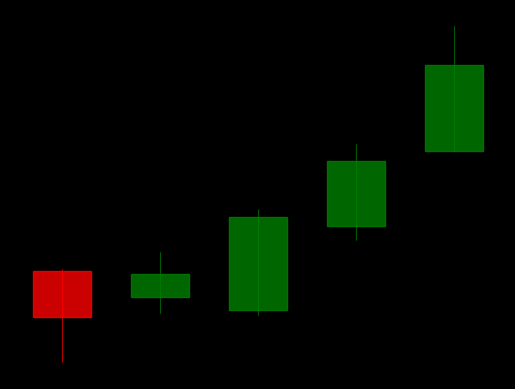

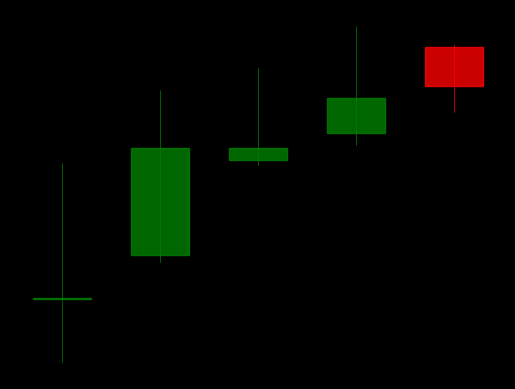

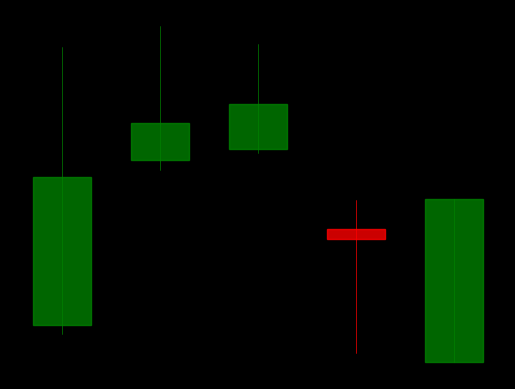

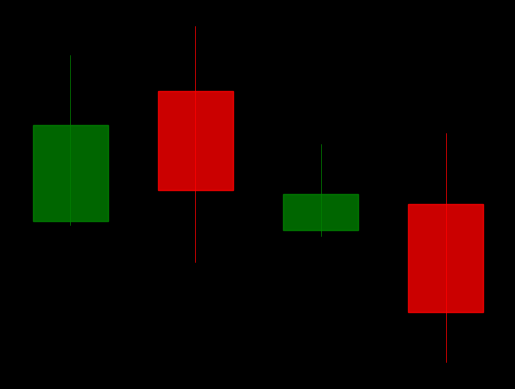

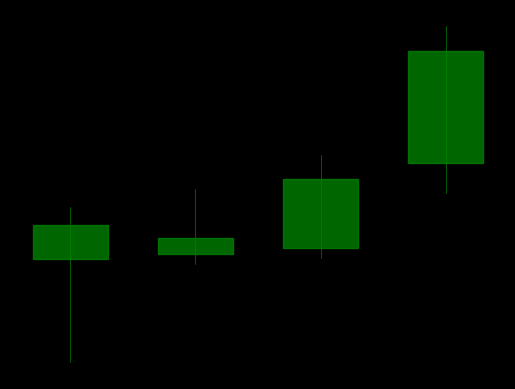

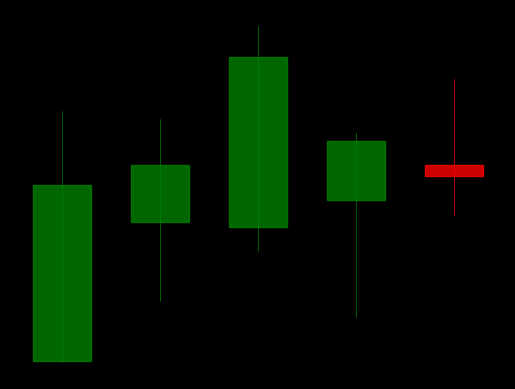

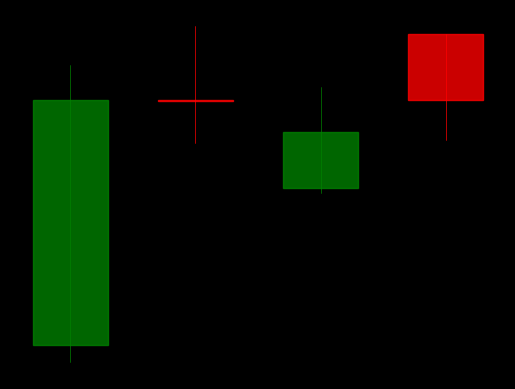

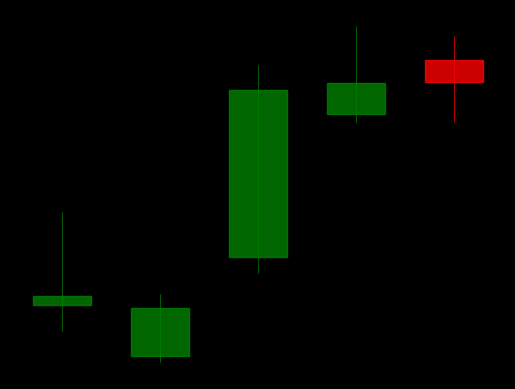

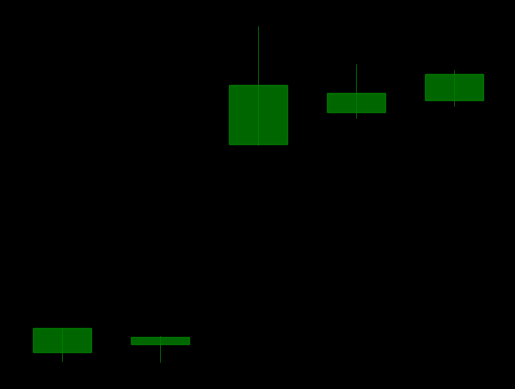

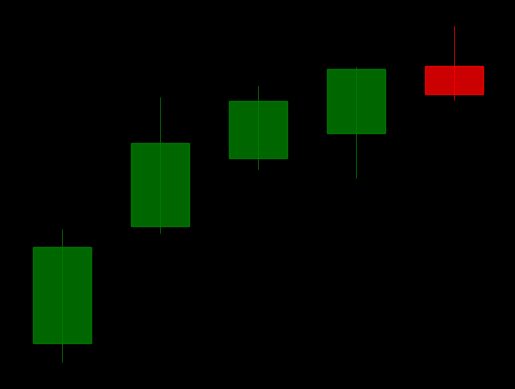

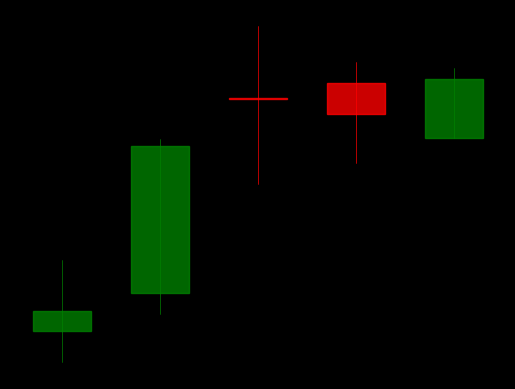

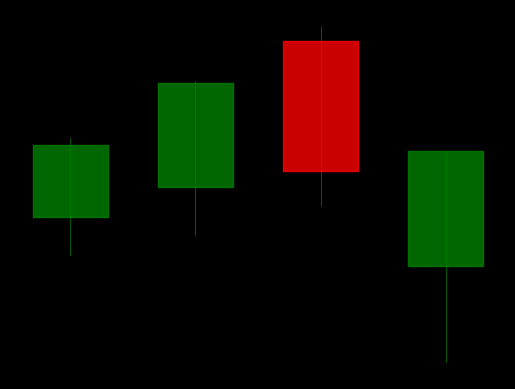

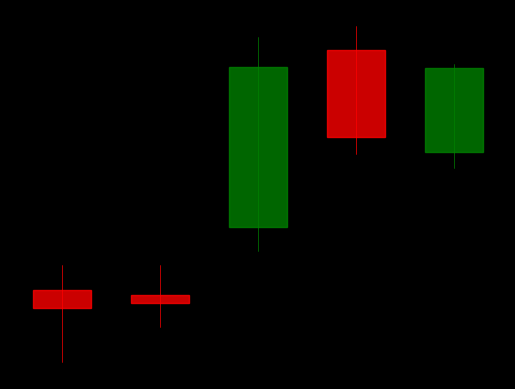

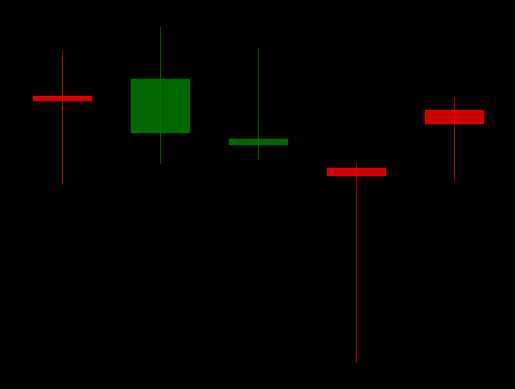

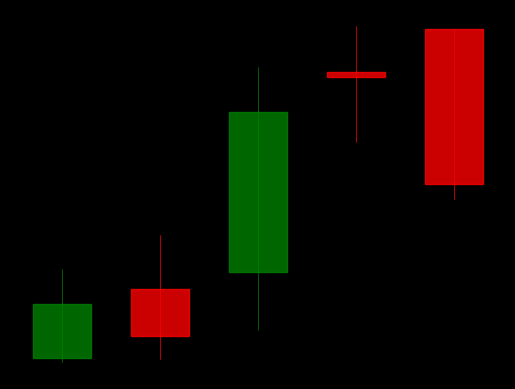

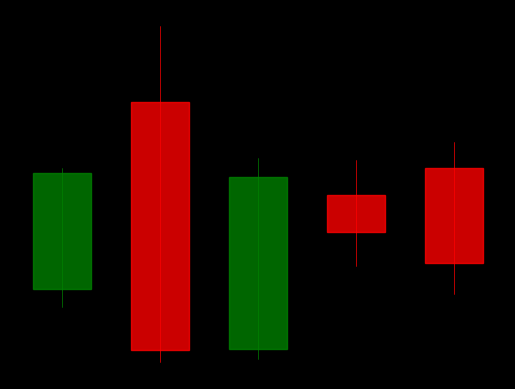

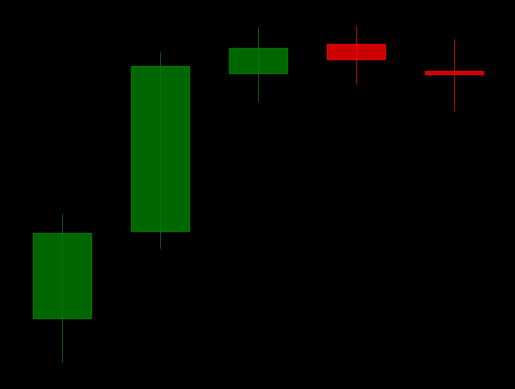

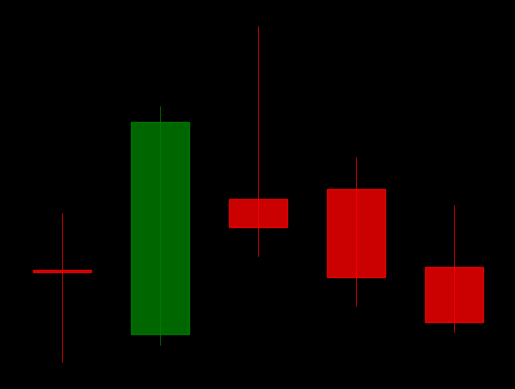

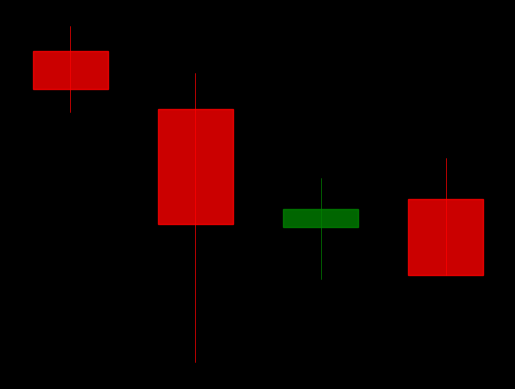

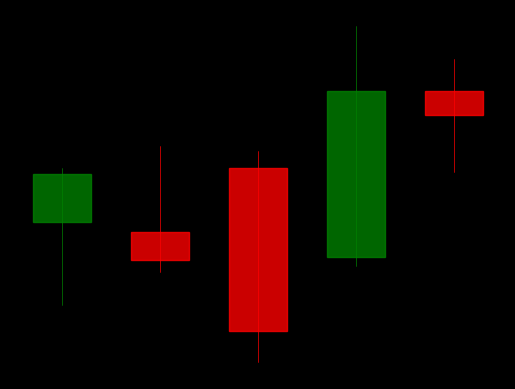

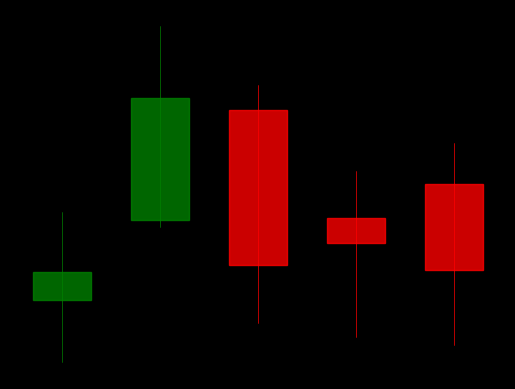

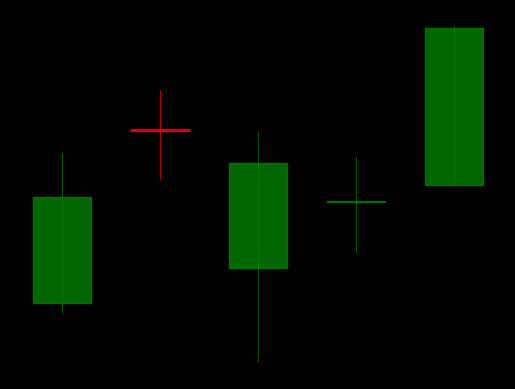

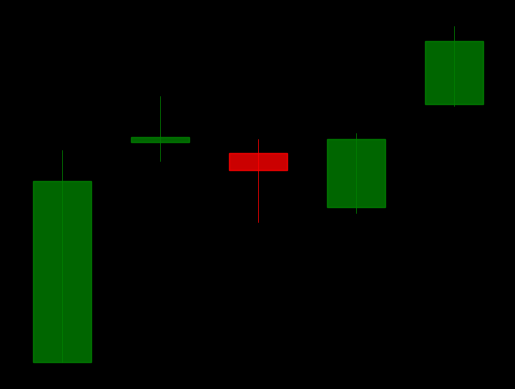

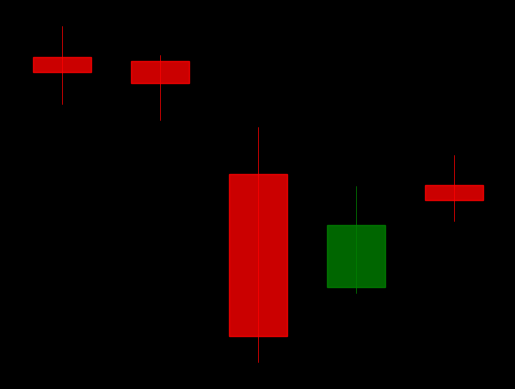

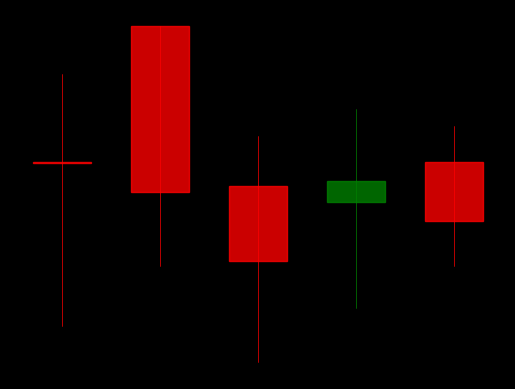

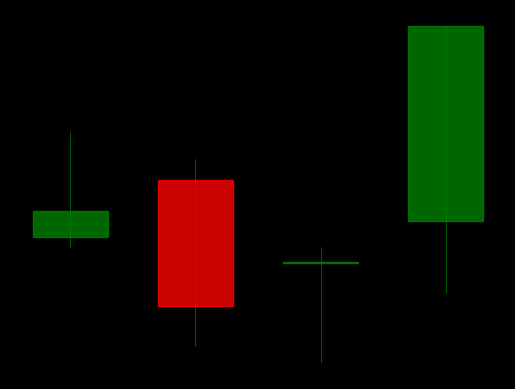

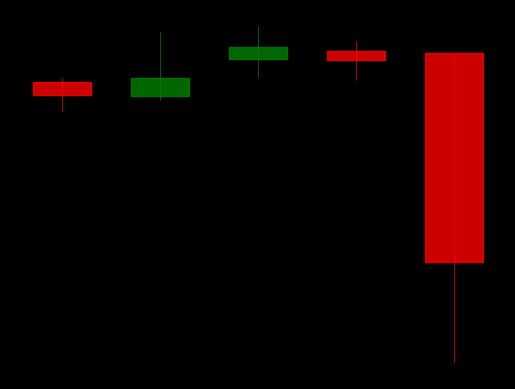

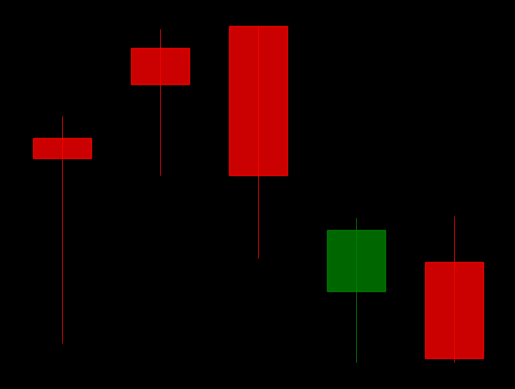

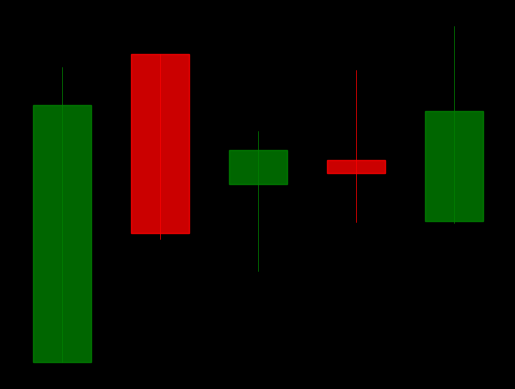

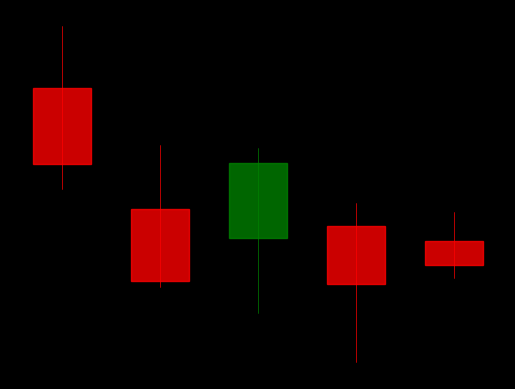

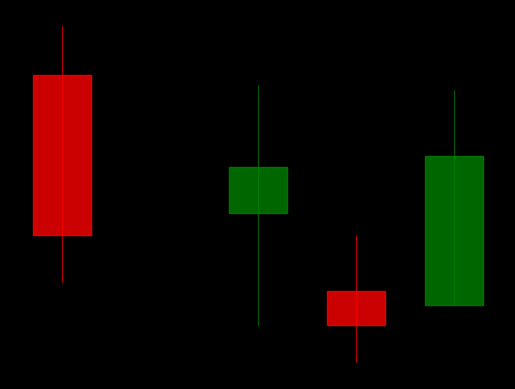

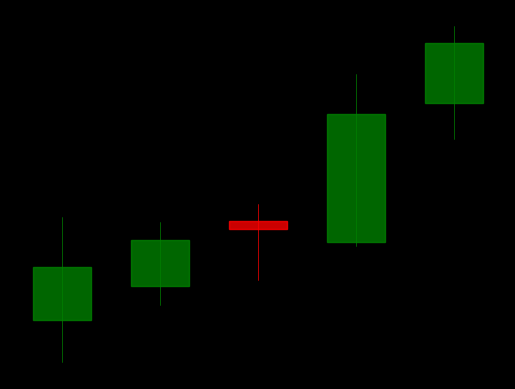

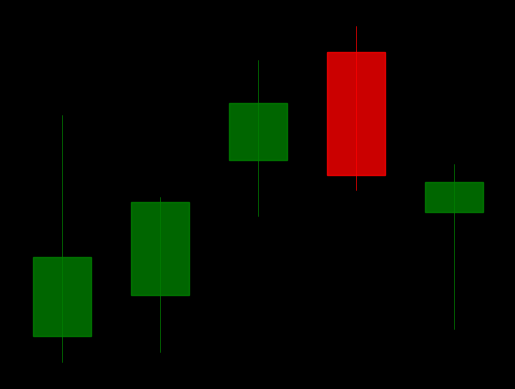

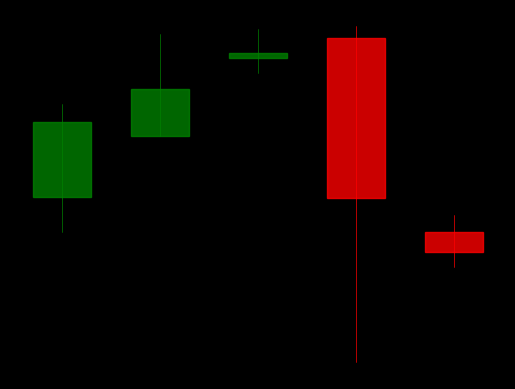

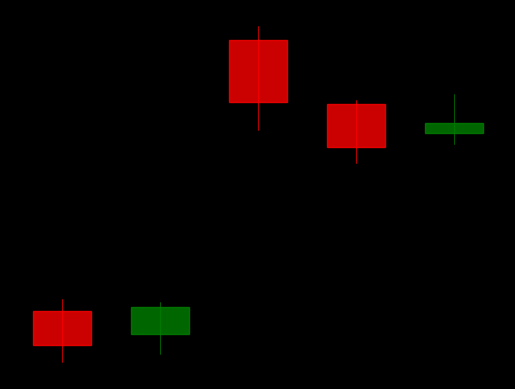

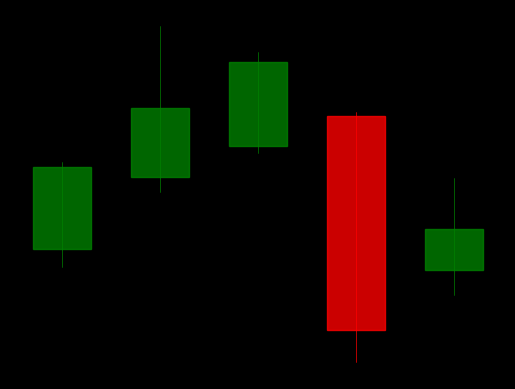

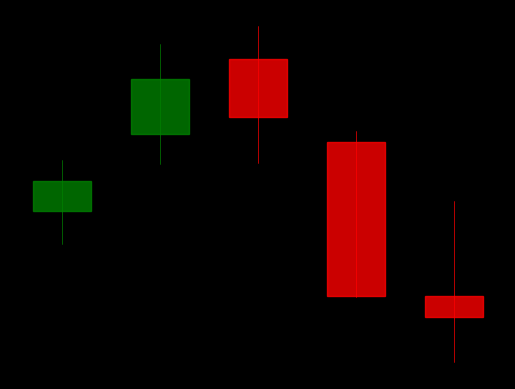

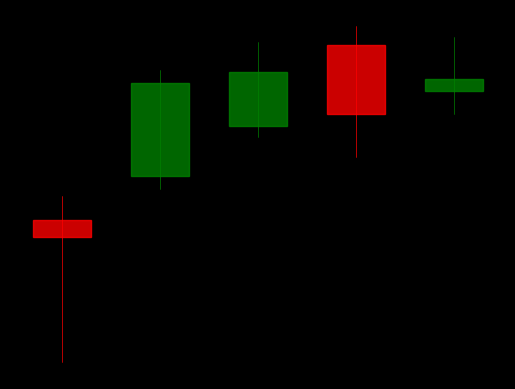

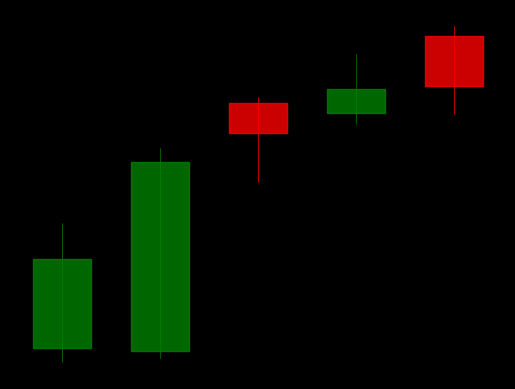

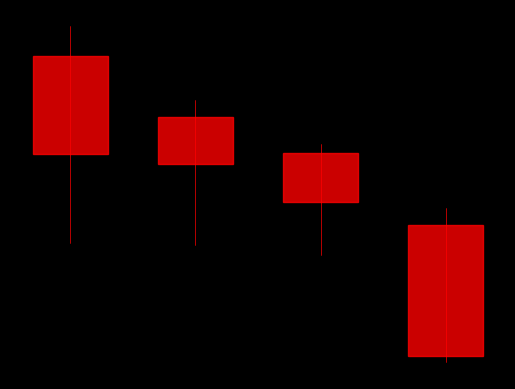

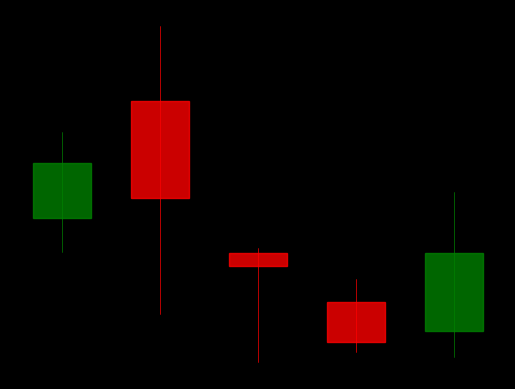

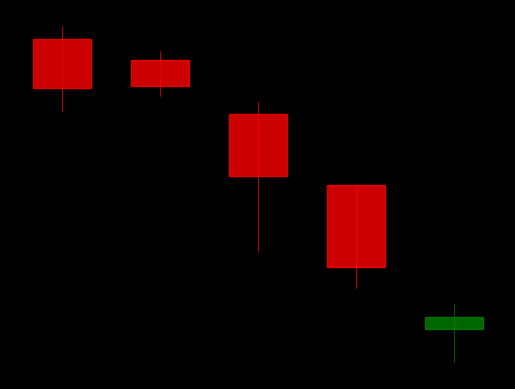

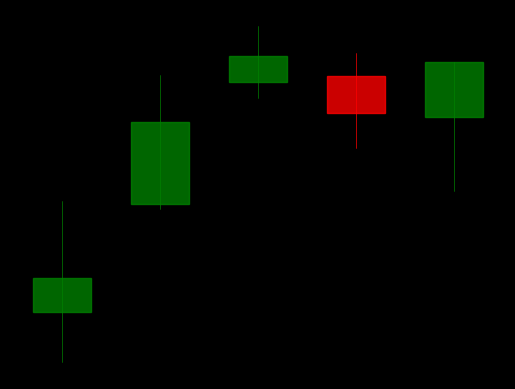

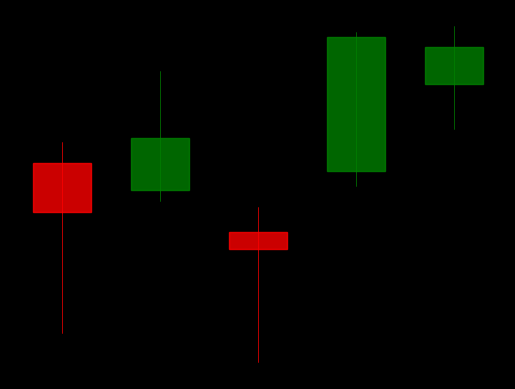

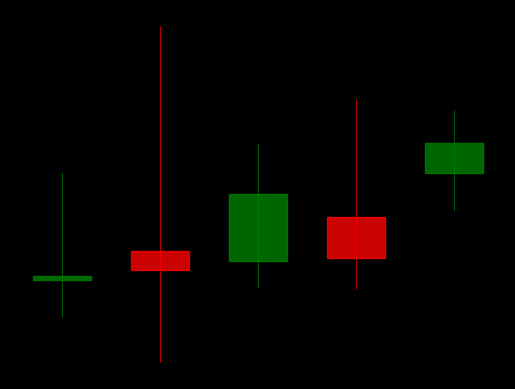

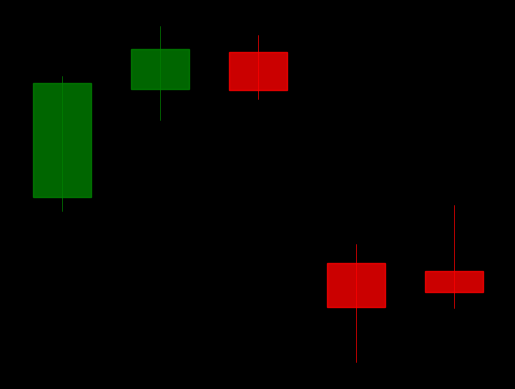

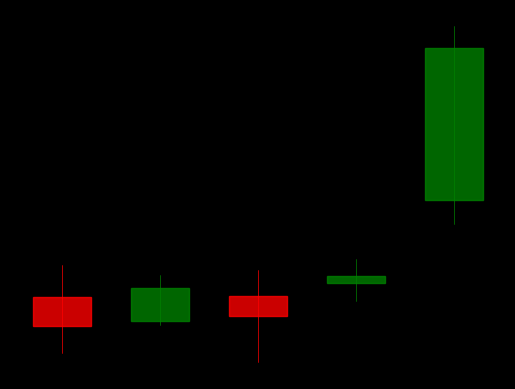

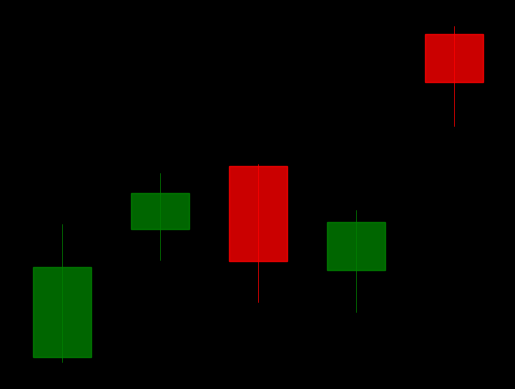

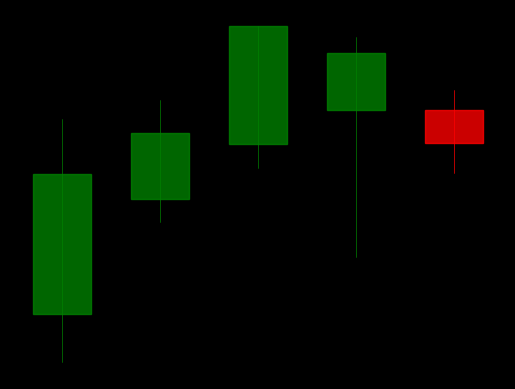

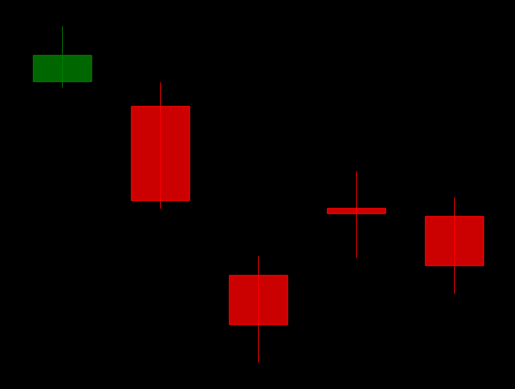

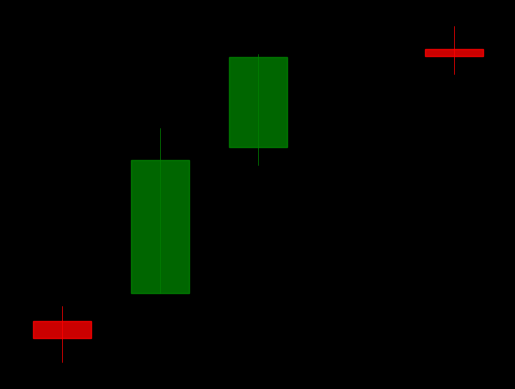

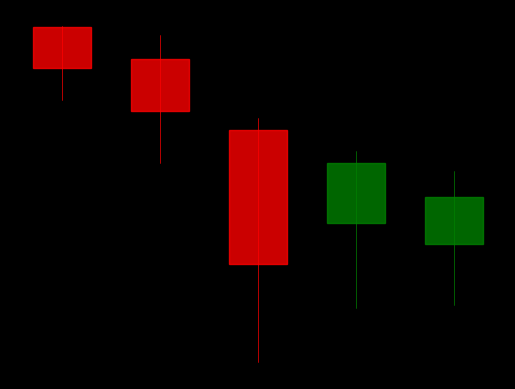

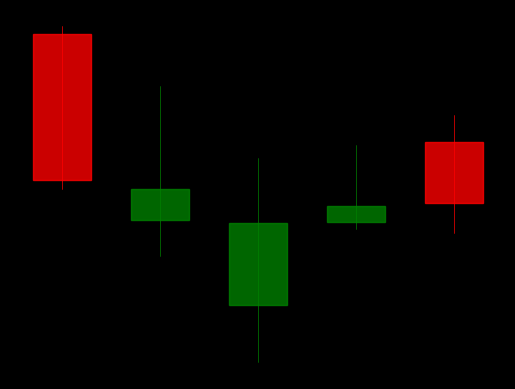

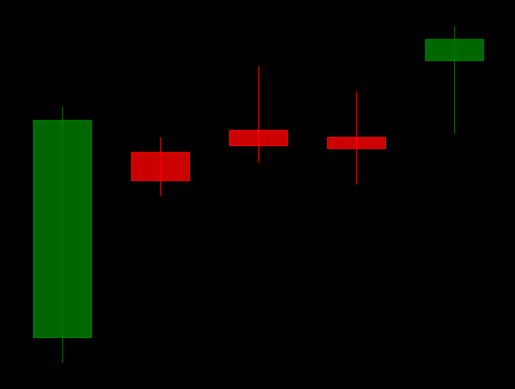

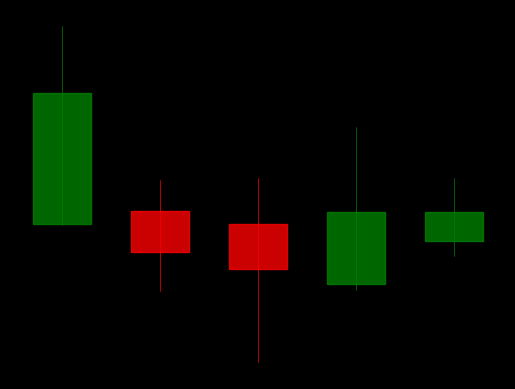

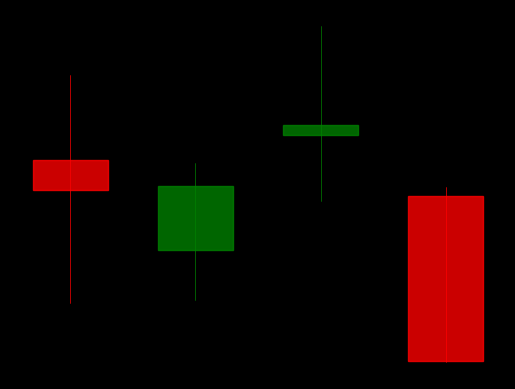

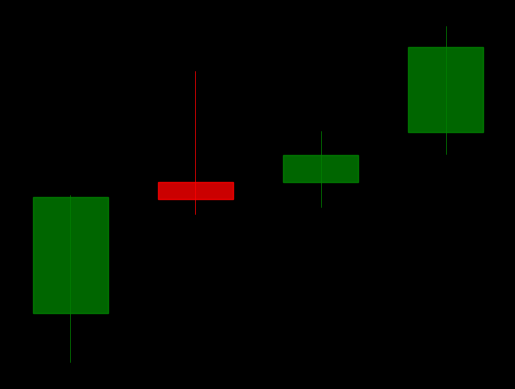

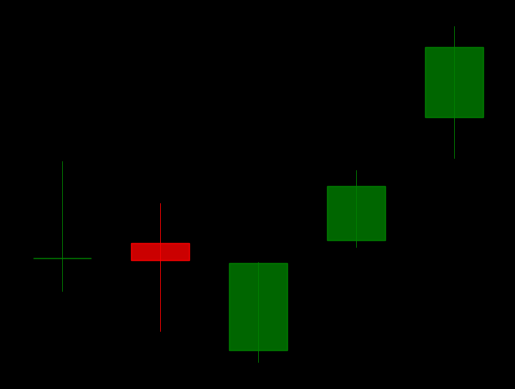

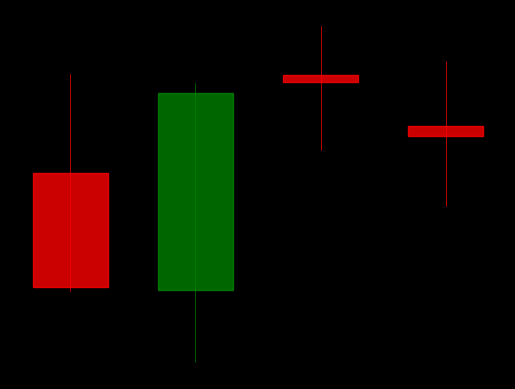

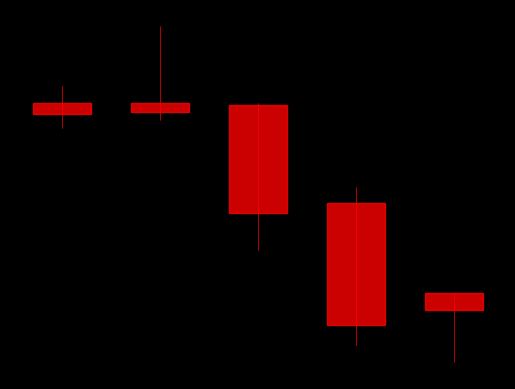

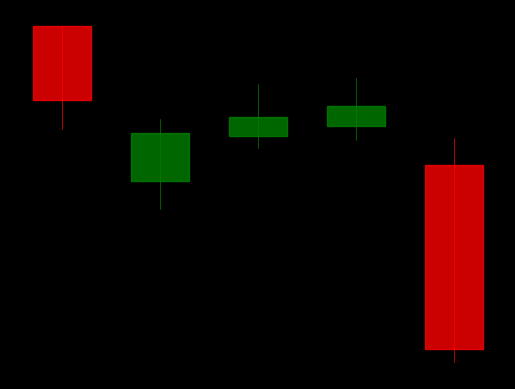

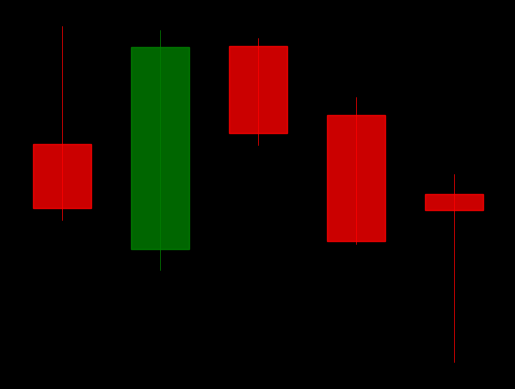

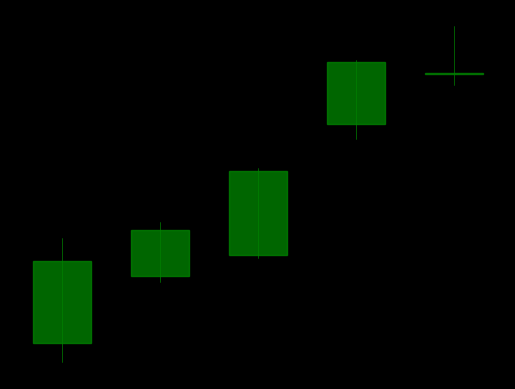

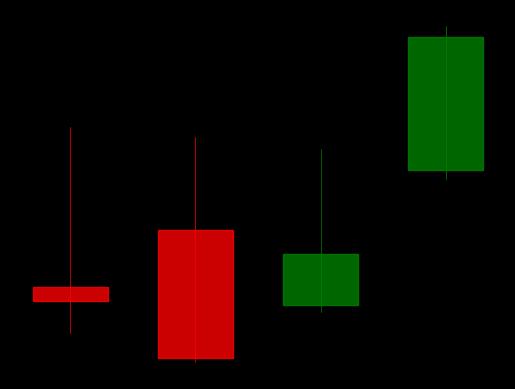

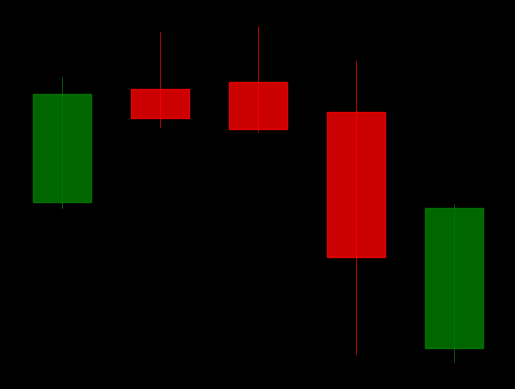

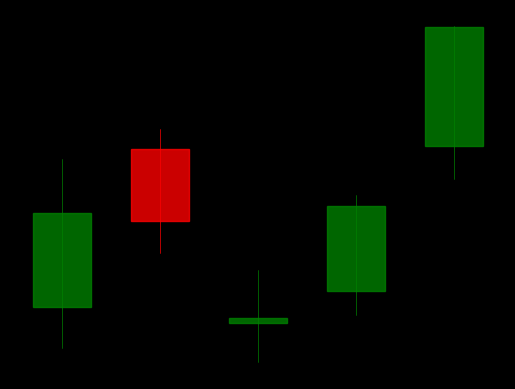

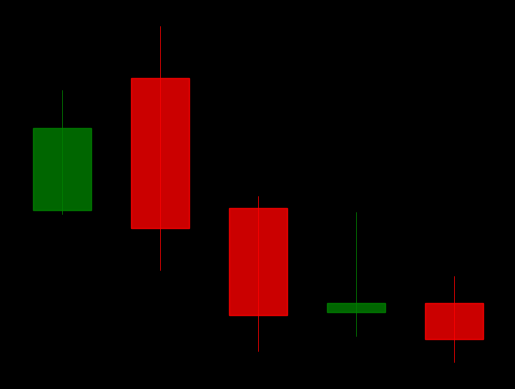

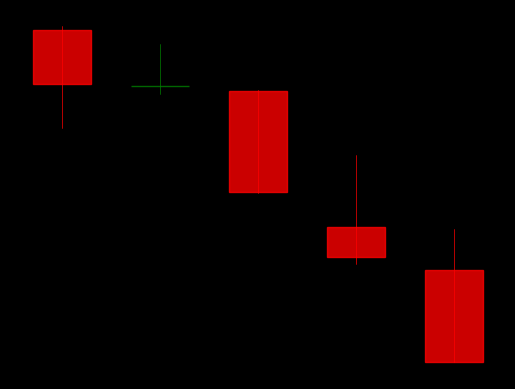

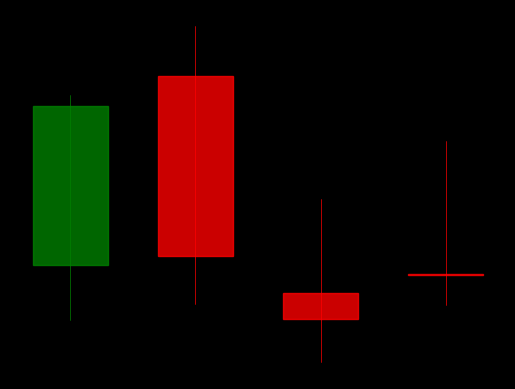

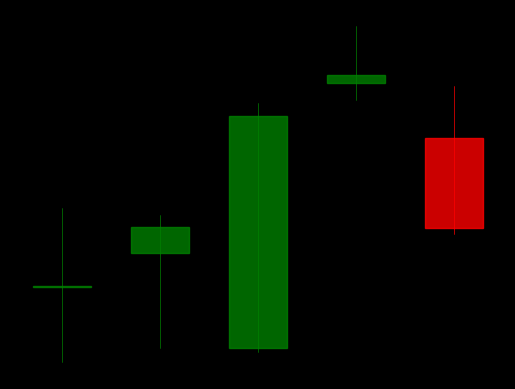

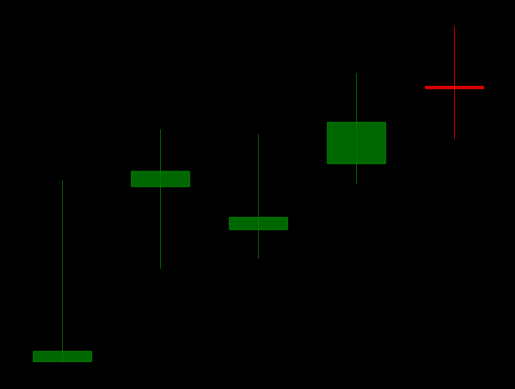

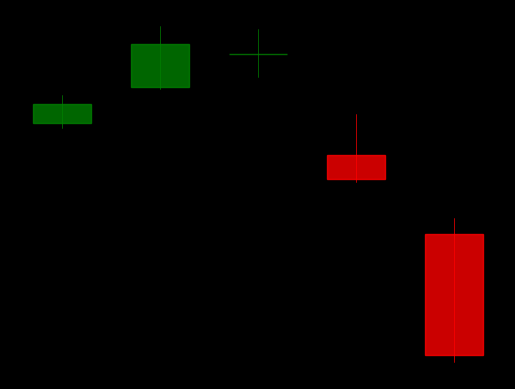

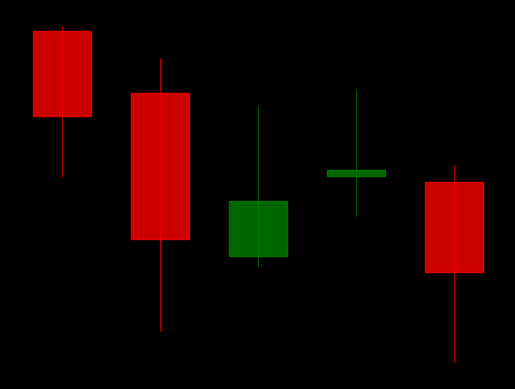

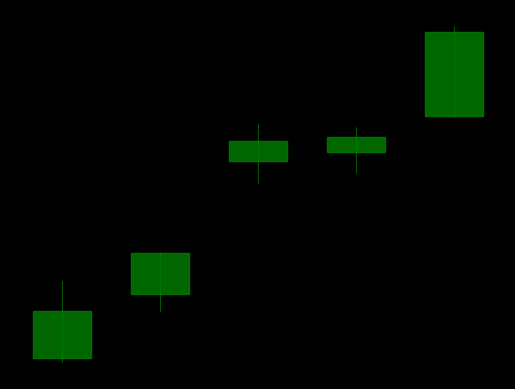

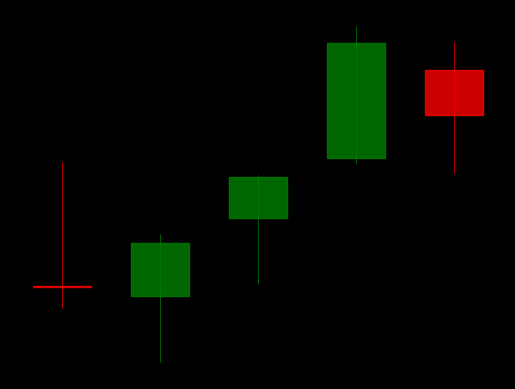

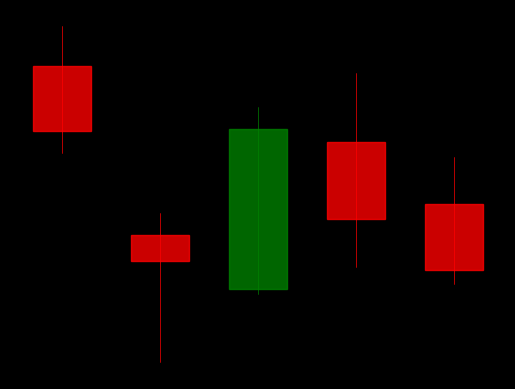

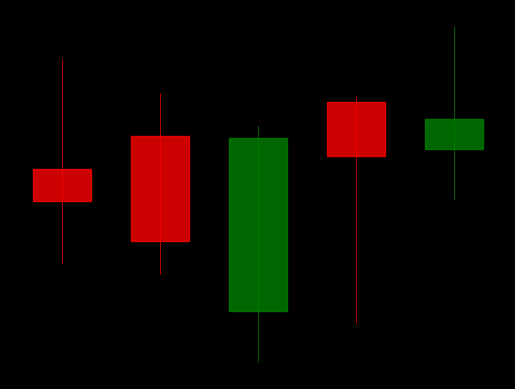

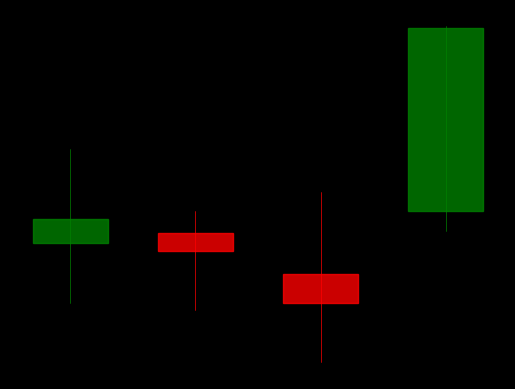

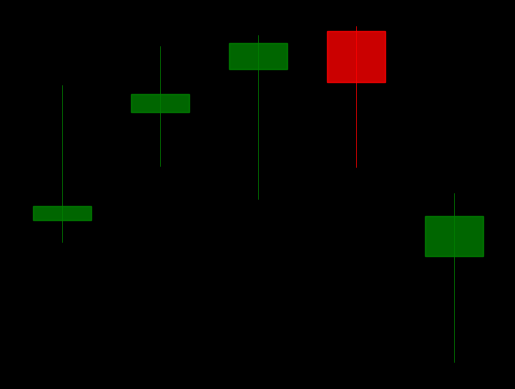

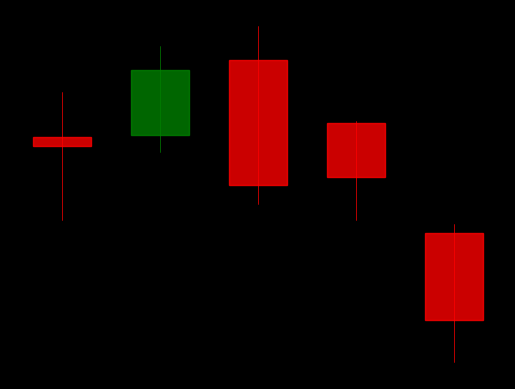

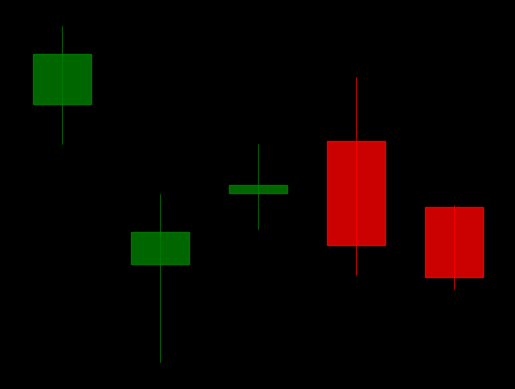

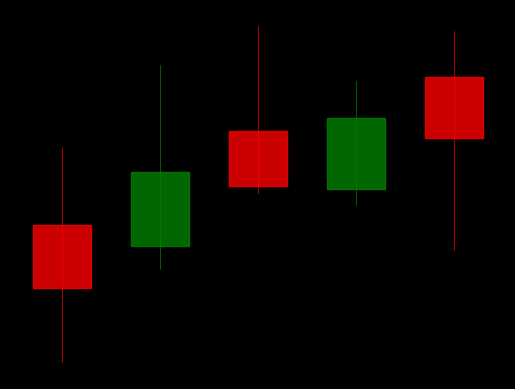

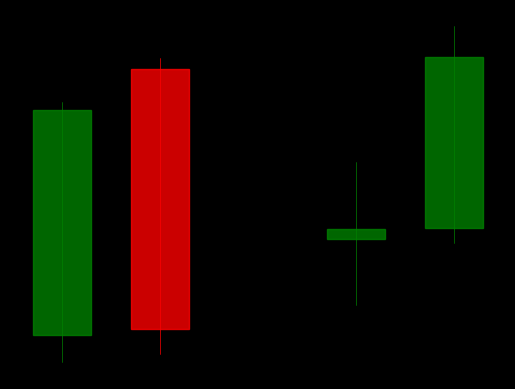

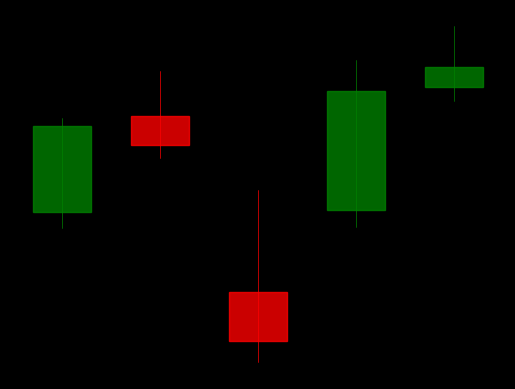

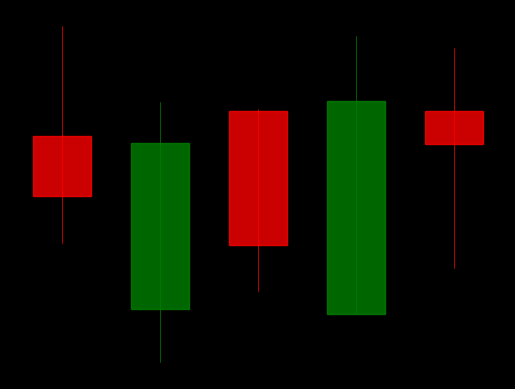

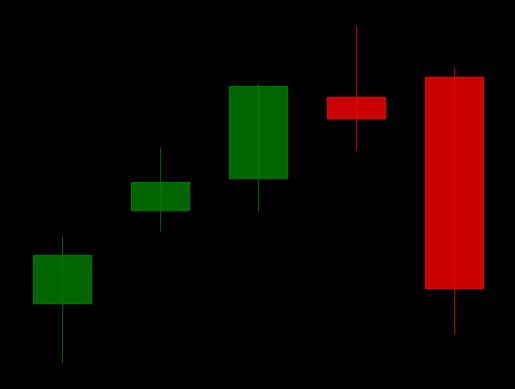

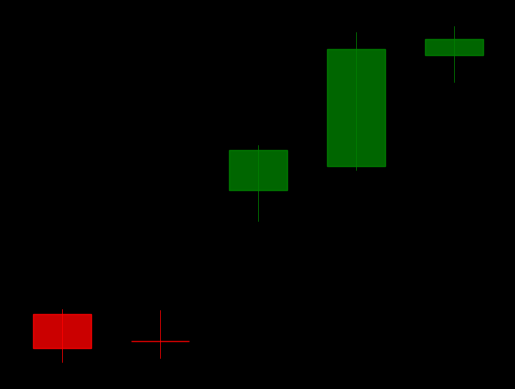

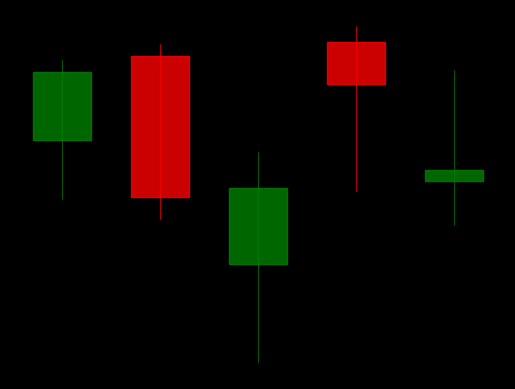

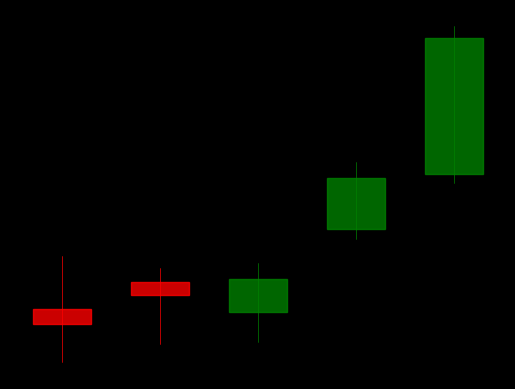

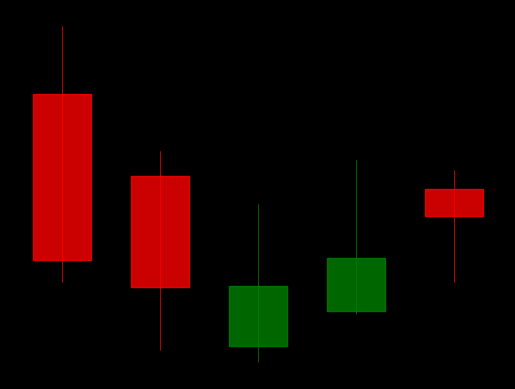

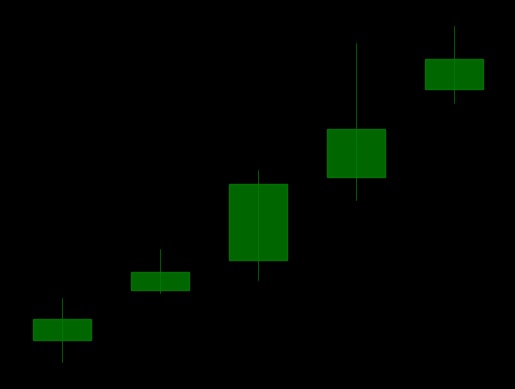

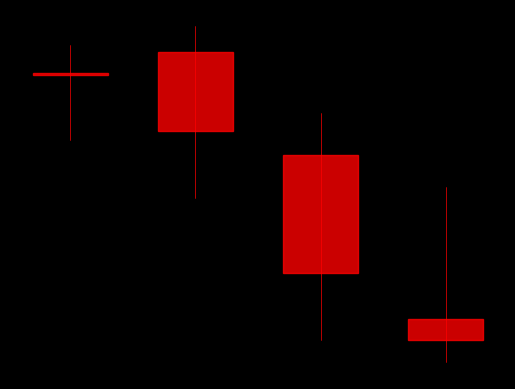

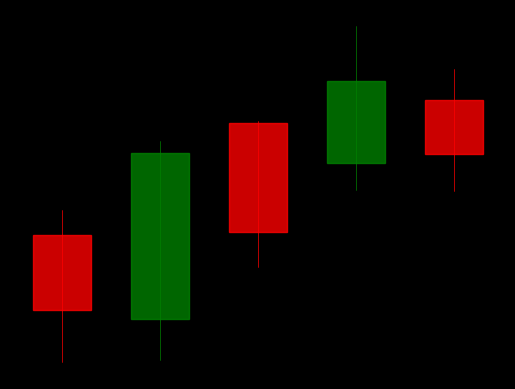

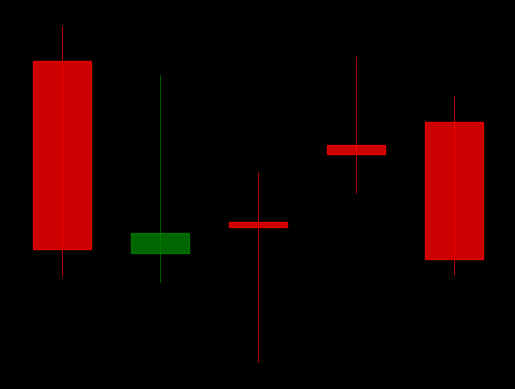

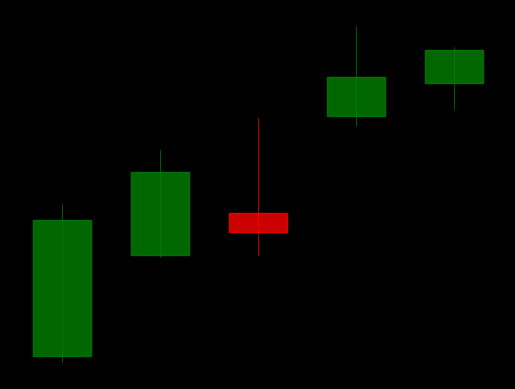

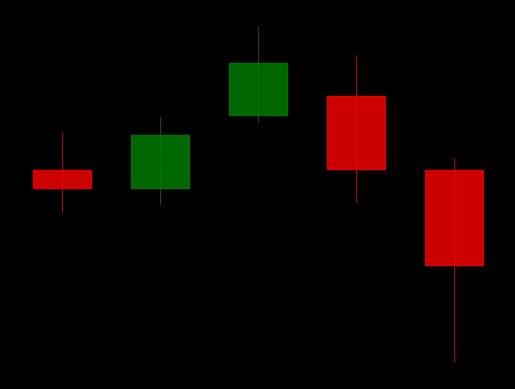

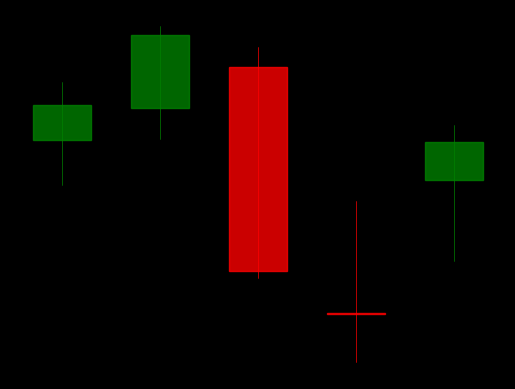

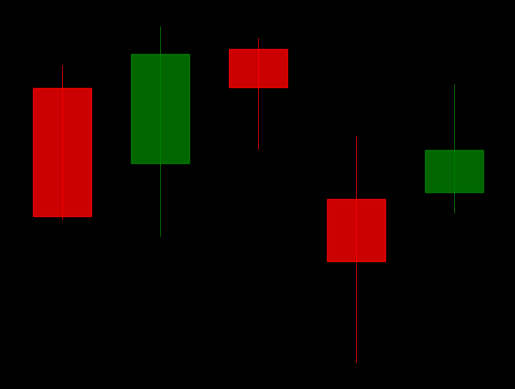

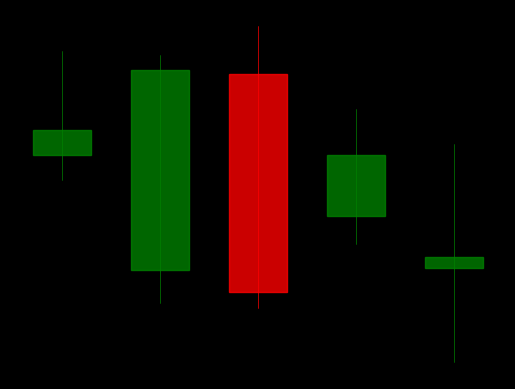

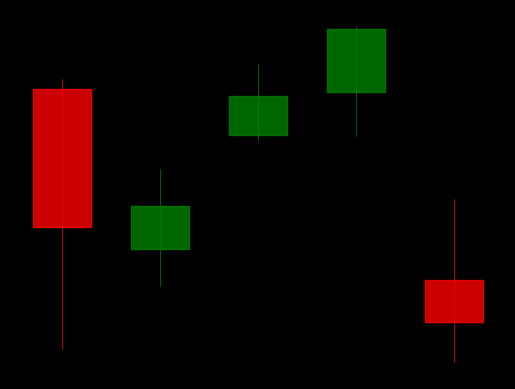

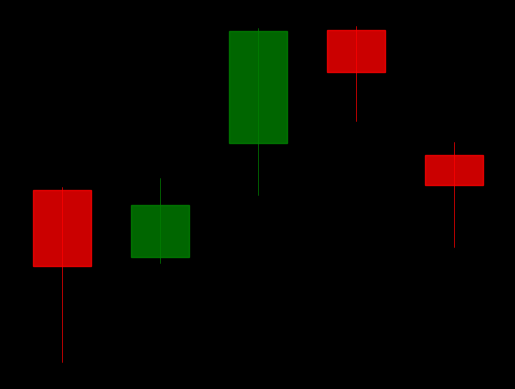

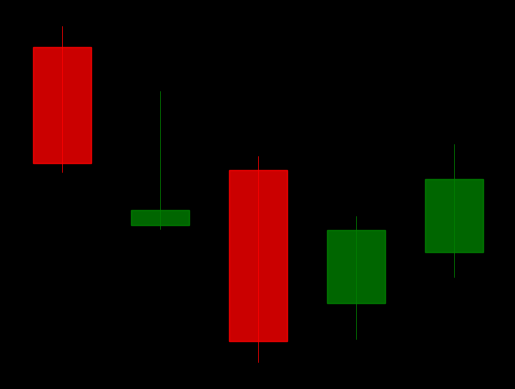

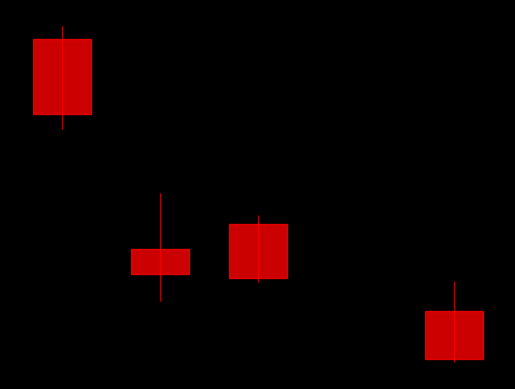

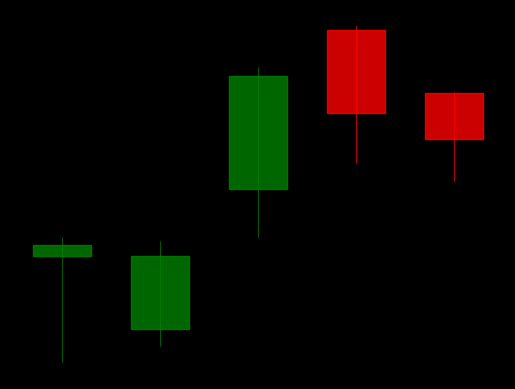

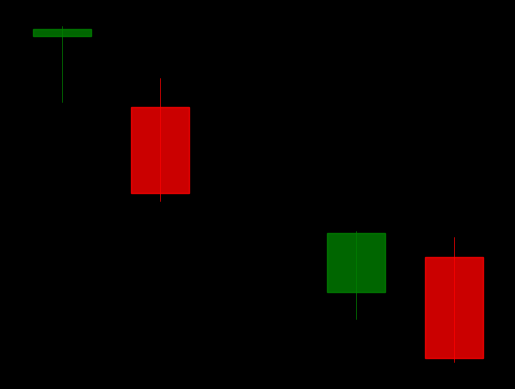

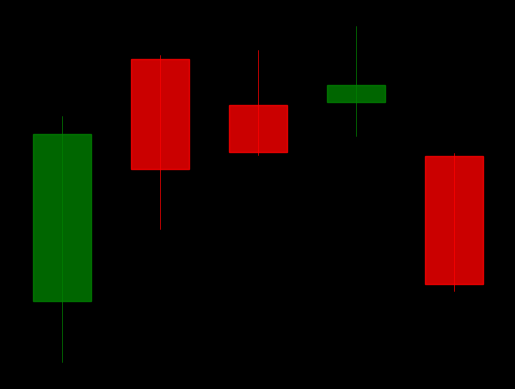

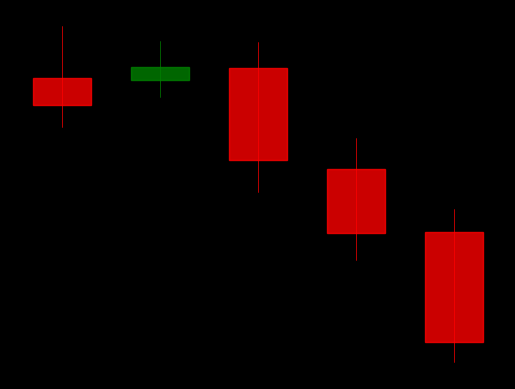

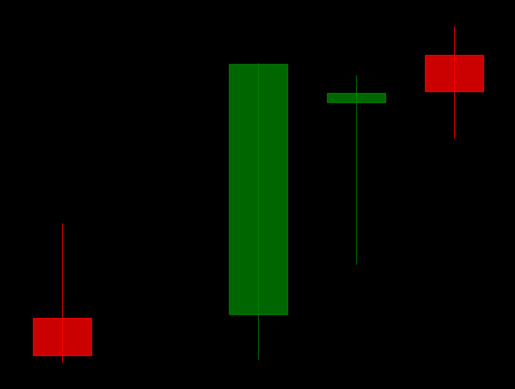

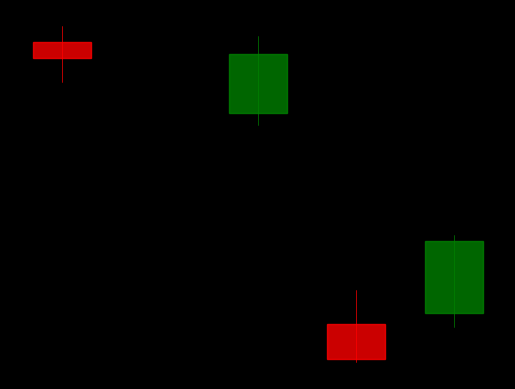

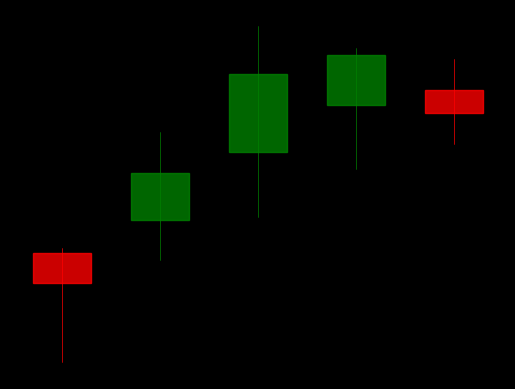

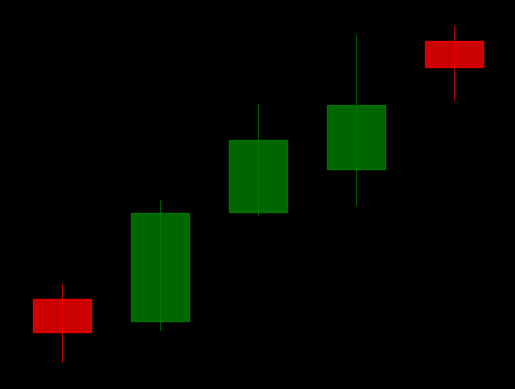

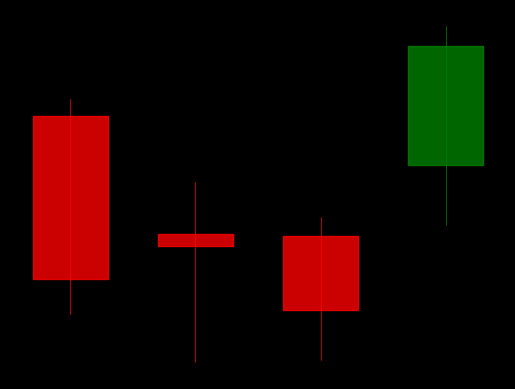

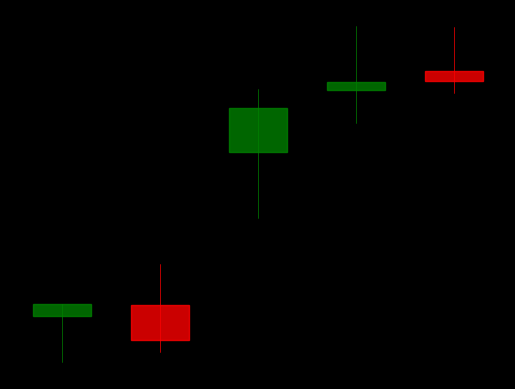

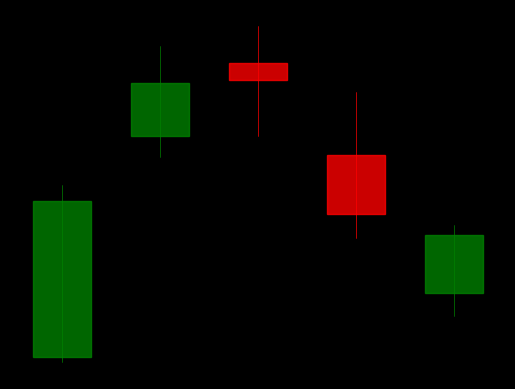

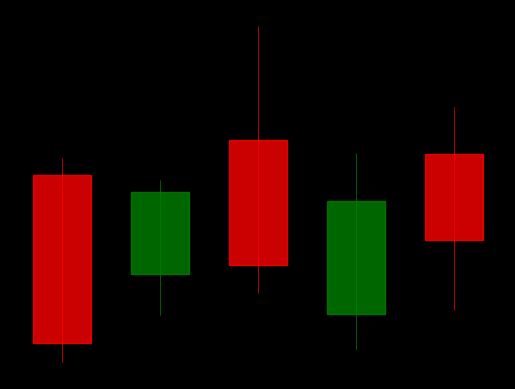

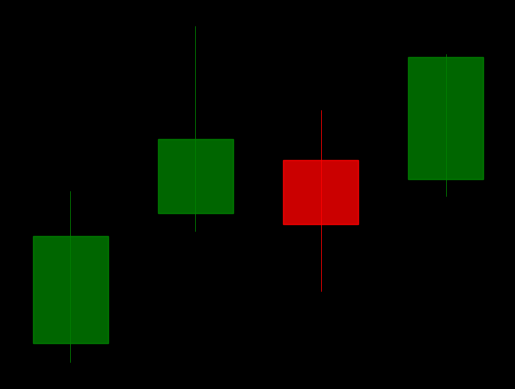

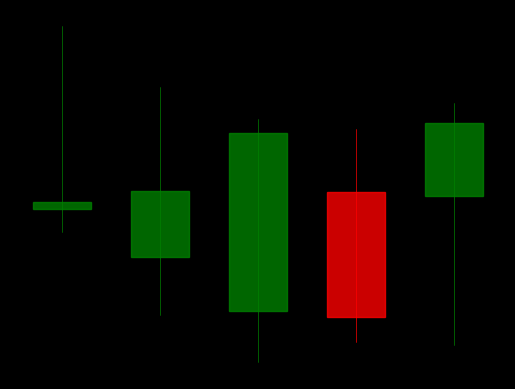

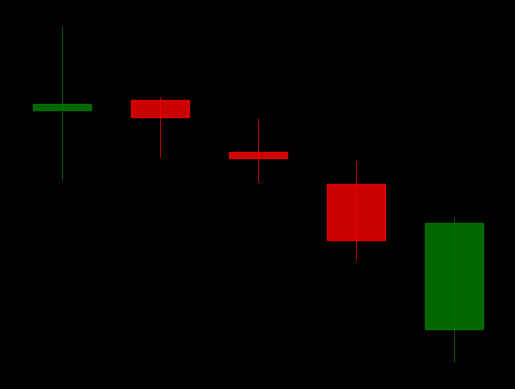

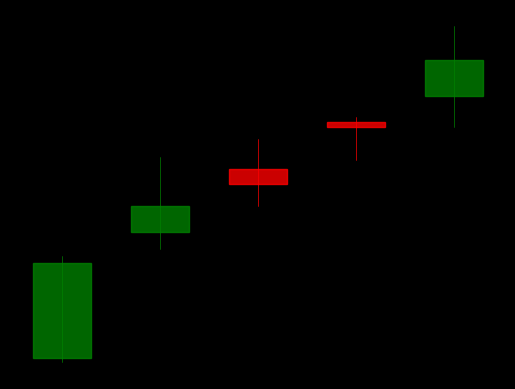

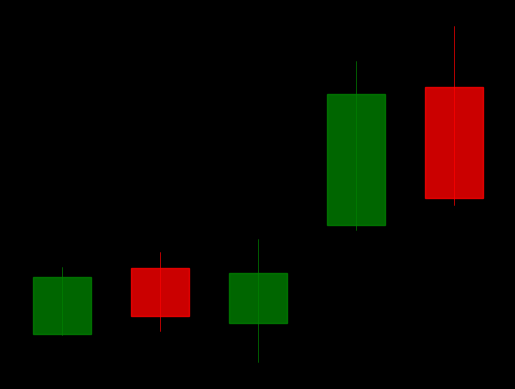

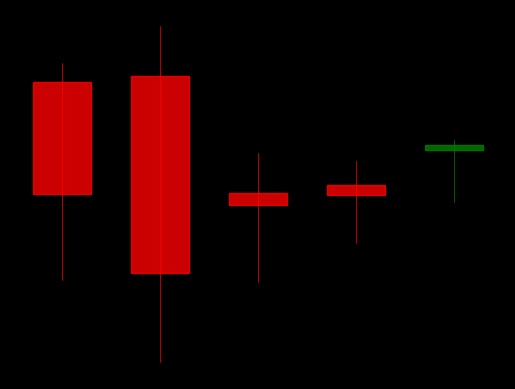

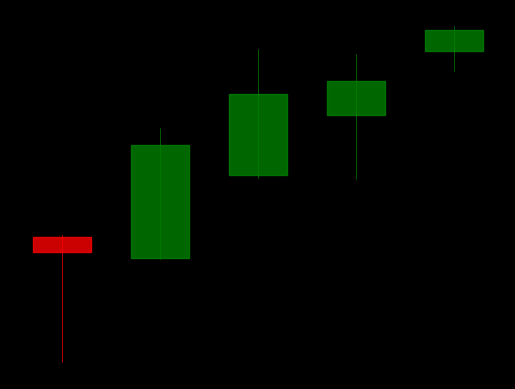

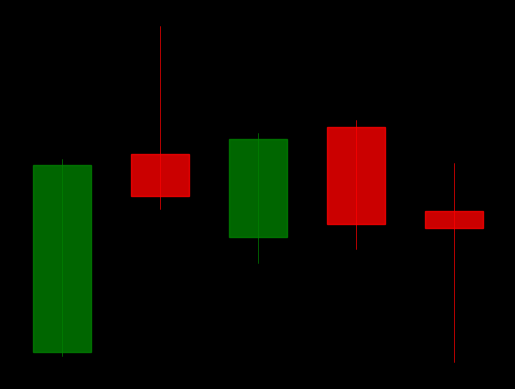

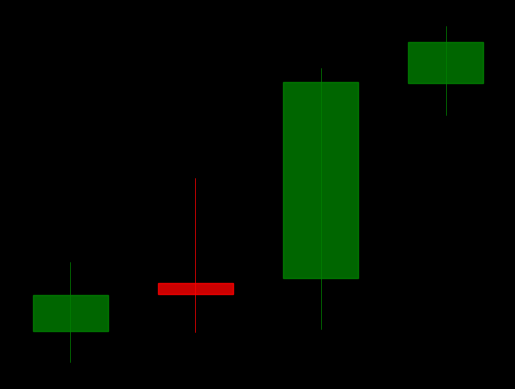

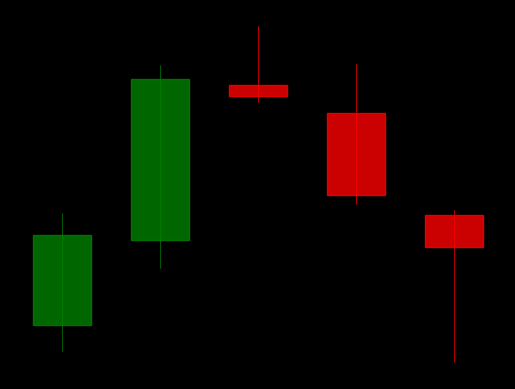

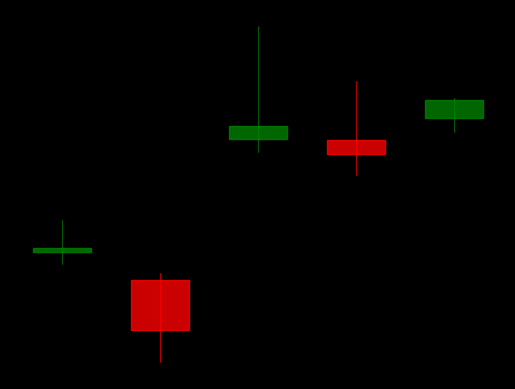

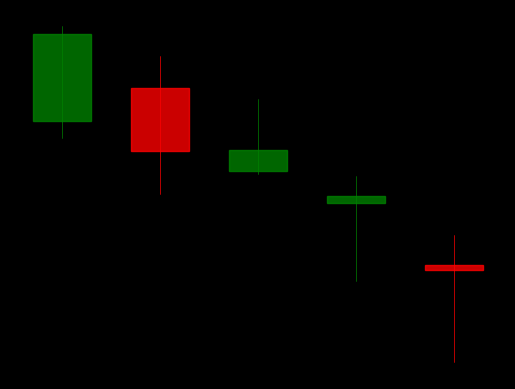

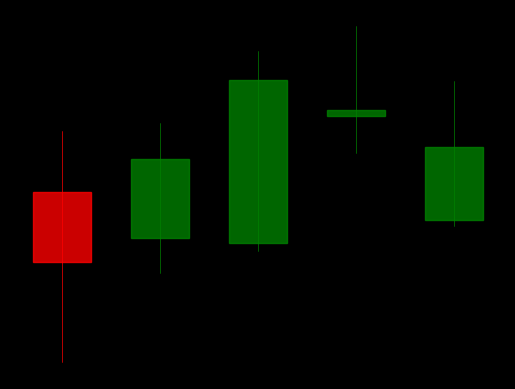

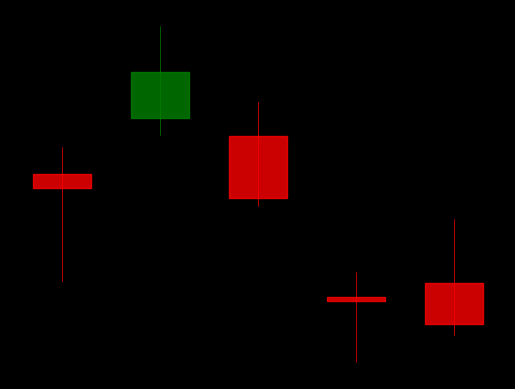

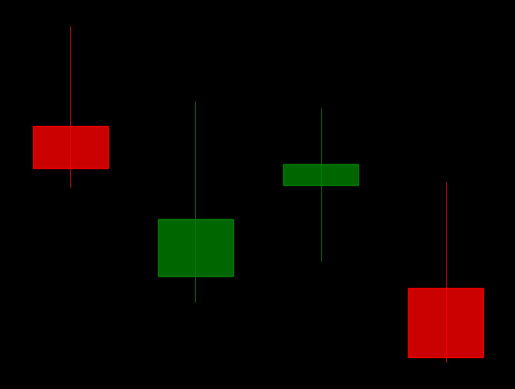

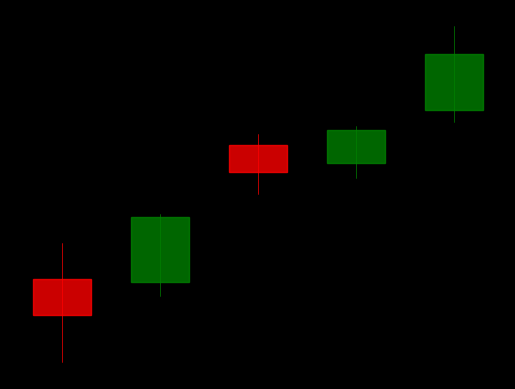

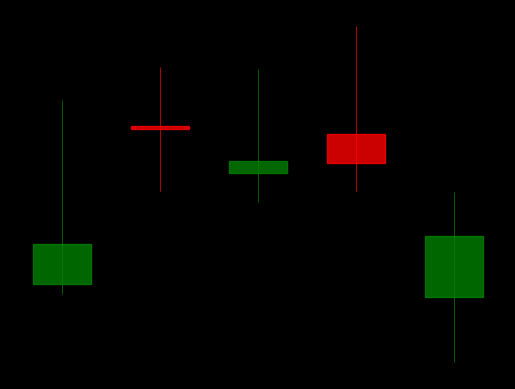

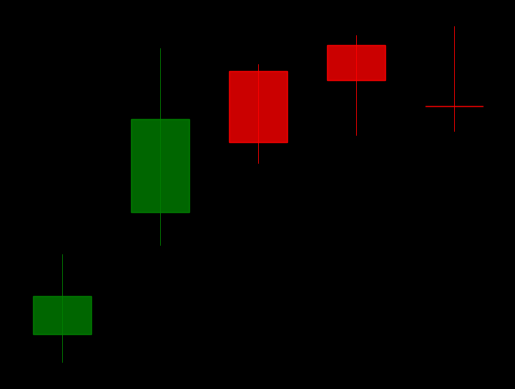

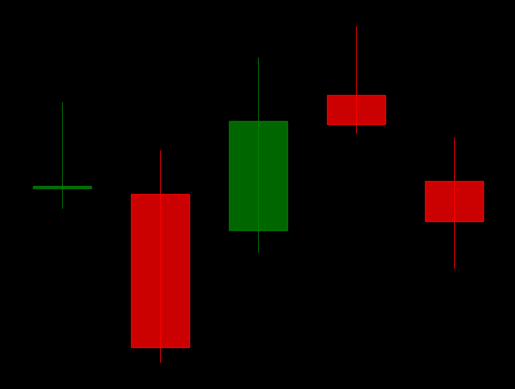

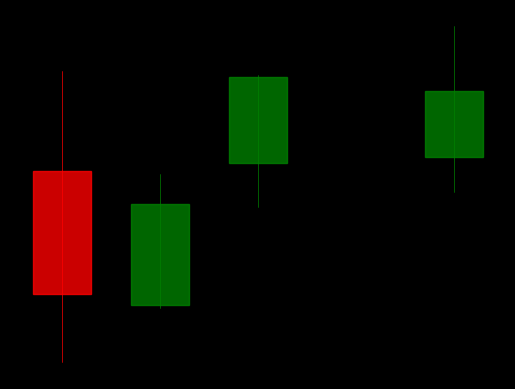

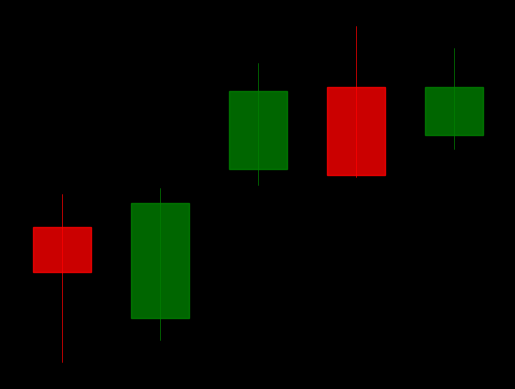

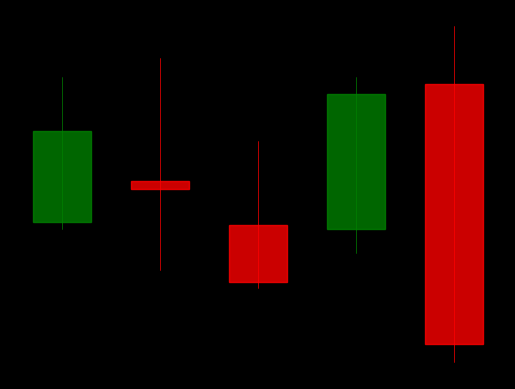

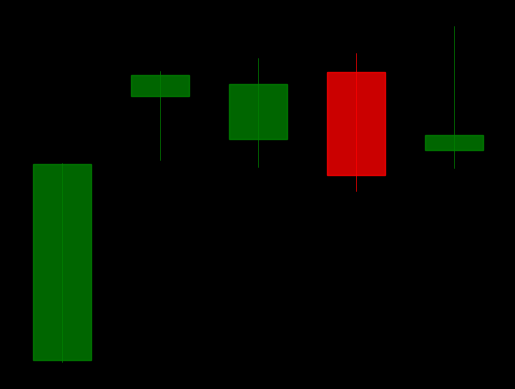

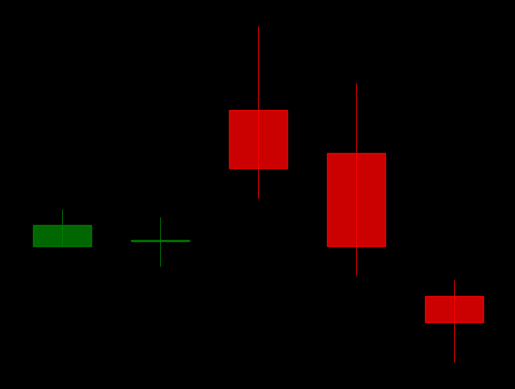

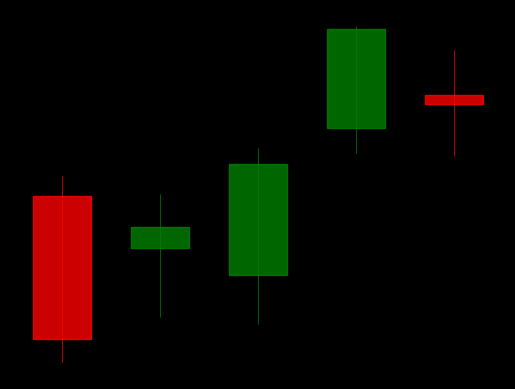

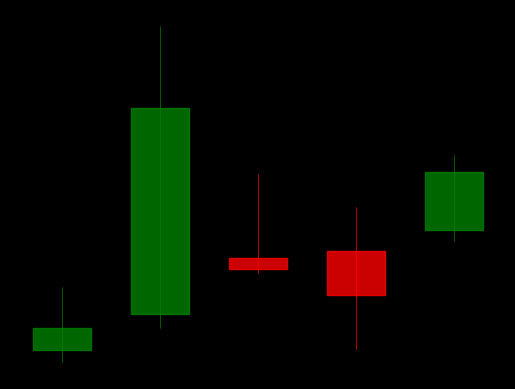

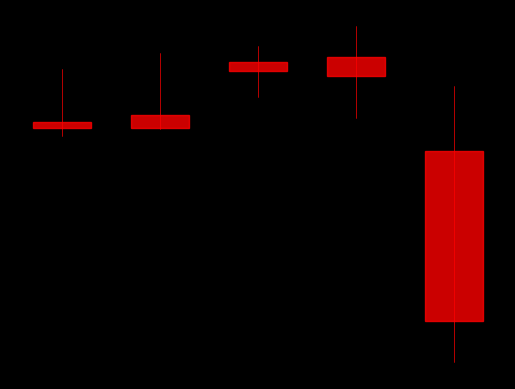

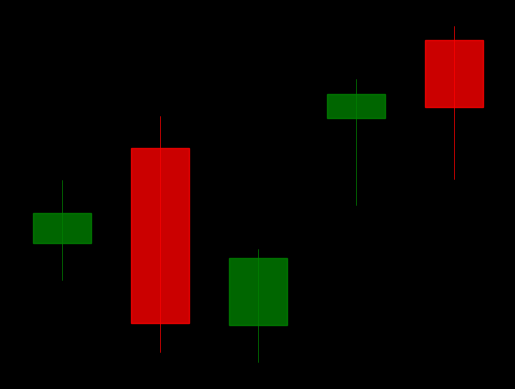

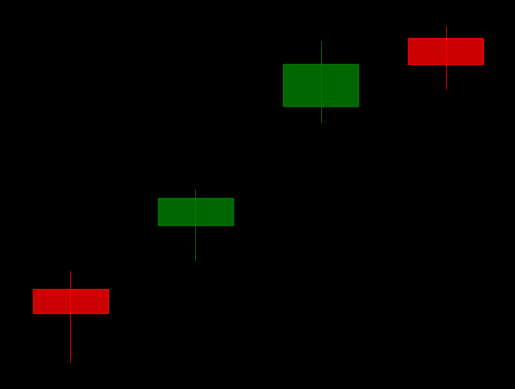

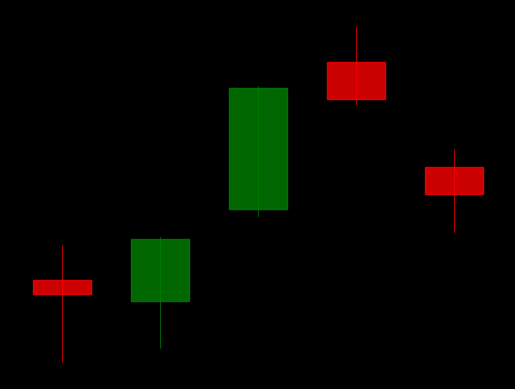

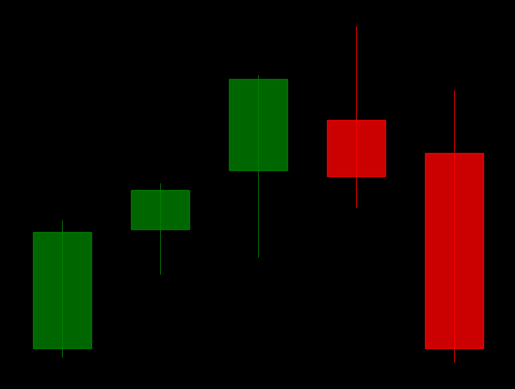

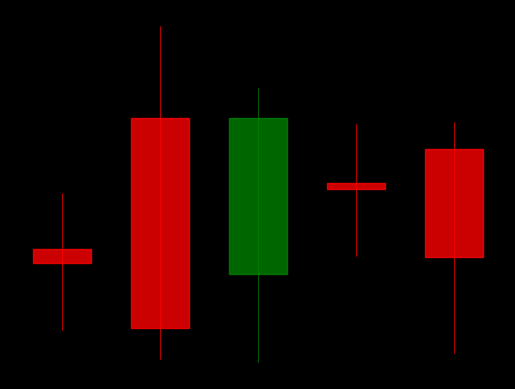

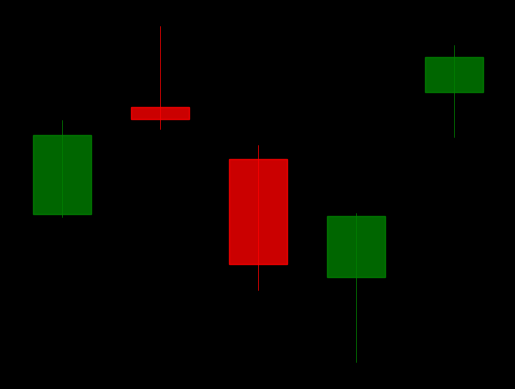

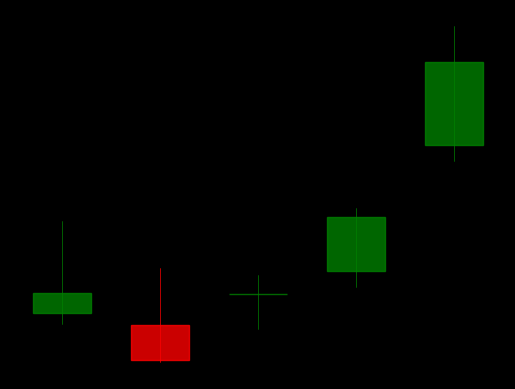

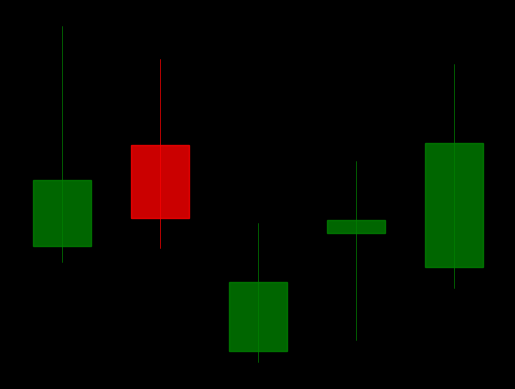

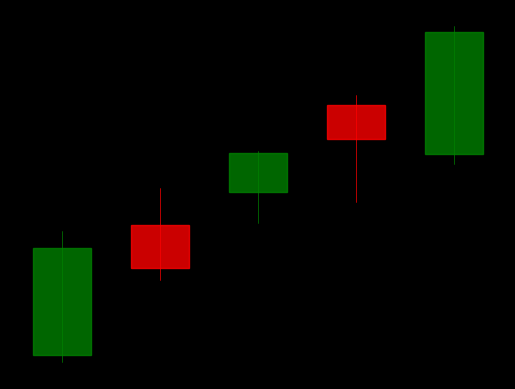

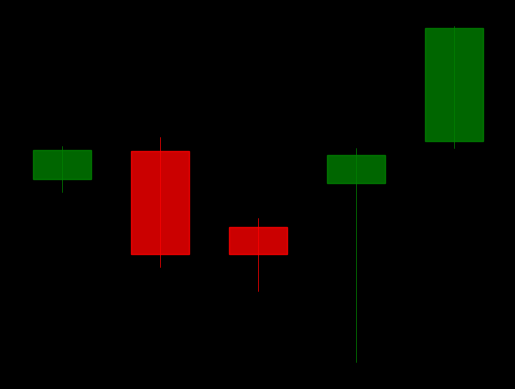

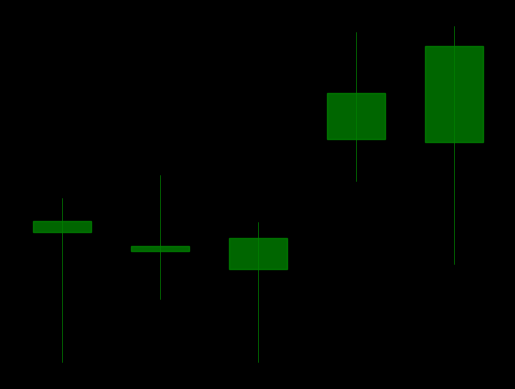

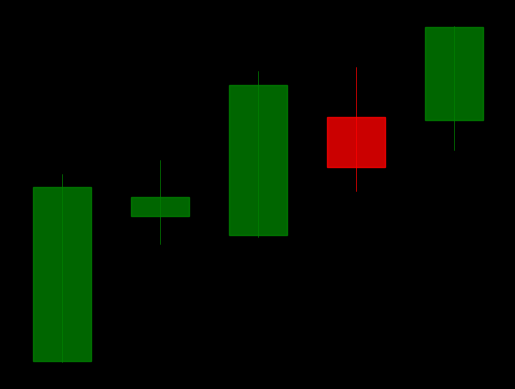

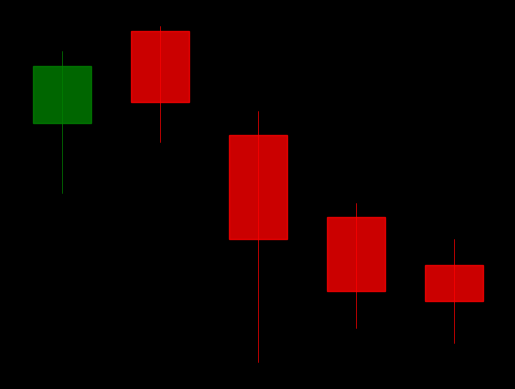

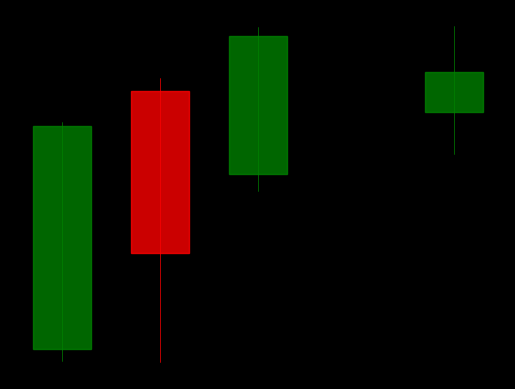

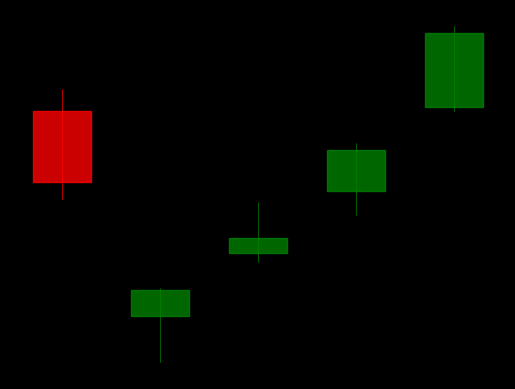

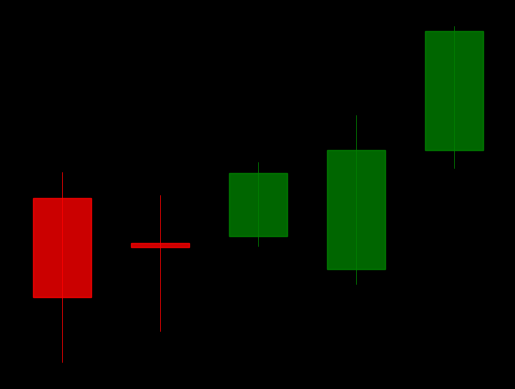

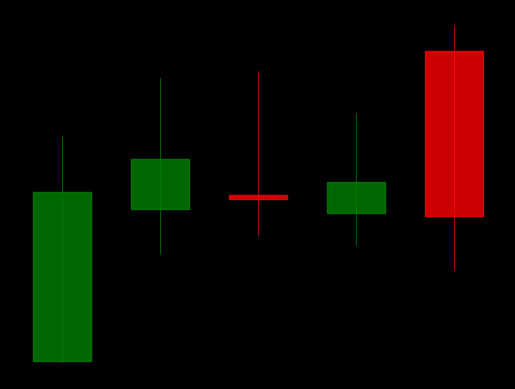

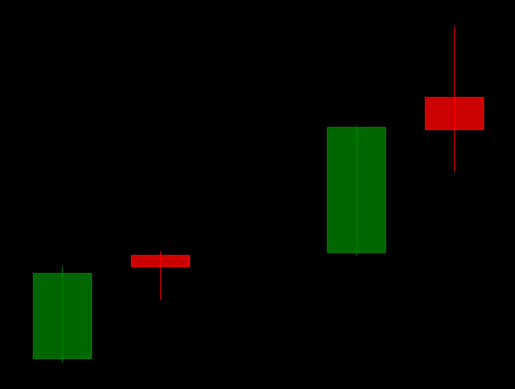

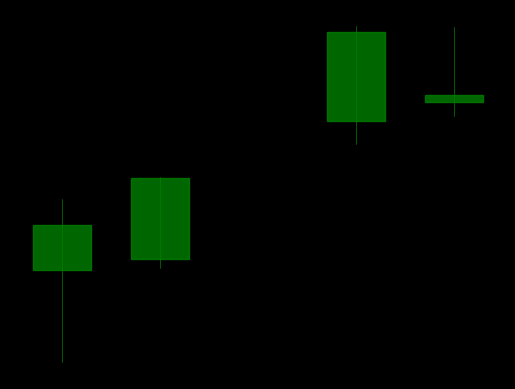

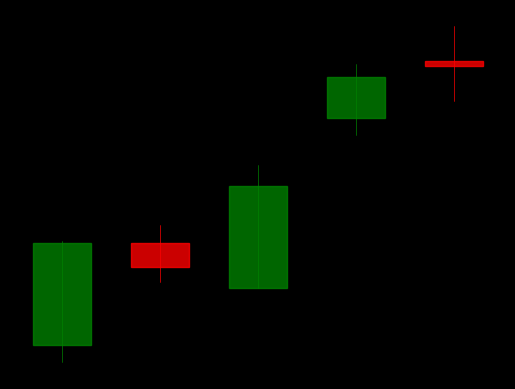

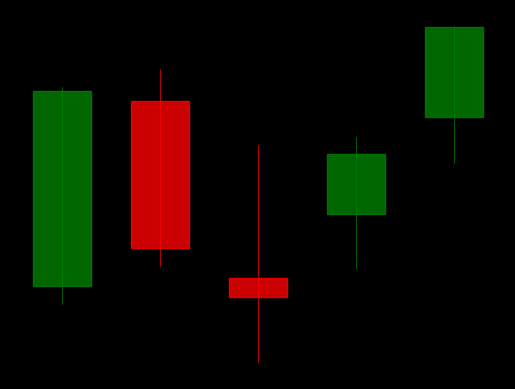

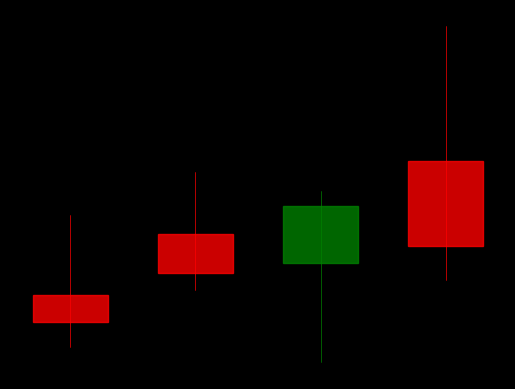

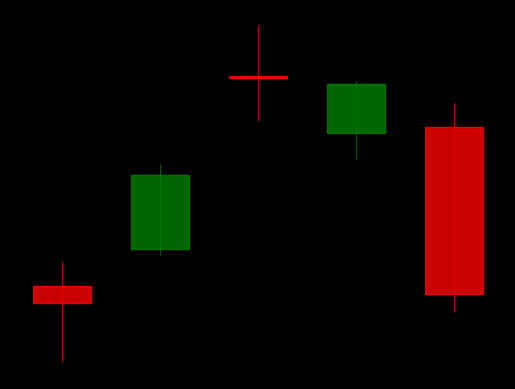

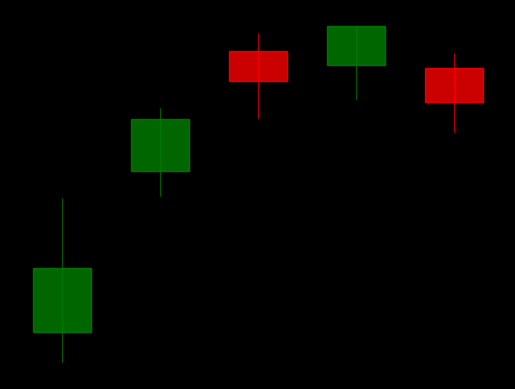

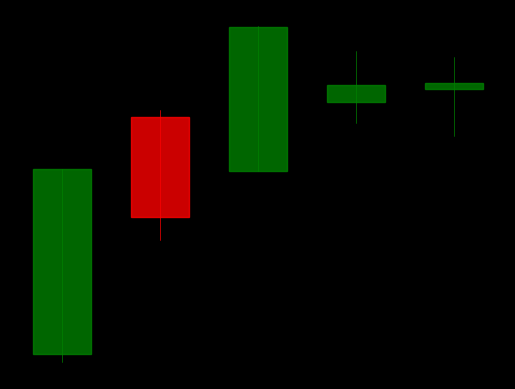

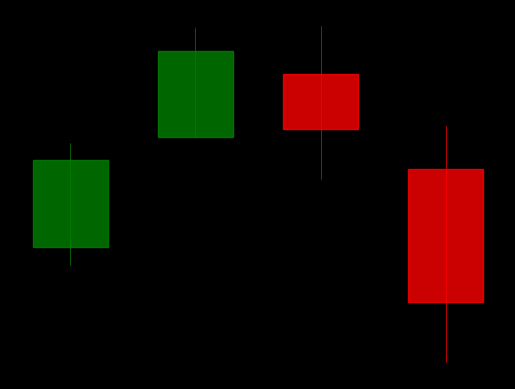

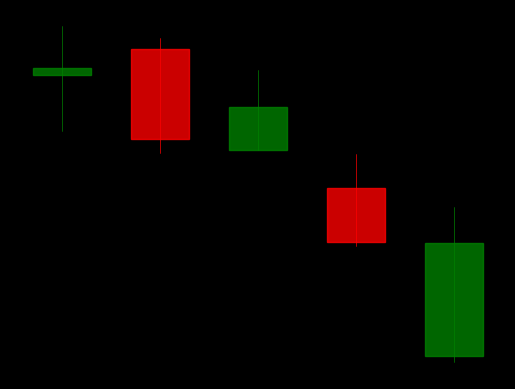

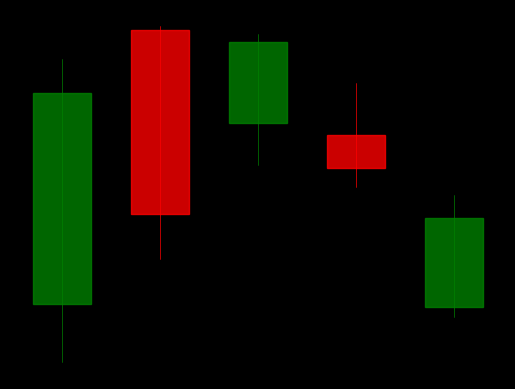

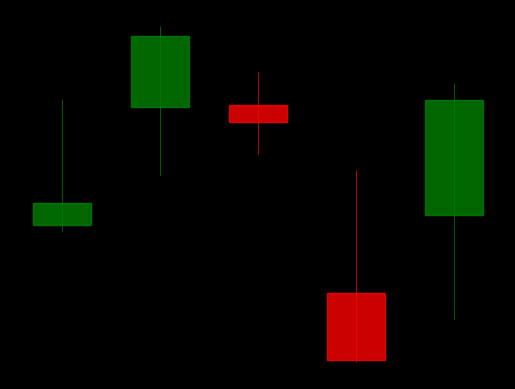

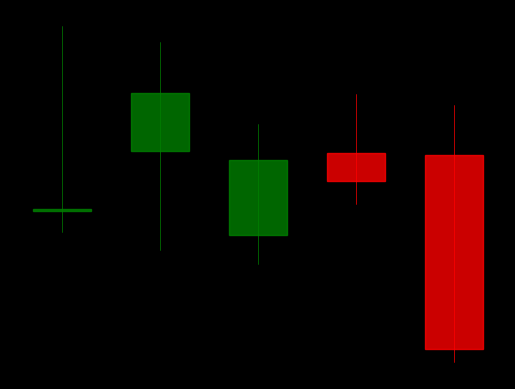

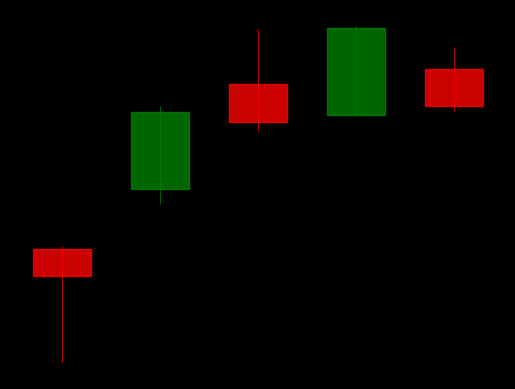

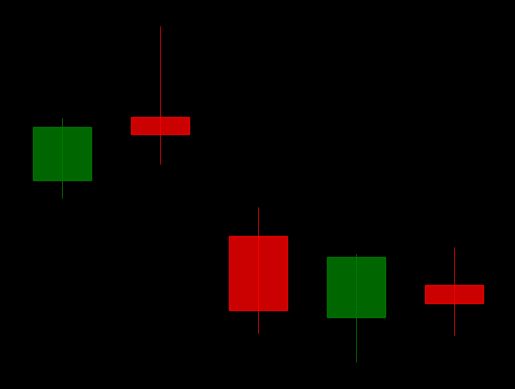

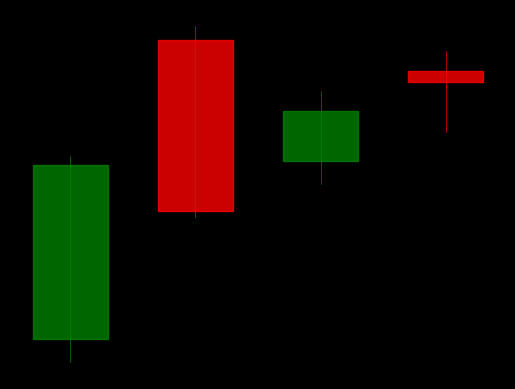

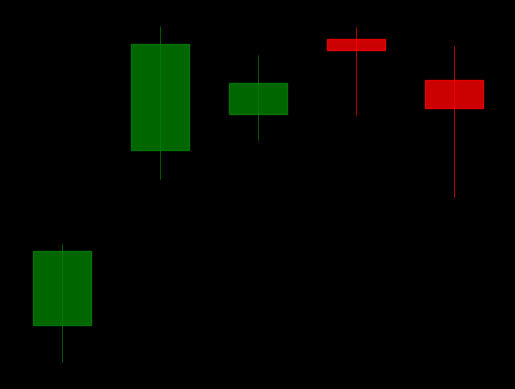

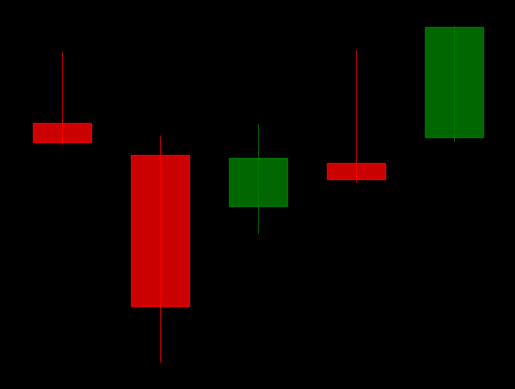

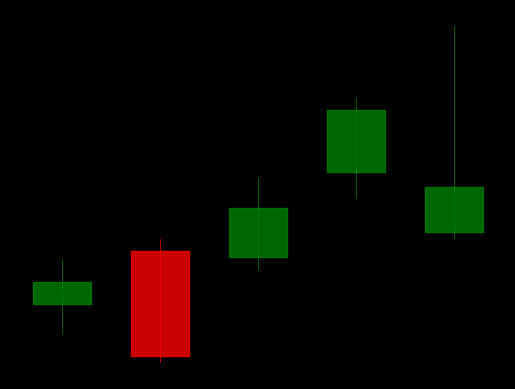

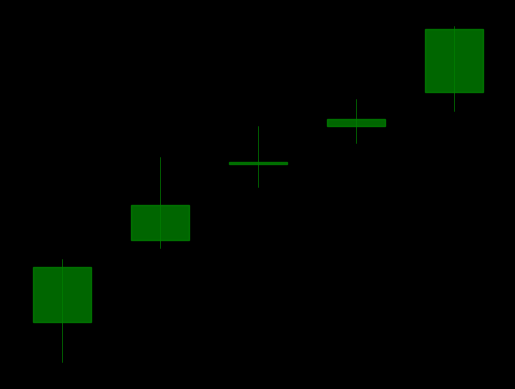

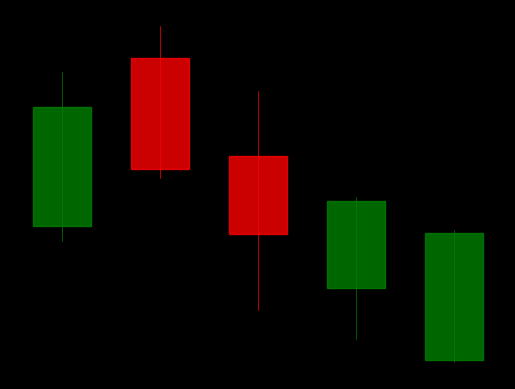

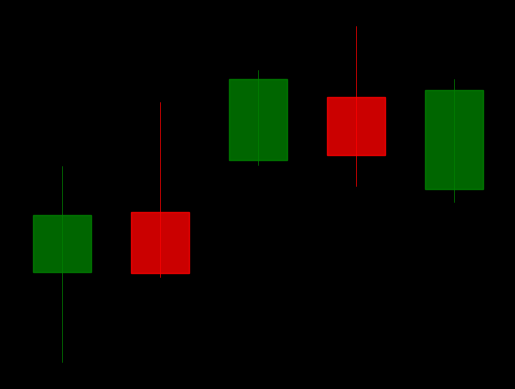

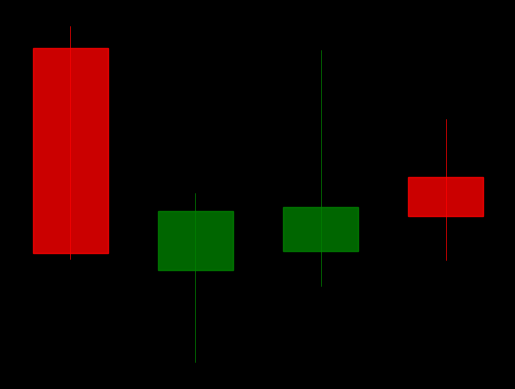

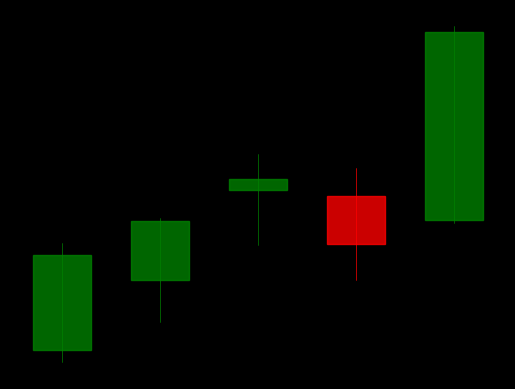

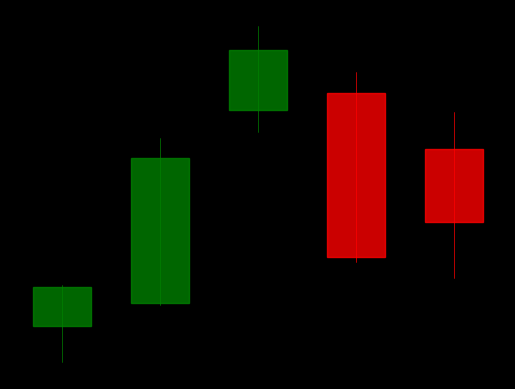

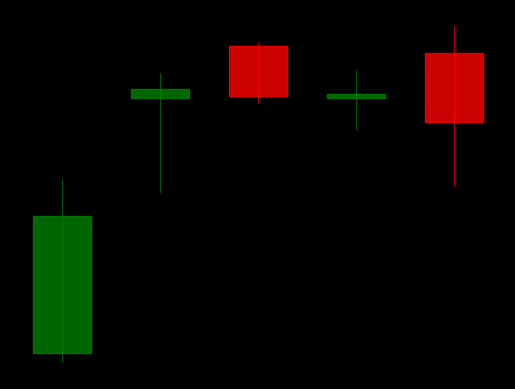

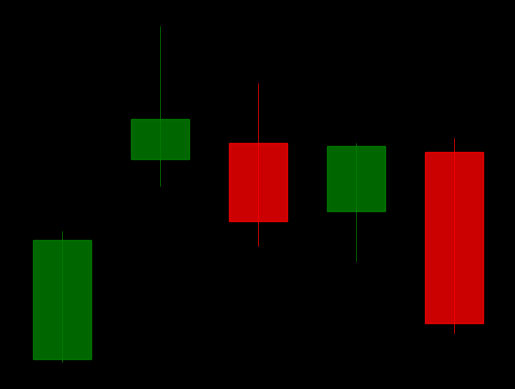

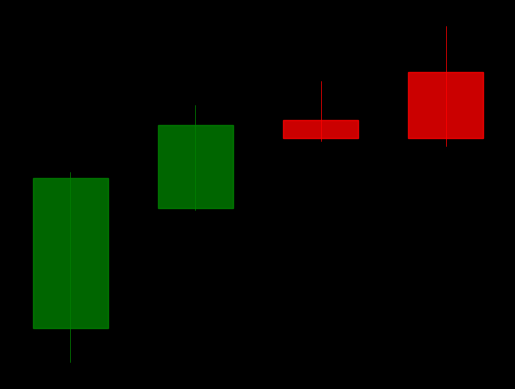

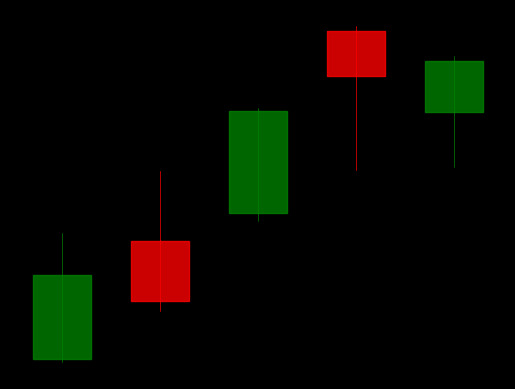

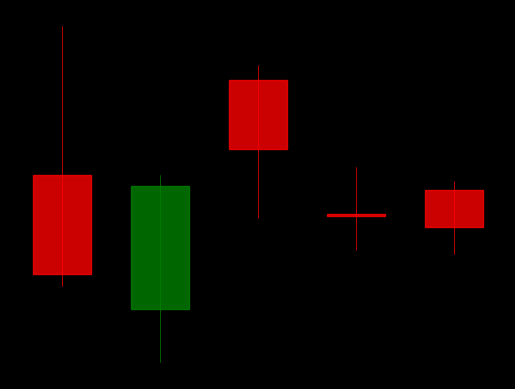

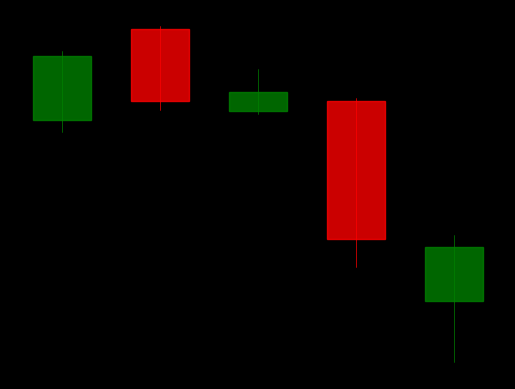

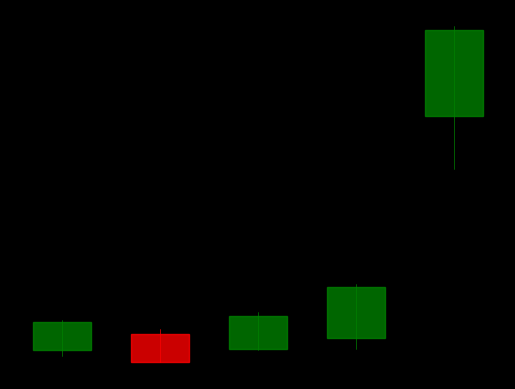

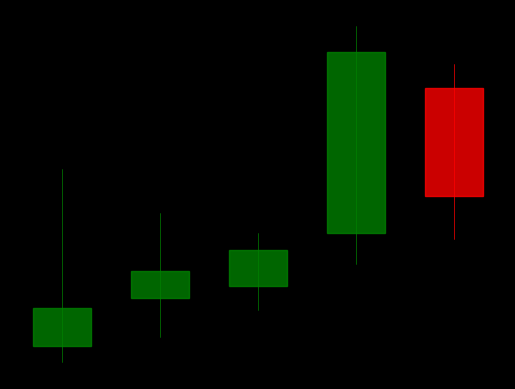

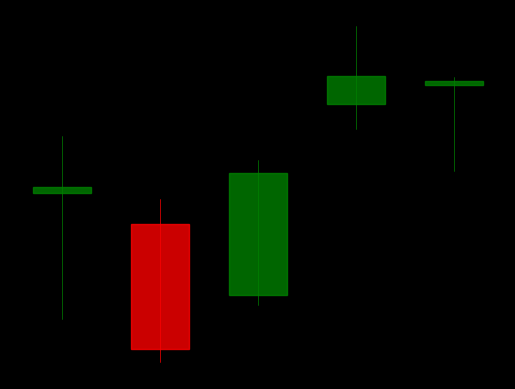

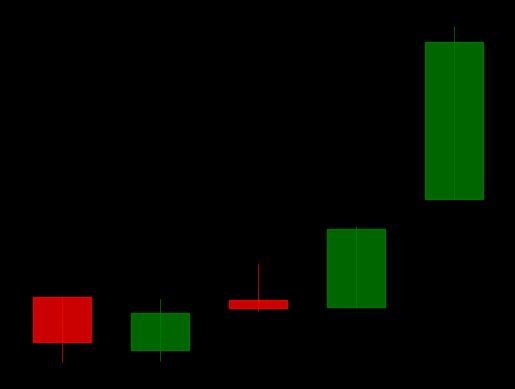

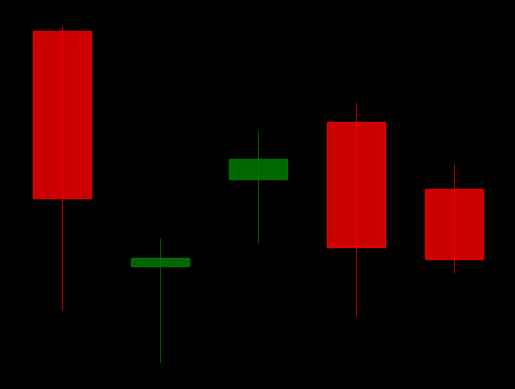

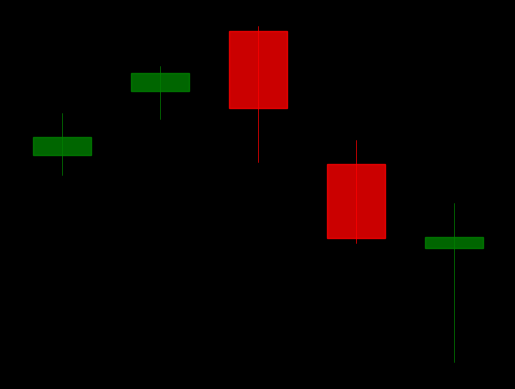

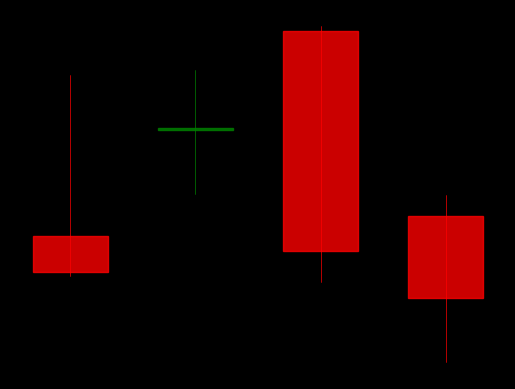

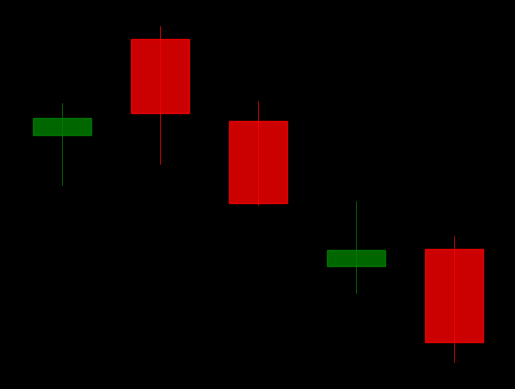

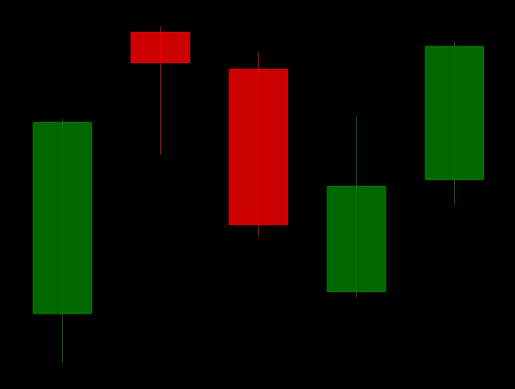

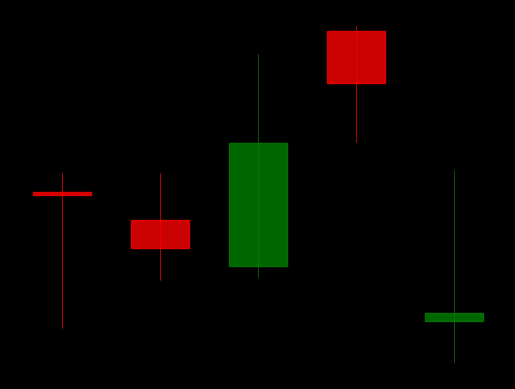

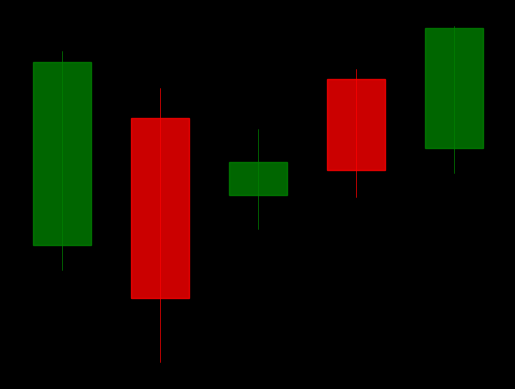

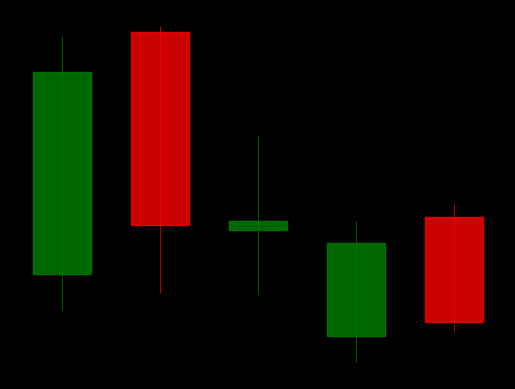

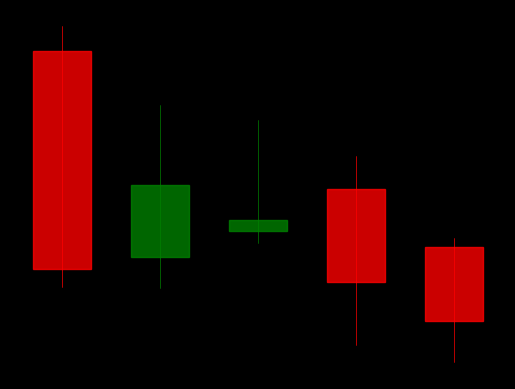

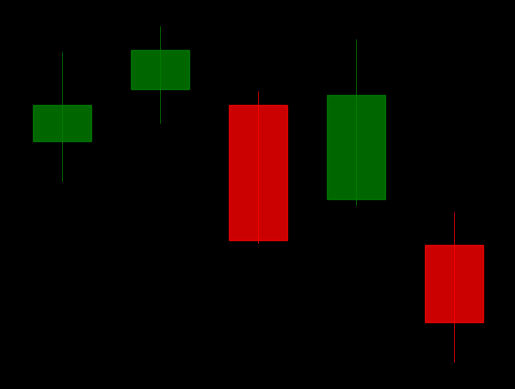

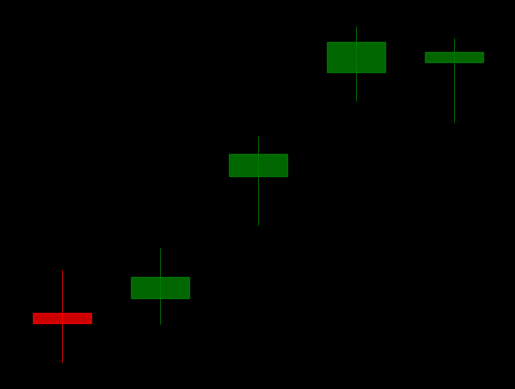

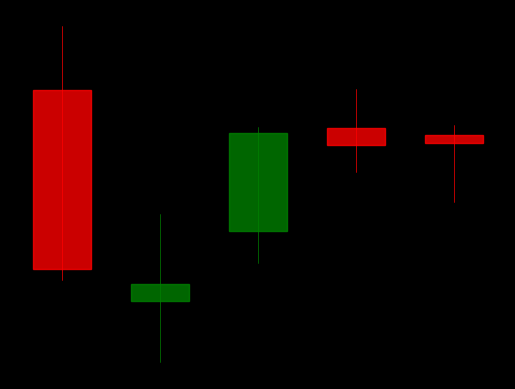

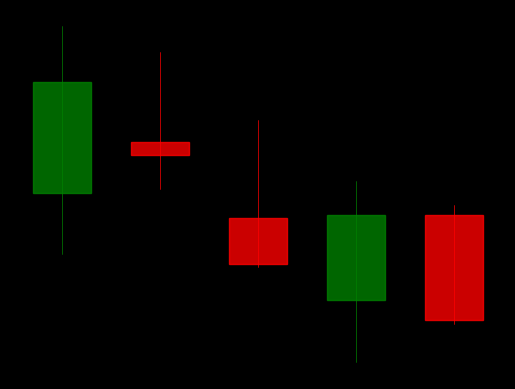

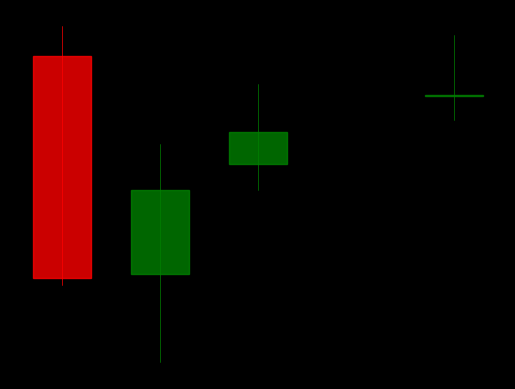

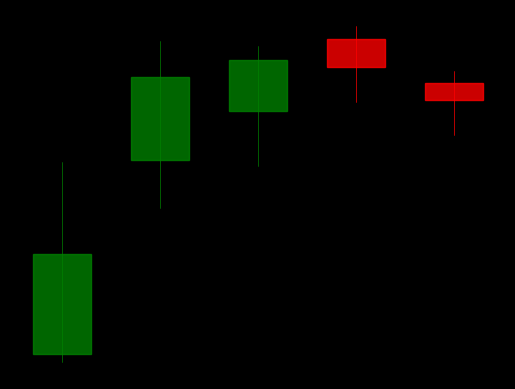

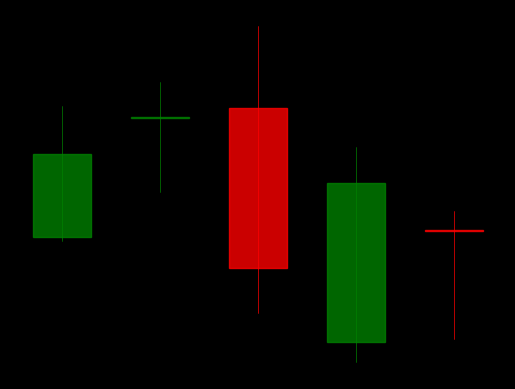

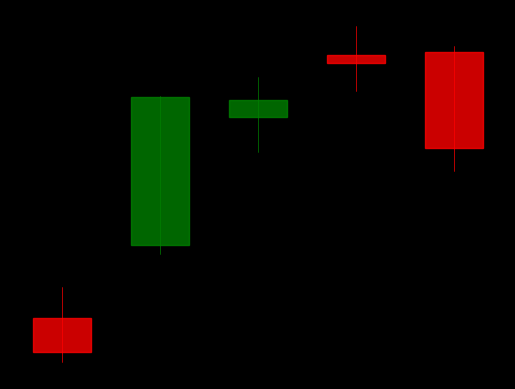

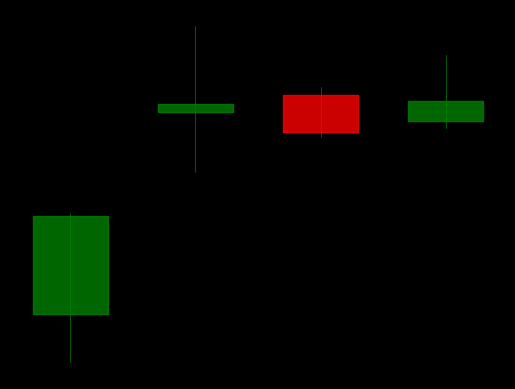

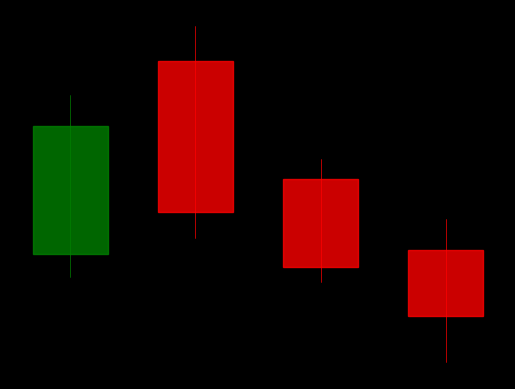

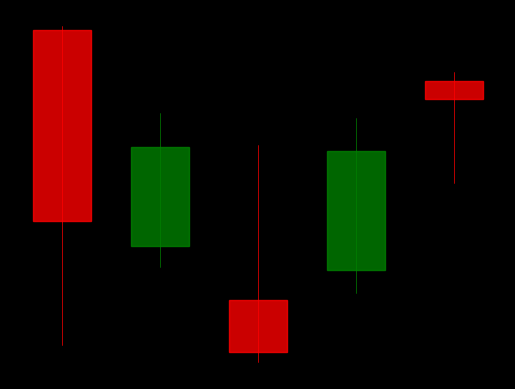

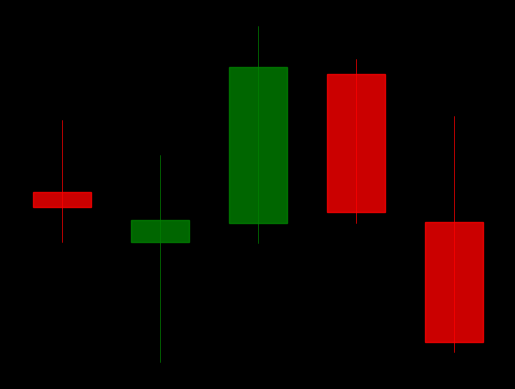

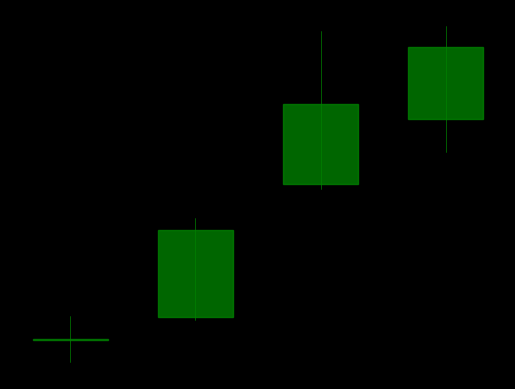

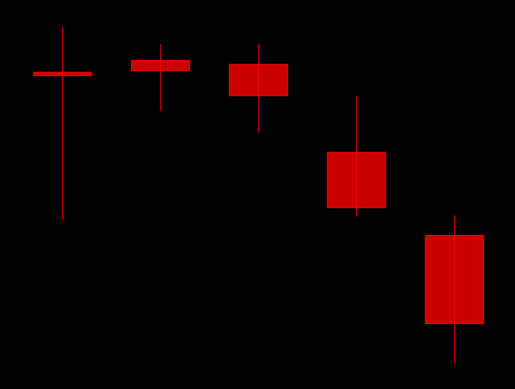

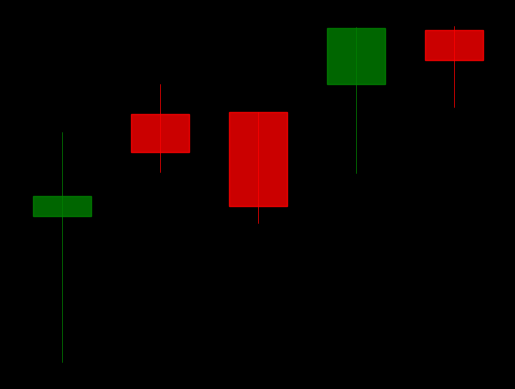

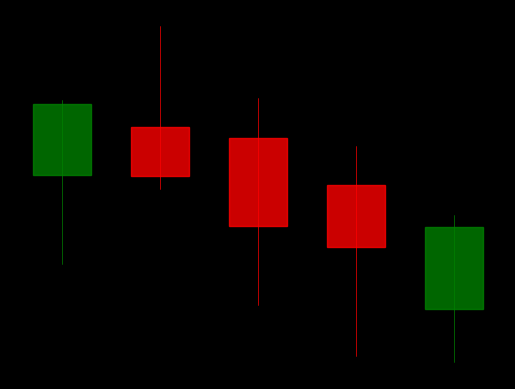

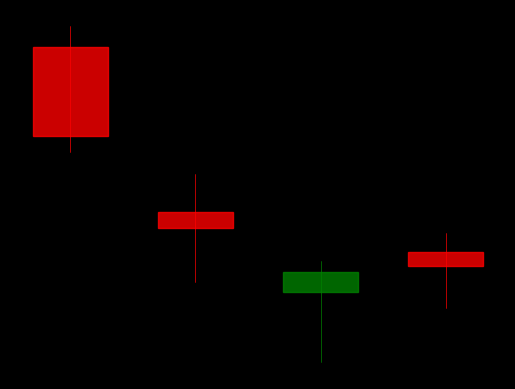

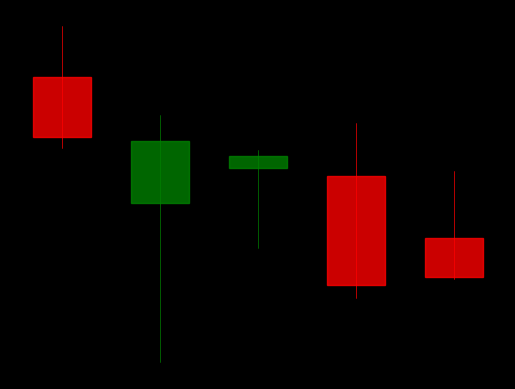

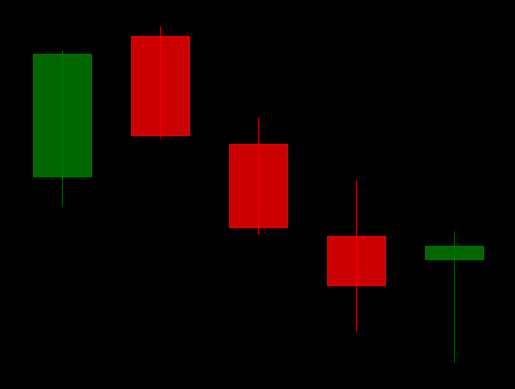

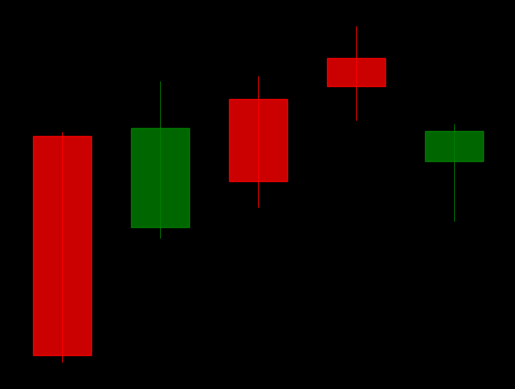

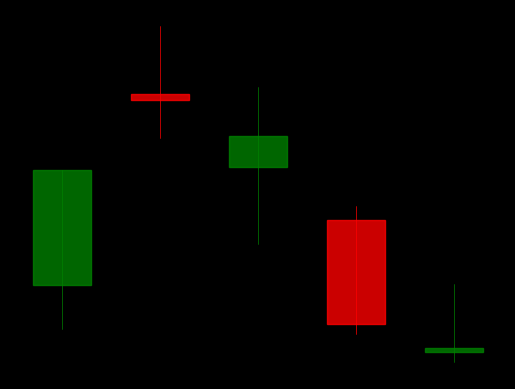

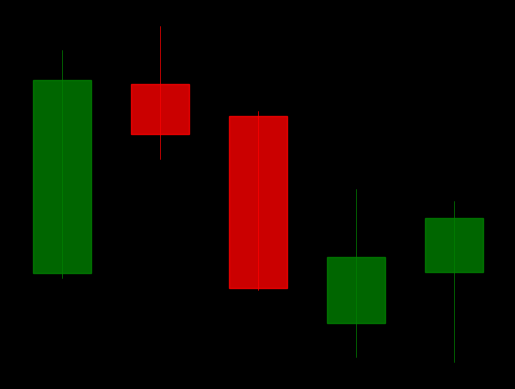

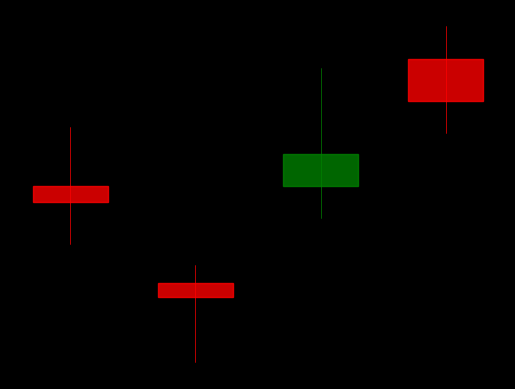

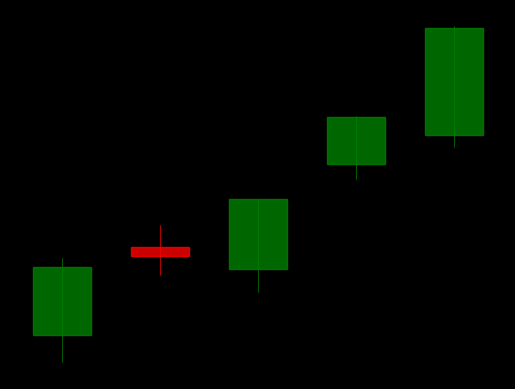

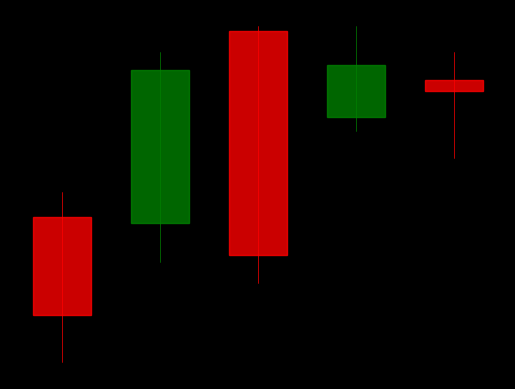

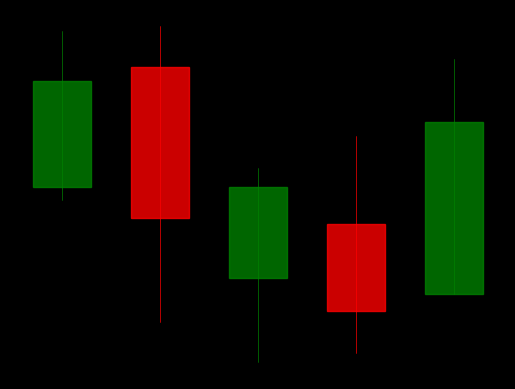

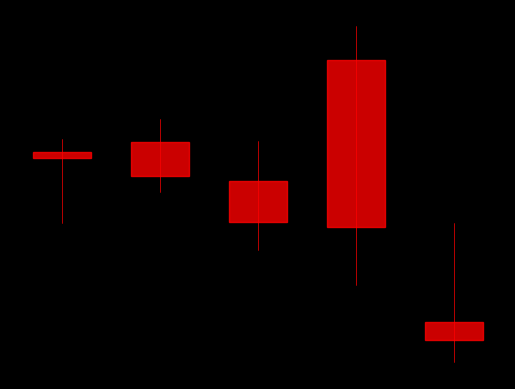

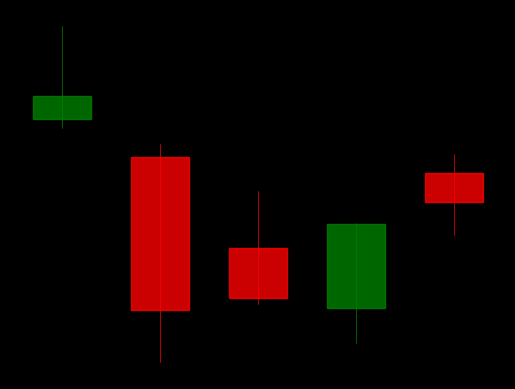

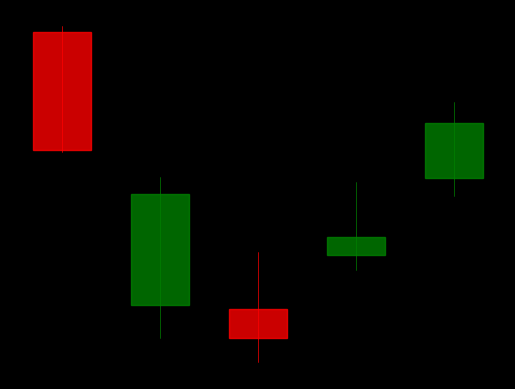

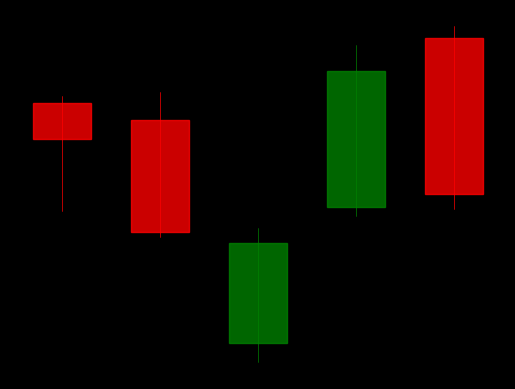

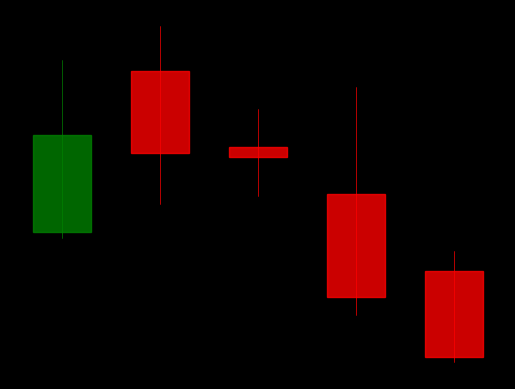

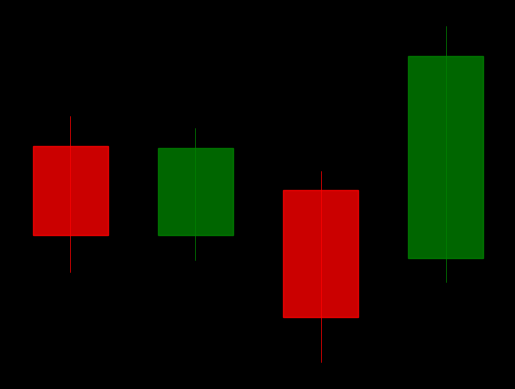

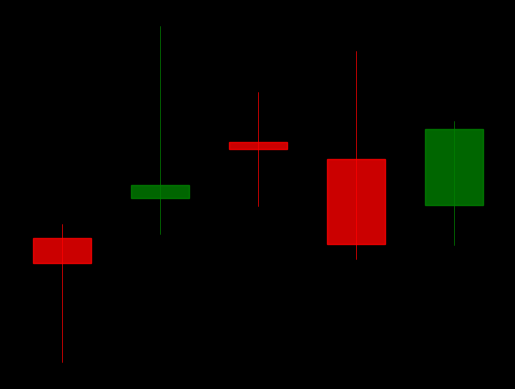

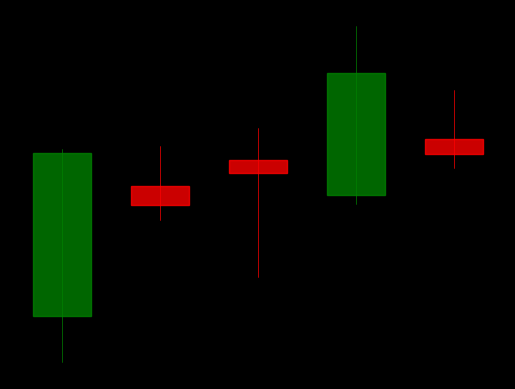

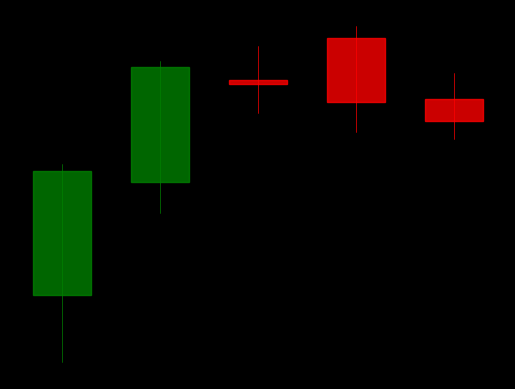

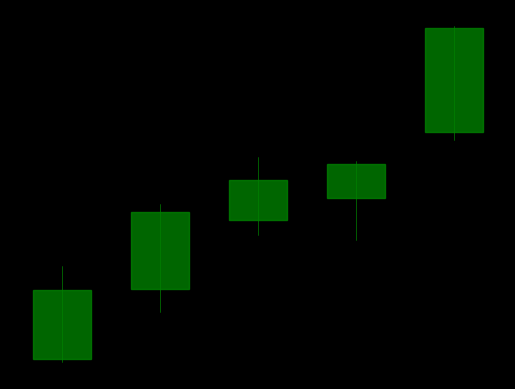

In [ ]:
#name = '2015-'
images_created_train = 0
signal_list = []
for x in sunday_list:
    from_date = x - timedelta(days=7)
    from_date1 = from_date.date()              # strip the time
    next_weekending = x + timedelta(days=7)    # Next sunday
    next_weekending1 = next_weekending.date()  # Strip the time
    #print(from_date1, x, next_weekending1)
#    print(from_date,x)
#    if x == datetime.strptime('2020-07-12' , '%Y-%m-%d'):
#        print(x)
#        print(data[from_date1:x].head())
#        print('Fri and monday below')

##  Create Signal - take prior week last date price and take next week 1st day price and compare
    week_close = data[from_date1:x].tail(1)['Close']
    #print(type(week_close))
    week_close_price = week_close[0]
    #print(week_close_price)
    nextday_close = data[x:next_weekending1].head(1)['Close']
    try:
        nextday_close_price = nextday_close[0]
    except:
        break
    #print(nextday_close)
    if nextday_close_price > week_close_price:
        signal = 1
    else:
        signal = 0
    signal_list.append(signal)
    #print('Signal = ', signal)
    x1 = x.date()
    #print(from_date1, x1)
    ohlc = data[from_date1: x1]
    ohlc.reset_index(inplace=True)
    ohlc['Date'] = pd.to_datetime(ohlc['Date'])
    ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
#    print(ohlc.head())
    # Creating Subplots
    fig, ax = plt.subplots()
    plt.axis('off')
    fig.patch.set_facecolor('black')

    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
    images_created_train = images_created_train + 1
    if signal == 1:
        plt.savefig(f'candlesticks10yrs/{x1}.png')
    elif signal == 0:
        plt.savefig(f'candlesticks10yrs/{x1}.png')
#plt.show()
#        mpf.plot(data[from_date1:x1],type='candle',savefig=f"{x1}.png")

        #     y=x*5
#     print('iloc range: ', y, ' to ', y+5)
#     fname = name + str(x)
#     print(fname)
#    mpf.axis('off')
#    mpf.plot(data[from_date:x,type='candle',savefig=f"{fname}.png")

In [ ]:
print('Train data Images created = ', images_created_train)

Train data Images created =  521


### Create test images in its folder

In [ ]:
# #name = '2015-'
# signal_test_list = []
# images_created_test = 0
# for x in sunday_test_list:
#     from_date = x - timedelta(days=7)
#     from_date1 = from_date.date()              # strip the time
#     next_weekending = x + timedelta(days=7)    # Next sunday
#     next_weekending1 = next_weekending.date()  # Strip the time
# #    print(from_date1, x, next_weekending1)
# #    print(from_date,x)
# #    if x == datetime.strptime('2020-07-12' , '%Y-%m-%d'):
# #        print(x)
# #        print(data[from_date1:x].head())
# #        print('Fri and monday below')

# ##  Create Signal - take prior week last date price and take next week 1st day price and compare
#     week_close = data_test[from_date1:x].tail(1)['Close']
#     #print(type(week_close))
#     week_close_price = week_close[0]
#     #print(week_close_price)
#     nextday_close = data_test[x:next_weekending1].head(1)['Close']
#     try:
#         nextday_close_price = nextday_close[0]
#     except:
#         break
#     #print(nextday_close)
#     if nextday_close_price > week_close_price:
#         signal = 1
#     else:
#         signal = 0
#     signal_test_list.append(signal)
#     #print('Signal = ', signal)
#     x1 = x.date()
#     #print(from_date1, x1)
#     ohlc = data_test[from_date1: x1]
#     ohlc.reset_index(inplace=True)
#     ohlc['Date'] = pd.to_datetime(ohlc['Date'])
#     ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
#     ohlc = ohlc.astype(float)
# #    print(ohlc.head())
#     # Creating Subplots
#     fig, ax = plt.subplots()
#     plt.axis('off')
#     fig.patch.set_facecolor('black')

#     candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
#     images_created_test = images_created_test + 1
#     if signal == 1:
#         plt.savefig(f'candlesticks_test/buy/{x1}.png')
#     elif signal == 0:
#         plt.savefig(f'candlesticks_test/sell/{x1}.png')

In [ ]:
#print('Test images created = ', images_created_test)

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,142.020004,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,144.570007,104911600
2021-07-08,141.580002,144.059998,140.669998,143.240005,143.240005,105575500


In [ ]:
train_len = len(signal_list)

In [ ]:
train_len

521

In [ ]:
len(sunday_list)

522

In [ ]:
signal_df = pd.DataFrame()
signal_df['Signal'] = signal_list
signal_df['Date'] = sunday_list[0:train_len]
signal_df.set_index('Date', inplace=True)
signal_df.head()

,Signal
Date,
2011-07-10,0
2011-07-17,1
2011-07-24,1
2011-07-31,1
2011-08-07,0


In [ ]:
signal_df.to_csv('signal10yrs.csv', index=True)

In [ ]:
#test_len = len(signal_test_list)

In [ ]:
#test_len

In [ ]:
# sunday_test_list

In [ ]:
# signal_test_df = pd.DataFrame()
# signal_test_df['Signal'] = signal_test_list
# signal_test_df['Date'] = sunday_test_list[0:test_len]
# signal_test_df.set_index('Date', inplace=True)
# signal_test_df.head()

In [ ]:
# signal_test_df.to_csv('signal_test.csv', index=True)

In [ ]:
# # from mpl_finance import candlestick_ohlc
# # fig, ax = plt.subplots()
# # plt.axis('off')
# # fig.patch.set_facecolor('black')

# name = '2015-'
# for x in range(10):
#     print(x)
#     y=x*5
#     print('iloc range: ', y, ' to ', y+5)
#     fname = name + str(x)
#     print(fname)
# #    mpf.axis('off')
#     mpf.plot(data.iloc[y:y+5],type='candle',savefig=f"{fname}.png")
    

In [ ]:
# #slice with moving average
# mpf.plot(data.iloc[0:50],type='candle',mav=4)

In [ ]:
# for wk in sunday_list:
#     wk1 = wk.date()
#     print(wk)

In [ ]:
# cnt=1
# six_index=0
# week_max = 0
# for index, row in data.iterrows():
#     if index == pd.to_datetime('2015-07-01')  or index == pd.to_datetime('2015-07-02'):
#         continue
#     print('Date = ', index, ' Close and adj Close: ', row['Close'], ' Row count = ', cnt)
#     if week_max == 0:
#         week_max = row['Close']
#     else: 
#         if row['Close'] > week_max:
#             week_max = row['Close']
#     if cnt % 5 == 0:
#         print(' % 5 reached count = ', cnt, ' week_max = ', week_max)
#         day5_max = week_max
#         week_max = 0
#         print('day5 max = ', day5_max)
#         six_index= cnt+1
#     if cnt == six_index:
#         print(' % 6th day reached count = ', cnt, ' day5max = ', day5_max)
#         if row['Close'] > day5_max:
#             print(index, ' day 6 ', 'Signal = Buy , 6th day close = ', row['Close'], ' past 5 days max = ', day5_max)
#         else:
#             print(index, ' day 6 ', 'Signal = Sell , 6th day close = ', row['Close'], ' past 5 days max = ', day5_max)
#         #week_max = row['Close']
#     if cnt>12:
#         break
#     cnt=cnt+1
    